In [1]:
from matplotlib import pyplot as plt
import numpy as np
import pandas as pd
import datetime
import calendar
from scipy import integrate

In [2]:
available_parkings = ['Vilanova', 'SantSadurni', 'SantBoi', 'QuatreCamins',
                      'Cerdanyola','Granollers','Martorell','Mollet',
                      'SantQuirze','PratDelLlobregat']
df_column_name=['Parking Vilanova Renfe','Parking Sant Sadurní Renfe','Parking Sant Boi de Llobregat',
              'Parking Quatre Camins','Cerdanyola Universitat Renfe','Parking Granollers Renfe',
                'Parking Martorell FGC','Parking Mollet Renfe','Parking Sant Quirze FGC',
               'Parking Prat del Ll.']
current_parking_ix=3
# parkings which fill up: 3 QuatreCamins, 7 Mollet, 1 SantSadurni (sometimes),
# problems on Weekend with 2 SantBoi, 4 Cerdanyola, 
# bad data: 6 Martorell, 8 SantQuirze DO NOT USE
#good 0 Vilanova, 1 SantSadurni, 3 QuatreCamins, 5 Granollers, 7 Mollet, 9 PratDelLlobregat 
current_parking = available_parkings[current_parking_ix]
current_column_name=df_column_name[current_parking_ix]
df = pd.read_csv('data/'+current_parking+"_Estable.csv", delimiter=";")
df = df.dropna()
df = df.reset_index(drop=True)
df.head(6)

DateTime Parking Quatre Camins plazas totales
0  01/01/2020 0:00                          107,7378322
1  01/01/2020 0:30                          106,9062389
2  01/01/2020 1:00                          106,5981128
3  01/01/2020 1:30                                  107
4  01/01/2020 2:00                                  107
5  01/01/2020 2:30                                  107

# Data processing and preliminary analysis

In [3]:
def getDayName(d):
    return calendar.day_name[d.weekday()]

df = pd.read_csv('data/'+current_parking+"_Estable.csv", delimiter=";")
df = df.dropna()
df['Date'] = df['DateTime'].apply(lambda x: x.split(' ')[0])
df['Time'] = df['DateTime'].apply(lambda x: x.split(' ')[1])
df['Free slots'] = df[current_column_name +' plazas totales'].apply(lambda x: int(x.split(',')[0]))
df['Date'] = pd.to_datetime(df['Date'], format="%d/%m/%Y")
df.sort_values(by="Date")
df['Weekday'] = df.apply(lambda x: getDayName(x['Date']),axis=1)
df['Date'] = [d.date().strftime("%Y-%m-%d") for d in df['Date']]
df = df.drop(['DateTime'], axis=1)
df = df.drop([current_column_name +' plazas totales'], axis=1)

max_value = df["Free slots"].max()
min_value = df["Free slots"].min()
df['Occupancy'] = df['Free slots'].map(lambda x: max_value-x)
axis_ylim = max_value+20
axis_ylim_low = 0
print('Y lim: ' ,axis_ylim)
df.head()

Y lim:  178


Date  Time  Free slots    Weekday  Occupancy
0  2020-01-01  0:00         107  Wednesday         51
1  2020-01-01  0:30         106  Wednesday         52
2  2020-01-01  1:00         106  Wednesday         52
3  2020-01-01  1:30         107  Wednesday         51
4  2020-01-01  2:00         107  Wednesday         51

In [4]:
# GLOBAL VARIABLES THAT MUST BE FILLED ALONG THE Jup. NOTEBOOK FOR THE EXPORT
max_capacity = max_value

hist_weekday_proto = []
hist_friday_proto  = []
hist_weekend_proto = []

tn_weekday_pars = []
tn_friday_pars  = []
tn_weekend_pars = []

tn_weekday_proto = []
tn_friday_proto  = []
tn_weekend_proto = []

time = np.linspace(0,23.5,48)

In [5]:
x_date=pd.to_datetime(df['Date']+' '+df['Time'])
y_occ=df['Occupancy']

### Delete days that have not to be taken into account

In [6]:
#only optimized for Vilanova and QuatreCamins

if current_parking == "QuatreCamins":
    days_list = ['2020-01-01', '2020-01-06', '2020-01-18', '2020-01-19', '2020-01-26', '2020-02-07', 
                 '2020-02-08', '2020-02-09', '2020-03-14', '2020-03-15', '2020-03-16', '2020-03-17', '2020-03-18', 
                 '2020-03-19', '2020-03-20', '2020-03-21', '2020-03-22', '2020-03-23', '2020-03-24', '2020-03-25', 
                 '2020-03-26', '2020-03-27', '2020-03-28', '2020-03-29', '2020-03-30']
elif current_parking == "Cerdanyola":  
    days_list = ['2020-01-01', '2020-01-02', '2020-01-03', '2020-01-04', '2020-01-05', '2020-01-06', '2020-01-11',
                 '2020-01-12', '2020-01-18', '2020-01-19', '2020-01-25', '2020-01-26', 
                 '2020-02-09', '2020-02-24', '2020-02-29', '2020-03-01', '2020-03-09', '2020-03-14', '2020-03-15', 
                 '2020-03-16', 
                 '2020-03-17', '2020-03-18', '2020-03-19', '2020-03-20', '2020-03-21', '2020-03-22', '2020-03-23', 
                 '2020-03-24', '2020-03-25', '2020-03-26', '2020-03-27', '2020-03-28', '2020-03-29', '2020-03-30', 
                 '2020-03-31']
elif current_parking == "Granollers":  
    days_list = ['2020-01-01', '2020-01-02', '2020-01-03', '2020-01-04', '2020-01-05', '2020-01-06',  
                 '2020-01-25', '2020-01-26', '2020-02-02', '2020-02-08', '2020-02-09', '2020-02-22', '2020-02-23', 
                 '2020-02-28', '2020-02-29', '2020-03-01', '2020-03-14', '2020-03-15', '2020-03-16', 
                 '2020-03-17', '2020-03-18', '2020-03-19', '2020-03-20', '2020-03-21', '2020-03-22', '2020-03-23', 
                 '2020-03-24', '2020-03-25', '2020-03-26', '2020-03-27', '2020-03-28', '2020-03-29', '2020-03-30', 
                 '2020-03-31']
elif current_parking == "Mollet": 
    days_list = ['2020-01-01', '2020-01-02', '2020-01-03', '2020-01-04', '2020-01-05', '2020-01-06', '2020-01-11', 
                 '2020-01-12', '2020-02-07', '2020-02-08', '2020-02-09', '2020-03-16', '2020-03-17', '2020-03-18', 
                 '2020-03-19', '2020-03-20', '2020-03-21', '2020-03-22', '2020-03-23', '2020-03-24', '2020-03-25', 
                 '2020-03-26', '2020-03-27', '2020-03-28', '2020-03-29', '2020-03-30', '2020-03-31']     
elif current_parking == "PratDelLlobregat": 
    days_list = ['2020-01-01', '2020-01-02', '2020-01-03', '2020-01-04', '2020-01-05', '2020-01-06', '2020-01-17', 
                 '2020-01-18', '2020-01-19', '2020-01-20', '2020-01-21', '2020-01-22', '2020-01-23', '2020-01-24',
                 '2020-01-25', '2020-01-26', '2020-02-07', '2020-02-08', '2020-02-09', '2020-02-21', '2020-02-22', 
                 '2020-02-23', '2020-03-16', '2020-03-17', '2020-03-18', 
                 '2020-03-19', '2020-03-20', '2020-03-21', '2020-03-22', '2020-03-23', '2020-03-24', '2020-03-25', 
                 '2020-03-26', '2020-03-27', '2020-03-28', '2020-03-29', '2020-03-30', '2020-03-31']     
elif (current_parking == "Vilanova") | (current_parking == "SantSadurni") :  
    days_list = ['2020-01-01', '2020-01-02', '2020-01-03', '2020-01-06', '2020-02-07', '2020-02-08', '2020-02-09', 
                 '2020-03-16', '2020-03-17', '2020-03-18', 
                 '2020-03-19', '2020-03-20', '2020-03-21', '2020-03-22', '2020-03-23', '2020-03-24', '2020-03-25', 
                 '2020-03-26', '2020-03-27', '2020-03-28', '2020-03-29', '2020-03-30', '2020-03-31']
elif (current_parking == "SantBoi") :  
    days_list = ['2020-01-01', '2020-03-14', '2020-03-15', '2020-03-16', '2020-03-17', '2020-03-18', '2020-03-19', 
                 '2020-01-20', '2020-03-20', '2020-03-21', '2020-03-22', '2020-03-23', '2020-03-24', '2020-03-25', 
                 '2020-03-26', '2020-03-27', '2020-03-28', '2020-03-29', '2020-03-30', '2020-03-31']
else:
    days_list = ['2020-01-01', '2020-01-02', '2020-01-03', '2020-01-06', '2020-02-07', '2020-03-16', '2020-03-17', 
                 '2020-03-18', '2020-03-19', '2020-03-20', '2020-03-21', '2020-03-22', '2020-03-23', '2020-03-24', 
                 '2020-03-25', '2020-03-26', '2020-03-27', '2020-03-28', '2020-03-29', '2020-03-30', '2020-03-31']

#days_list = ['2020-01-01', '2020-01-02', '2020-01-03', '2020-01-06', '2020-02-06', '2020-02-07', '2020-02-23', '2020-02-28', 
#             '2020-03-16', '2020-03-17', '2020-03-18', '2020-03-19', '2020-03-20', '2020-03-21', '2020-03-22', '2020-03-23',
#             '2020-03-24', '2020-03-25', '2020-03-26', '2020-03-27', '2020-03-28', '2020-03-29', '2020-03-30', '2020-02-29',
#             '2020-01-19']

def checkDataValidty(date):
    if date in days_list: 
        return False
    else:
        return True

In [7]:
from itertools import compress
from matplotlib.ticker import (AutoMinorLocator, MultipleLocator)

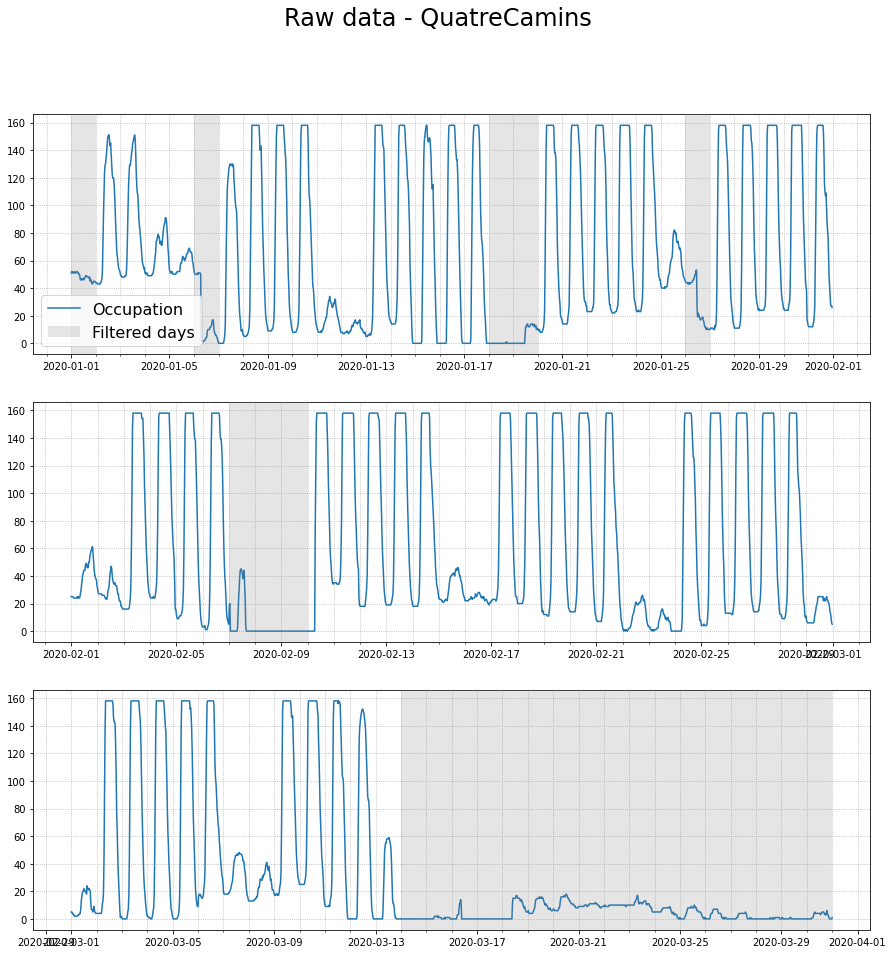

In [8]:
fig, ax = plt.subplots(3,1,figsize=(15,15))

#fig, ax = plt.subplots(1,3)

fig.suptitle('Raw data - '+current_parking, fontsize=24)
#plt.subplot(3,1,1)
indxJan=x_date<pd.to_datetime("2020-02-01")


ax[0].plot(x_date[indxJan],y_occ[indxJan], label='Occupation')
ax[0].grid(which='major',linestyle='dotted')
ax[0].xaxis.set_minor_locator(AutoMinorLocator(4))
ax[0].grid(which='minor', linestyle=':')

td_days_list=pd.to_datetime(days_list)
index_dates=td_days_list<pd.to_datetime("2020-02-01")

days_list01=list(compress(days_list, index_dates))
bol_once=True
for datestr in days_list01:
    initDate= pd.to_datetime(datestr)
    finDate=pd.to_datetime(datestr +' 23:59:00')
    ax[0].axvspan(initDate,finDate, facecolor='grey', alpha=0.2, label='Filtered days', zorder=4)
    if bol_once:
        ax[0].legend(fontsize=16)
        bol_once=False
    
#plt.subplot(3,1,2)
indxFeb=((x_date<pd.to_datetime("2020-03-01")) & (x_date>=pd.to_datetime("2020-02-01")))

ax[1].plot(x_date[indxFeb],y_occ[indxFeb])
ax[1].grid(which='major',linestyle='dotted')
ax[1].xaxis.set_minor_locator(AutoMinorLocator(4))
ax[1].grid(which='minor', linestyle=':')

index_dates=(td_days_list<pd.to_datetime("2020-03-01")) & (td_days_list>pd.to_datetime("2020-01-31"))
days_list02=list(compress(days_list, index_dates))
for datestr in days_list02:
    initDate= pd.to_datetime(datestr)
    finDate=pd.to_datetime(datestr +' 23:59:00')
    ax[1].axvspan(initDate,finDate, facecolor='grey', alpha=0.2, label='Filtered days', zorder=4)
    

#plt.subplot(3,1,3)
indxMar=((x_date<pd.to_datetime("2020-04-01")) & (x_date>=pd.to_datetime("2020-03-01")))

ax[2].plot(x_date[indxMar],y_occ[indxMar]);
ax[2].grid(which='major',linestyle='dotted')
ax[2].xaxis.set_minor_locator(AutoMinorLocator(1))
ax[2].grid(which='minor', linestyle=':')
           
index_dates=(td_days_list<pd.to_datetime("2020-04-01")) & (td_days_list>pd.to_datetime("2020-02-29"))
days_list03=list(compress(days_list, index_dates))
for datestr in days_list03:
    initDate= pd.to_datetime(datestr)
    finDate=pd.to_datetime(datestr +' 23:59:00')
    ax[2].axvspan(initDate,finDate, facecolor='grey', alpha=0.2, label='Filtered days', zorder=4)
    

In [9]:
df['Stable Data'] = df['Date'].apply(lambda x: checkDataValidty(x))
df_holidays = df[df['Stable Data'] == False]
df = df[df["Stable Data"] == True]

## Mean free slots by weekday

In [10]:
cats = [ 'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']

df_days = df.groupby([df['Weekday']], as_index=False).mean()

# REORDER BY DAY
days = ['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday', 'Sunday']
mapping = {day: i for i, day in enumerate(days)}
key = df_days['Weekday'].map(mapping)
df_days = df_days.iloc[key.argsort()]
df_days.reset_index(inplace=True, drop=True) 

#df_bla = df.groupby('Weekday').agg({'score': ['mean', 'std']})

In [11]:
# cats = [ 'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']

# # esta bien esto?
# df_days = df.groupby('Weekday').agg({'Occupancy': ['mean', 'std']})
# # df_days = df.groupby('Weekday').agg({'Occupancy': ['mean', 'std']})

# # REORDER BY DAY
# days = ['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday', 'Sunday']
# mapping = {day: i for i, day in enumerate(days)}
# df_days.reset_index(inplace=True, drop=False) 
# key = df_days['Weekday'].map(mapping)
# df_days = df_days.iloc[key.argsort()]
# df_days.reset_index(inplace=True, drop=True) 
# means = df_days['Occupancy']['mean']
# stds = df_days['Occupancy']['std']
# df

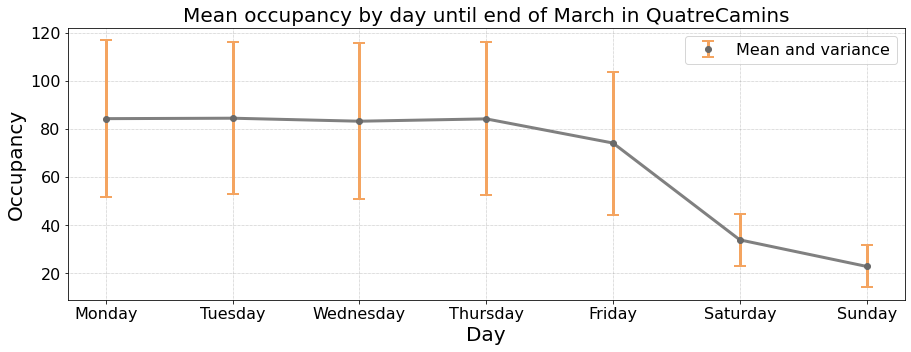

In [12]:
cats = [ 'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
df_days_ = df.groupby('Weekday').agg({'Occupancy': ['mean', 'std']})
days = ['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday', 'Sunday']
mapping = {day: i for i, day in enumerate(days)}
df_days_.reset_index(inplace=True, drop=False) 
key = df_days_['Weekday'].map(mapping)
df_days_ = df_days_.iloc[key.argsort()]
df_days_.reset_index(inplace=True, drop=True) 
means = df_days_['Occupancy']['mean']
stds = df_days_['Occupancy']['std']

x = df_days_['Weekday']
y = means
err = stds
fig, ax = plt.subplots(figsize=(15,5))
plt.plot(x,y, color='grey',  linewidth=3)
plt.errorbar(x, y,
            xerr=None,
            yerr=err/2, fmt='o',color='dimgray',label="Mean and variance",
             ecolor='sandybrown', elinewidth=3, capsize=6, capthick=2)
plt.title('Mean occupancy by day until end of March in '+current_parking, fontsize=20)
plt.xlabel('Day', fontsize = 20)
plt.ylabel('Occupancy', fontsize = 20)
plt.legend(fontsize=16)
plt.yticks(fontsize=16)
plt.xticks(fontsize=16)
plt.grid(linestyle='dotted', linewidth='0.5', color='grey')
df = df.reset_index(drop = True)

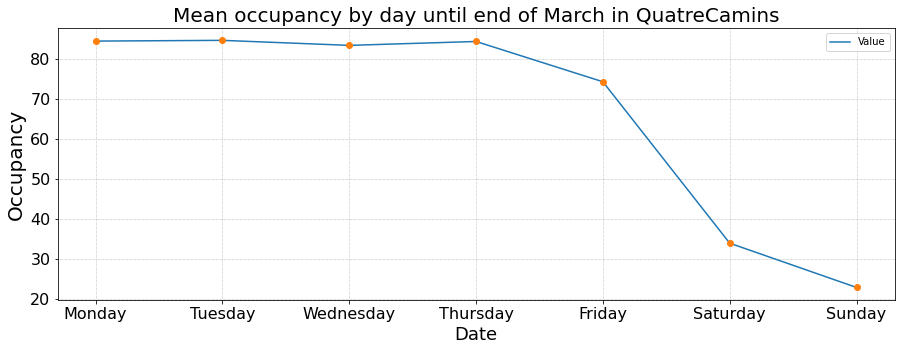

In [13]:
x = df_days['Weekday']
y = df_days['Occupancy']
fig, ax = plt.subplots(figsize=(15,5))
plt.plot(x,y, label='Value')
plt.plot(x,y,'o')
plt.title('Mean occupancy by day until end of March in '+current_parking, fontsize=20)
plt.xlabel('Date', fontsize = 18)
plt.ylabel('Occupancy', fontsize = 20)
plt.legend()
# changing the fontsize of yticks
plt.yticks(fontsize=16)
plt.xticks(fontsize=16)
# plt.xticks(fonstize=14)
plt.grid(linestyle='dotted', linewidth='0.5', color='grey')
df = df.reset_index(drop = True)

In [14]:
df_days['Occupancy']

0    84.407407
1    84.590437
2    83.337500
3    84.308712
4    74.250000
5    33.940104
6    22.886905
Name: Occupancy, dtype: float64

## Compute the mean for different days

In [15]:
def toAbsHour(hour):
    beginning = [int(s) for s in hour.split(':')]
    absol_hour = (beginning[0] + beginning[1]/60 )
    return absol_hour

df_byhour = df
df_byhour['ABS_Hour'] = df_byhour['Time'].apply(lambda x: toAbsHour(x) )

df_hours = df_byhour
df_hours['hour'] = df_hours['ABS_Hour'].map(lambda x: (int(2*x))/2)


# Normalization

In [29]:
def Area_by_date(date):
    df_day = df[(df['Date'] == date)]
    Profile = df_day['Occupancy'].values
    Area = integrate.simps(Profile)
    return Area

df_hours['Area'] = df_hours['Date'].apply(lambda x: Area_by_date(x))


def Max_by_date(date):
    df_day = df[(df['Date'] == date)]
    Profile = df_day['Occupancy'].values
    MaxV = max(Profile)
    return MaxV

df_hours['MaxV'] = df_hours['Date'].apply(lambda x: Max_by_date(x))

def df_normalization(occ, area):
    if area == 0:
        return 'error'
    return occ/area

df_hours['Normalized_occupancy'] = df_hours.apply(lambda x: df_normalization(x.Occupancy, x.MaxV), axis=1)

#df_hours = df_hours.drop(['Occupancy'], axis=1)
#df_hours['Occupancy'] = df_hours['Normalized_occupancy'].apply(lambda x: x)
df_mean_slots = df_hours.groupby(by=['Weekday','hour'], axis = 0, group_keys=True).mean()

In [30]:
df_hours

Date   Time  Free slots   Weekday  Occupancy  Stable Data  \
0     2020-01-02   0:00         114  Thursday         44         True   
1     2020-01-02   0:30         114  Thursday         44         True   
2     2020-01-02   1:00         114  Thursday         44         True   
3     2020-01-02   1:30         115  Thursday         43         True   
4     2020-01-02   2:00         115  Thursday         43         True   
...          ...    ...         ...       ...        ...          ...   
3116  2020-03-13  22:00         158    Friday          0         True   
3117  2020-03-13  22:30         158    Friday          0         True   
3118  2020-03-13  23:00         158    Friday          0         True   
3119  2020-03-13  23:30         158    Friday          0         True   
3120  2020-03-31   0:00         157   Tuesday          1         True   

      ABS_Hour  hour         Area  MaxV  Normalized_occupancy  
0          0.0   0.0  4309.083333   151              0.291391  
1          0.5   0.5  4309.083333   151              0.291391  
2          1.0   1.0  4309.083333   151              0.291391  
3          1.5   1.5  4309.083333   151              0.284768  
4          2.0   2.0  4309.083333   151              0.284768  
...        ...   ...          ...   ...                   ...  
3116      22.0  22.0   904.000000    59              0.000000  
3117      22.5  22.5   904.000000    59              0.000000  
3118      23.0  23.0   904.000000    59              0.000000  
3119      23.5  23.5   904.000000    59              0.000000  
3120       0.0   0.0     0.000000     1              1.000000  

[3121 rows x 11 columns]

In [26]:
#pd.set_option('display.max_rows',10)

In [31]:
mean_occupancy = df_mean_slots['Occupancy']

In [32]:
Monday_occ = mean_occupancy['Monday']
Tuesday_occ = mean_occupancy['Tuesday']
Wednesday_occ = mean_occupancy['Wednesday']
Thursday_occ = mean_occupancy['Thursday']
Friday_occ = mean_occupancy['Friday']
Saturday_occ = mean_occupancy['Saturday']
Sunday_occ = mean_occupancy['Sunday']

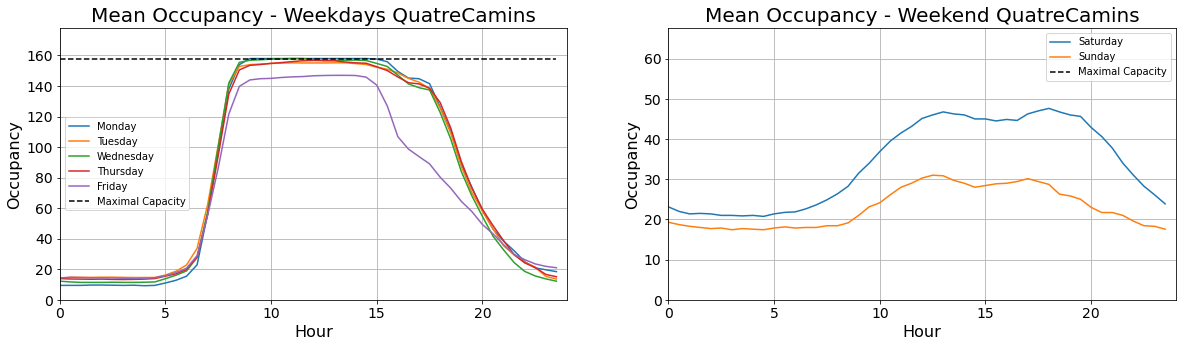

In [33]:
fig = plt.figure(figsize = (20,5))
plt.subplot(1,2,1)
maximal_line = np.zeros(48)+max_value;
time=np.linspace(0,23.5,48);


plt.plot(Monday_occ,label='Monday')
plt.plot(Tuesday_occ,label='Tuesday')
plt.plot(Wednesday_occ,label='Wednesday')
plt.plot(Thursday_occ, label='Thursday')
plt.plot(Friday_occ,label='Friday')
plt.plot(time, maximal_line,'--',color='black',label='Maximal Capacity')

plt.title('Mean Occupancy - Weekdays '+current_parking, fontsize=20)
plt.xlabel('Hour', fontsize=16); plt.ylabel('Occupancy', fontsize=16)
plt.tick_params(labelsize=14)
plt.axis([0, 24, 0, axis_ylim])
plt.legend()
plt.grid()

plt.subplot(1,2,2)
plt.plot(Saturday_occ,label='Saturday')
plt.plot(Sunday_occ,label='Sunday')
plt.plot(time, maximal_line,'--',color='black',label='Maximal Capacity')

axis_ylim_we=max(max(Saturday_occ),max(Sunday_occ))+20

plt.title('Mean Occupancy - Weekend '+current_parking, fontsize=20)
plt.xlabel('Hour', fontsize=16); plt.ylabel('Occupancy', fontsize=16)
plt.tick_params(labelsize=14)
plt.axis([0, 24, 0, axis_ylim_we])
plt.legend()
plt.grid()

## Variance computation

In [34]:
def mean_day(Weekday,date):
    df = df_hours[(df_hours['Weekday'] == Weekday)]
    df_day = df[(df['Date'] == date)]
    df_day_mean = df_day.groupby(by=['Weekday','hour'], axis = 0, group_keys=True).mean()
    mean_free_slots = df_day_mean['Occupancy']
    Day = mean_free_slots[Weekday]
    return Day

def generate_mean_variance(accumulated_date, accumulated_free_slots):
    aux_dict = {};
    for ii in np.arange(len(accumulated_date)):
        free_slots = list(accumulated_free_slots[ii].iat)
        hour = list(accumulated_free_slots[ii].index)
        for jj in np.arange(len(free_slots)):
            current_hour = hour[jj]
            if current_hour not in aux_dict:
                aux_dict[current_hour] = []
            aux_dict[current_hour].append(free_slots[jj])
    return aux_dict

def compute_mean_variance(aux_dict):
    domain = np.linspace(0,23,47)
    var_vec = []; mean_vec = []; hour_vec=[];
    for ii in domain:
        if ii in aux_dict:
            var_vec.append(np.var(list(aux_dict[ii])))
            mean_vec.append(np.mean(list(aux_dict[ii])))
            hour_vec.append(ii)
    return var_vec, mean_vec, hour_vec

### Visualize days

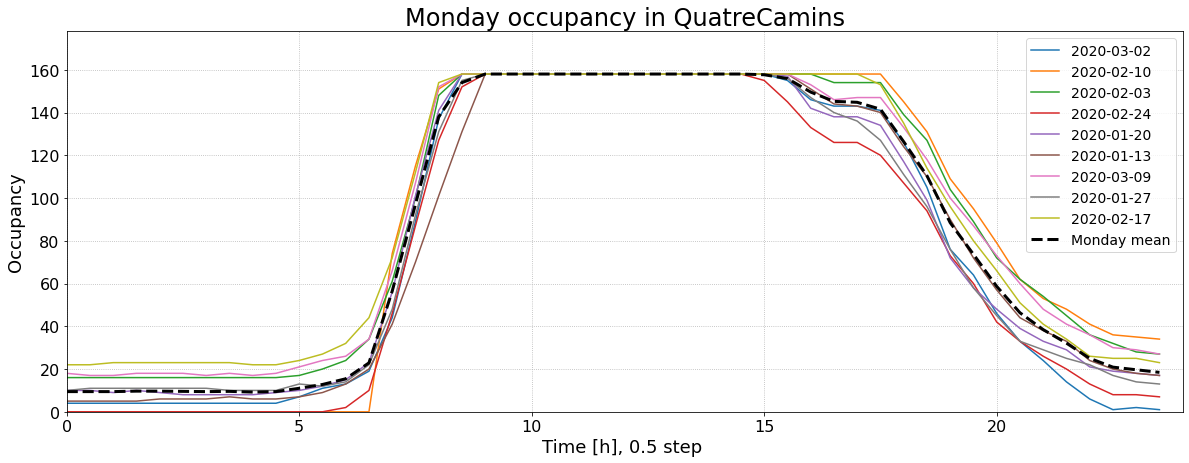

In [36]:
Weekday = 'Monday'
Day_df = df_hours[(df_hours['Weekday'] == Weekday)]
dates = Day_df['Date']
dates_options = set(dates[:][:])
dates_options = list(dates_options)
lockdown_dates=[];
#lockdown_dates.append('06/01/2020')
# lockdown_dates.append('16/01/2020')
# lockdown_dates.append('30/01/2020')
# lockdown_dates.append('23/01/2020')

fig = plt.figure(figsize = (20,7))
accumulated_free_slots=[];
accumulated_date=[];

for ii in np.arange(len(dates_options)):
    day = dates_options[ii]
    Day = mean_day(Weekday,day)
    aux_vec=np.zeros(24)
    Day_list = list(Day)
    accumulated_date.append(day)
    accumulated_free_slots.append(Day)
    plt.plot(Day,label=day)
    #print(len(Day.values))
    
label_tag = Weekday + ' mean'
plt.title('Monday occupancy in '+current_parking, fontsize=24)
plt.plot(Monday_occ,'--', color='black', label = label_tag, linewidth=3)
plt.axis([0, 24, axis_ylim_low, axis_ylim])
plt.grid(linestyle='dotted')
plt.legend(fontsize=14)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.ylabel('Occupancy', fontsize=18)
plt.xlabel('Time [h], 0.5 step ', fontsize=18);

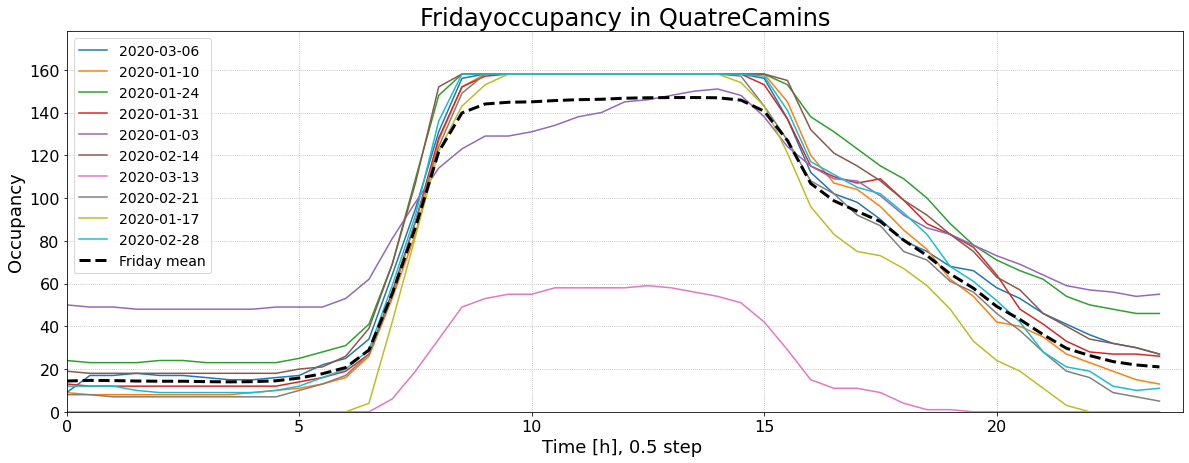

In [37]:
Weekday = 'Friday'
Day_df = df_hours[(df_hours['Weekday'] == Weekday)]
dates = Day_df['Date']
dates_options = set(dates[:][:])
dates_options = list(dates_options)
lockdown_dates=[];
#lockdown_dates.append('06/01/2020')
# lockdown_dates.append('16/01/2020')
# lockdown_dates.append('30/01/2020')
# lockdown_dates.append('23/01/2020')

fig = plt.figure(figsize = (20,7))
accumulated_free_slots=[];
accumulated_date=[];

for ii in np.arange(len(dates_options)):
    day = dates_options[ii]
    Day = mean_day(Weekday,day)
    aux_vec=np.zeros(24)
    Day_list = list(Day)
    accumulated_date.append(day)
    accumulated_free_slots.append(Day)
    plt.plot(Day,label=day)
    #print(len(Day.values))
    
label_tag = Weekday + ' mean'
plt.title(Weekday +'occupancy in '+current_parking, fontsize=24)
plt.plot(Friday_occ,'--', color='black', label = label_tag, linewidth=3)
plt.axis([0, 24, axis_ylim_low, axis_ylim])
plt.grid(linestyle='dotted')
plt.legend(fontsize=14)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.ylabel('Occupancy', fontsize=18)
plt.xlabel('Time [h], 0.5 step ', fontsize=18);

# PREDICTION 

### Prepare the data for the prediction

In [38]:
def classify_2_proto(x):
    weekday_list = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday']
    if x in weekday_list:
        return 'Weekday'
    else:
        return 'Weekend'


def classify_3_proto(x):
    weekday_list = ['Monday', 'Tuesday', 'Wednesday', 'Thursday']
    weekend_list = ['Saturday', 'Sunday']
    if x in weekday_list:
        return 'Weekday'
    elif x in weekend_list:
        return 'Weekend'
    else:
        return 'Friday'
    

# 1 week data = 336 rows (48*7) WE ASUME WE HAVE COMPLETE DATA WITHOUT GAPS BETWEEN HOURS, AND DATA FROM 0.0 TO 23.5
# @from_end: if the testing data is retrieved from the last part of the df or from th beginning. By default, from the end
# @limit_date: if we want to get the train from specific date instead of by number of weeks

def split_data(df, n_test_weeks, limit_date = None, from_end=True): 
    if(limit_date != None):
        init_test = df[df['Date']==limit_date].index[0];
        end_test = df.shape[0]
        test_domain = range(init_test, end_test)
        test_domain = list(test_domain)

    else:
        if(from_end == True):
            end_test = df.shape[0]
            week_domain = n_test_weeks*336
            init_test = end_test-week_domain
            test_domain = range(init_test, end_test)
            test_domain = list(test_domain)
            
        elif(from_end == False):
            week_domain = n_test_weeks*336
            init_test = 0
            end_test = week_domain
            test_domain = range(0,week_domain)
            test_domain = list(test_domain)
            
    test_df = df[init_test:end_test]
    training_df = df.drop(test_domain)
    return training_df, test_df

In [39]:
df_byhour['MonthNumber']= df_byhour['Date'].apply(lambda x: x.split('-')[1])
df_prediction_mean = df_byhour.groupby(by=['Date','hour','MonthNumber','Weekday'], axis = 0, as_index=False).mean()
df_prediction_mean['Profile_2'] = df_prediction_mean['Weekday'].apply(lambda x: classify_2_proto(x))
df_prediction_mean['Profile_3'] = df_prediction_mean['Weekday'].apply(lambda x: classify_3_proto(x))

### Split data in Training/Testing df

In [40]:
number_of_testing_weeks = 3
df_training, df_testing = split_data(df_prediction_mean, number_of_testing_weeks)
df_train_data = df_training
df_train_data.head(5)
df_testing.head()

Date  hour MonthNumber   Weekday  Free slots  Occupancy  \
2113  2020-02-22   0.5          02  Saturday         157          1   
2114  2020-02-22   1.0          02  Saturday         158          0   
2115  2020-02-22   1.5          02  Saturday         157          1   
2116  2020-02-22   2.0          02  Saturday         157          1   
2117  2020-02-22   2.5          02  Saturday         158          0   

      Stable Data  ABS_Hour        Area  MaxV  Normalized_occupancy Profile_2  \
2113         True       0.5  556.916667    26              0.038462   Weekend   
2114         True       1.0  556.916667    26              0.000000   Weekend   
2115         True       1.5  556.916667    26              0.038462   Weekend   
2116         True       2.0  556.916667    26              0.038462   Weekend   
2117         True       2.5  556.916667    26              0.000000   Weekend   

     Profile_3  
2113   Weekend  
2114   Weekend  
2115   Weekend  
2116   Weekend  
2117   Weekend

## PREDICTION BY MEAN

In [41]:
def mean_day_profile(Profile, df_aux):
    df = df_aux[(df_aux['Profile_2'] == Profile)]
    df_day_mean = df.groupby(by=['Profile_2','hour'], axis = 0, group_keys=True).mean()
    mean_free_slots = df_day_mean['Occupancy']
    Day = mean_free_slots[Profile]
    return Day

def mean_of_day(Weekday,date):
    df = df_hours[(df_hours['Weekday'] == Weekday)]
    df_day = df[(df['Date'] == date)]
    df_day_mean = df_day.groupby(by=['Weekday','hour'], axis = 0, group_keys=True).mean()
    mean_free_slots = df_day_mean['Occupancy']
    Day = mean_free_slots[Weekday]
    return Day

# Get all days of the type (Monday, Tuesday...) and return the mean of them
def get_days(dayname, df_):
    data_temp = df_[df_['Weekday'] == dayname] 
    days = []
    for i in range(0,data_temp.shape[0], 48):
        day = data_temp['Occupancy'][i:i+48]
        if len(day) == 48:
            days.append(day)
        
    return days

# Get unique dates of the type (Monday, Tuesday...) 
def get_dates(dayname, df_):
    data_temp = df_[df_['Weekday'] == dayname] 
    dates = []
    for i in range(0,data_temp.shape[0], 48):
        day = data_temp['Occupancy'][i:i+48]
        t_date = data_temp.iloc[i]['Date']
        if len(day) == 48:
            dates.append(t_date)
        
    return dates

def get_days_of_protos(proto_name, df_):
    data_temp = df_[df_['Profile_3'] == proto_name] 
    days = []
    for i in range(0,data_temp.shape[0], 48):
        day = data_temp['Occupancy'][i:i+48]
        if len(day) == 48:
            days.append(day)
        
    return days


def get_parkingfull_of_protos(proto_name, df_):
    data_temp = df_[df_['Profile_3'] == proto_name] 
    isfull = []
    for i in range(0,data_temp.shape[0], 48):
        intervallIsfull = data_temp['Free slots'][i:i+48]==0
        if len(intervallIsfull) == 48:
            isfull.append(max(intervallIsfull))
    return isfull

In [42]:
# ------------------------ NEW TESTING DATA -----------------------------
# these variables are arrays of days
testing_mondays    = get_days("Monday", df_testing)
testing_tuesdays   = get_days("Tuesday", df_testing)
testing_wednesdays = get_days("Wednesday", df_testing)
testing_thursdays  = get_days("Thursday", df_testing)
testing_fridays    = get_days("Friday", df_testing)
testing_saturdays  = get_days("Saturday", df_testing)
testing_sundays    = get_days("Sunday", df_testing)


testing_mondays_dates    = get_dates("Monday", df_testing)
testing_tuesdays_dates   = get_dates("Tuesday", df_testing)
testing_wednesdays_dates = get_dates("Wednesday", df_testing)
testing_thursdays_dates  = get_dates("Thursday", df_testing)
testing_fridays_dates    = get_dates("Friday", df_testing)
testing_saturdays_dates  = get_dates("Saturday", df_testing)
testing_sundays_dates    = get_dates("Sunday", df_testing)

In [43]:
# ------------------------ TESTING DATA -----------------------------

real_monday = mean_of_day('Monday','2020-02-24')
real_tuesday = mean_of_day('Tuesday','2020-02-11')
real_wednesday = mean_of_day('Wednesday','2020-02-26')
real_thursday = mean_of_day('Thursday','2020-02-27')

################## Bad/None data on last Feb week ############################
real_friday = mean_of_day('Friday','2020-03-06') 
real_saturday= mean_of_day('Saturday','2020-03-07')
real_sunday = mean_of_day('Sunday','2020-03-08')

### 3 Prototypes: Weekday, Friday & Weekend

In [44]:
def mean_day_profile_3(Profile, df_aux):
    df = df_aux[(df_aux['Profile_3'] == Profile)]
    df_day_mean = df.groupby(by=['Profile_3','hour'], axis = 0, group_keys=True).mean()
    mean_free_slots = df_day_mean['Occupancy']
    profile = mean_free_slots[Profile]
    return profile

In [45]:
# Obtain the 3 protoypes. IMPORTANT! We assume all the data in df is valid, robust and correct
def train_statistical_model(df): 
    df_day_mean = df.groupby(by=['Profile_3','hour'], axis = 0, group_keys=True).mean()
    mean_free_slots = df_day_mean['Occupancy']
    return mean_free_slots['Weekday'], mean_free_slots['Friday'], mean_free_slots['Weekend'] 

weekdays = ['Monday', 'Thursday', 'Wednesday', 'Tuesday']
weekend= ['Saturday', 'Sunday']

# Simply return the proper prototype
def predict_full_day_statistical(day): 
    if day in weekdays: 
        return hist_weekday_proto
    elif day in weekend: 
        return hist_weekend_proto
    else:
        return hist_friday_proto


def get_proto_by_day(day_name):
    if day in ['Monday', 'Tuesday', 'Wednesday', 'Thursday']:
        return 
    return


def get_scale_factor(current_data, proto):
    index = len(current_data)
    proto_val = proto[index-1]
    last_hour_val = current_data[-1]
    scaling = last_hour_val/proto_val
    return scaling 


def predict_real_time(day, current_hour, current_value, max_capacity, pred_type):
    if pred_type == "Stat":
        proto = get_proto_by_day(day) #Get from statistical prototypes
    else: 
        scale_factor = get_scale_factor(current_value, proto_value)
        prediction = np.array(proto)*scale_factor
    return prediction


In [46]:
hist_weekday_proto, hist_friday_proto, hist_weekend_proto = train_statistical_model(df_train_data)
prediction = predict_full_day_statistical('Monday')

#### Plotting  prototypes

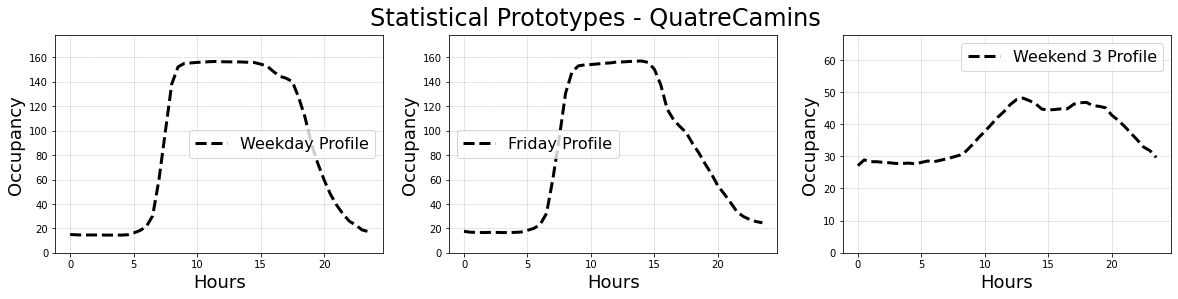

In [47]:
Weekday_proto = mean_day_profile_3('Weekday',df_train_data)
Weekend_proto = mean_day_profile_3('Weekend',df_train_data)
df_fri = df_train_data #.drop(df_train_data[df_train_data['Date'] == '2020-02-07' ].index)
Friday_proto = mean_day_profile_3('Friday',df_fri)

fig, ax = plt.subplots(1,3)
fig.set_figwidth(20)
fig.set_figheight(4)
fig.suptitle('Statistical Prototypes - '+current_parking, fontsize=24)

ax[0].plot(hist_weekday_proto, linestyle='--', label='Weekday Profile', color='k', linewidth=3)
# ax[0].plot(real_monday.index.tolist(), real_monday.values.tolist(), label='Monday')
# ax[0].plot(real_tuesday.index.tolist(), real_tuesday.values.tolist(), label='Tuesday')
# ax[0].plot(real_wednesday.index.tolist(), real_wednesday.values.tolist(), label='Wednesday')
# ax[0].plot(real_thursday.index.tolist(), real_thursday.values.tolist(), label='Thursday')
ax[0].set_ylim([0,axis_ylim])
# ax[0].set_title("Weekday prototype")
ax[0].set_ylabel('Occupancy', fontsize=18)
ax[0].set_xlabel('Hours', fontsize=18)
ax[0].grid(linestyle='dotted', linewidth='0.5', color='grey')
ax[0].legend(fontsize=16)

ax[1].plot(hist_friday_proto, linestyle='--', label='Friday Profile', color='k', linewidth=3)
# ax[1].plot(real_friday.index.tolist(), real_friday.values.tolist(), label='Friday')
ax[1].set_ylim([0,axis_ylim])
# ax[1].set_title("Friday prototype")
ax[1].set_ylabel('Occupancy', fontsize=18)
ax[1].set_xlabel('Hours', fontsize=18)
ax[1].grid(linestyle='dotted', linewidth='0.5', color='grey')
ax[1].legend(fontsize=16)

ax[2].plot(hist_weekend_proto, linestyle='--', label='Weekend 3 Profile', color='k', linewidth=3)
# ax[2].plot(real_saturday.index.tolist(), real_saturday.values.tolist(), label='Saturday')
# ax[2].plot(real_sunday.index.tolist(), real_sunday.values.tolist(), label='Sunday')
ax[2].set_ylim([0,axis_ylim_we])
# ax[2].set_title("Weekend prototype")
ax[2].set_ylabel('Occupancy', fontsize=18)
ax[2].set_xlabel('Hours', fontsize=18)
ax[2].grid(linestyle='dotted', linewidth='0.5', color='grey')
ax[2].legend(fontsize=16);
# fig.tight_layout(pad=3.0)


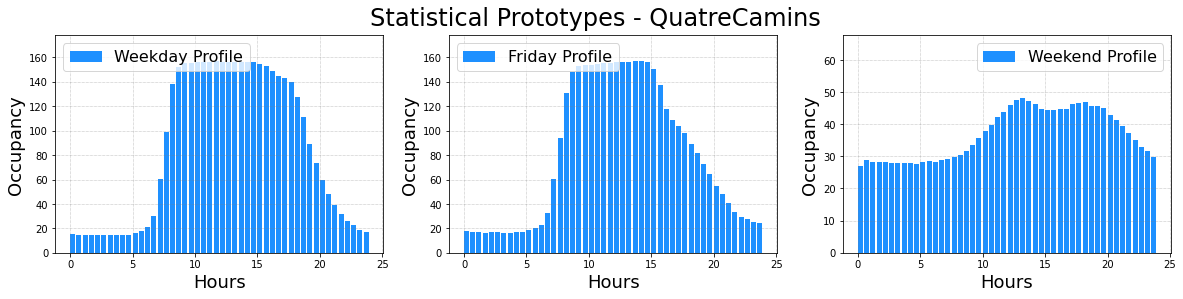

In [33]:
Weekday_proto = mean_day_profile_3('Weekday',df_train_data)
Weekend_proto = mean_day_profile_3('Weekend',df_train_data)
df_fri = df_train_data #.drop(df_train_data[df_train_data['Date'] == '2020-02-07' ].index)
Friday_proto = mean_day_profile_3('Friday',df_fri)

fig, ax = plt.subplots(1,3)
fig.set_figwidth(20)
fig.set_figheight(4)
fig.suptitle('Statistical Prototypes - '+current_parking, fontsize=24)

ax[0].bar(hist_weekday_proto.index +0.2,hist_weekday_proto.values, width=0.4, label='Weekday Profile', color='dodgerblue', linewidth=3)
ax[0].set_ylim([0,axis_ylim])
# ax[0].set_title("Weekday prototype")
ax[0].set_ylabel('Occupancy', fontsize=18)
ax[0].set_xlabel('Hours', fontsize=18)
ax[0].grid(linestyle='dotted', linewidth='0.5', color='grey')
ax[0].legend(fontsize=16)

ax[1].bar(hist_friday_proto.index +0.2,hist_friday_proto.values, width=0.4, label='Friday Profile', color='dodgerblue', linewidth=3)
ax[1].set_ylim([0,axis_ylim])
# ax[1].set_title("Friday prototype")
ax[1].set_ylabel('Occupancy', fontsize=18)
ax[1].set_xlabel('Hours', fontsize=18)
ax[1].grid(linestyle='dotted', linewidth='0.5', color='grey')
ax[1].legend(fontsize=16)

ax[2].bar(hist_weekend_proto.index +0.2, hist_weekend_proto.values, width=0.4, label='Weekend Profile', color='dodgerblue', linewidth=3)

ax[2].set_ylim([0,axis_ylim_we])
# ax[2].set_title("Weekend prototype")
ax[2].set_ylabel('Occupancy', fontsize=18)
ax[2].set_xlabel('Hours', fontsize=18)
ax[2].grid(linestyle='dotted', linewidth='0.5', color='grey')
ax[2].legend(fontsize=16);
# fig.tight_layout(pad=3.0)


In [48]:
def subplot_training(fig, ax, xx, yy, proto_data, test_days, day, proto_name): 
    ax[xx,yy].plot(time, proto_data, linewidth=2.5, linestyle='dashed', label= proto_name + ' prediction')
    ax[xx,yy].legend(fontsize=16)
    for i in range(0, len(test_days)): 
        ax[xx, yy].plot(time, test_days[i], linewidth=0.75, label='Testing ' + day )
    ax[xx,yy].grid(linestyle='dotted')
    ax[xx,yy].set_ylim(0,axis_ylim)
    ax[xx,yy].set_xlabel('Time (hours)', fontsize=16)
    ax[xx,yy].set_ylabel('Occupancy', fontsize=16)

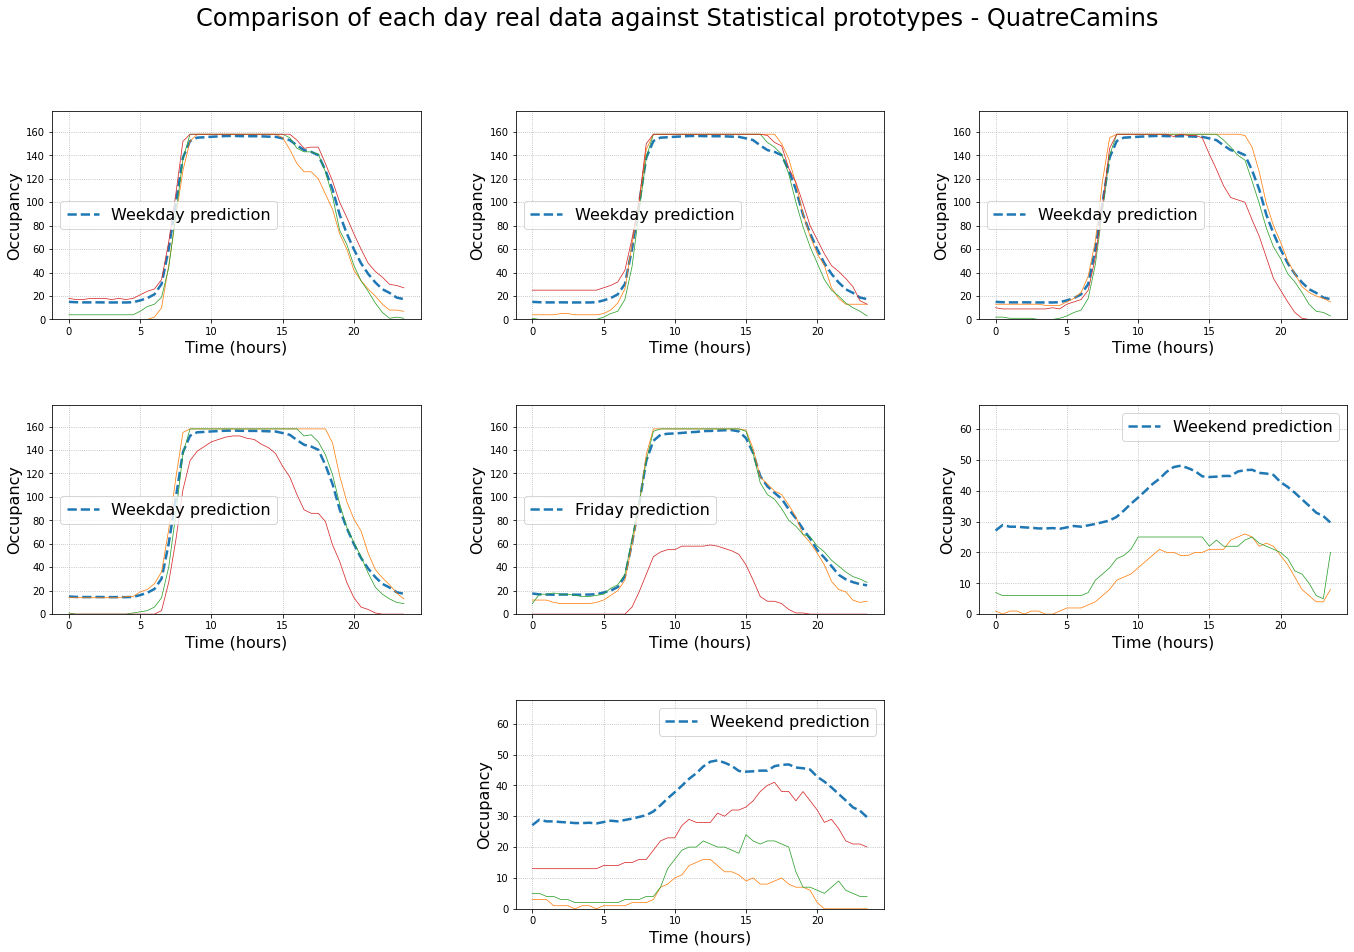

In [49]:
fig, ax = plt.subplots(3, 3)
fig.set_figwidth(20)
fig.set_figheight(14)
fig.suptitle('Comparison of each day real data against Statistical prototypes - '+current_parking, fontsize=24)

subplot_training(fig, ax, 0, 0, Weekday_proto.values, testing_mondays, 'Monday', 'Weekday')
subplot_training(fig, ax, 0, 1, Weekday_proto.values, testing_tuesdays, 'Tuesday', 'Weekday')
subplot_training(fig, ax, 0, 2, Weekday_proto.values, testing_wednesdays, 'Wednesday', 'Weekday')
subplot_training(fig, ax, 1, 0, Weekday_proto.values, testing_thursdays, 'Thursday', 'Weekday')
subplot_training(fig, ax, 1, 1, Friday_proto.values, testing_fridays, 'Friday', 'Friday')
subplot_training(fig, ax, 1, 2, Weekend_proto.values, testing_saturdays, 'Saturday', 'Weekend')
subplot_training(fig, ax, 2, 1, Weekend_proto.values, testing_sundays, 'Sunday', 'Weekend')

ax[2,0].set_visible(False)
ax[2,2].set_visible(False)
ax[2,1].set_ylim(0,axis_ylim_we)
ax[1,2].set_ylim(0,axis_ylim_we)
fig.tight_layout(pad=5)


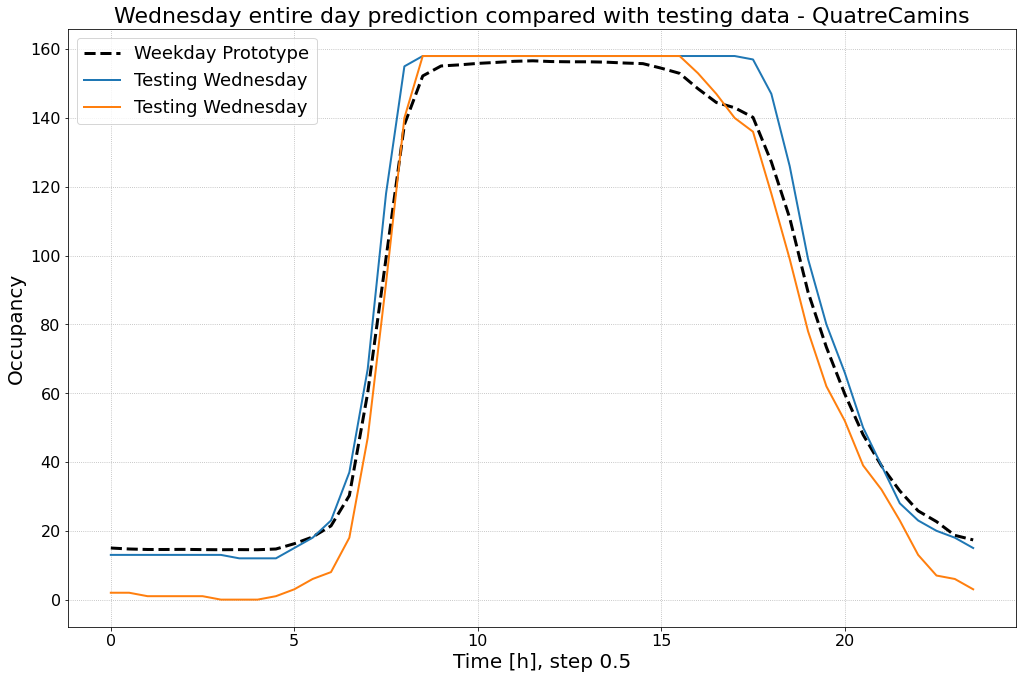

In [50]:
fig = plt.figure(figsize=(17,11))
plt.title('Wednesday entire day prediction compared with testing data - '+current_parking, fontsize = 22)
plt.plot(time, Weekday_proto.values, linestyle='dashed', linewidth=3, color='black', label='Weekday Prototype')
plt.plot(time, testing_wednesdays[0], linewidth=2, label="Testing Wednesday")
plt.plot(time, testing_wednesdays[1], linewidth=2, label="Testing Wednesday")
# plt.plot(time, testing_wednesdays[3], linewidth=2, label="Testing Wednesday")
plt.grid(linestyle='dotted')
plt.legend(fontsize=18);
plt.xlabel('Time [h], step 0.5', fontsize=20)
plt.ylabel('Occupancy', fontsize=20)
plt.yticks(fontsize=16)
plt.xticks(fontsize=16);

#### Computing errors for 3 prototypes

In [51]:
def compute_testing_prop_error(testing_days, proto_data):
    errors = np.zeros(48)
    n_test_days = len(testing_days)
    proto = np.array(proto_data)
    
    for i in range(0, n_test_days):
        day = np.array(testing_days[i])
        er = np.array((np.absolute(proto - day)/max_value)*100)
        errors += er
    return errors/n_test_days

error_monday_stat = compute_testing_prop_error(testing_mondays, Weekday_proto.values)
error_tuesday_stat = compute_testing_prop_error(testing_tuesdays, Weekday_proto.values)
error_wednesday_stat = compute_testing_prop_error(testing_wednesdays, Weekday_proto.values)
error_thursday_stat = compute_testing_prop_error(testing_thursdays, Weekday_proto.values)
error_friday_stat = compute_testing_prop_error(testing_fridays, Friday_proto.values)
error_saturday_stat = compute_testing_prop_error(testing_saturdays, Weekend_proto.values)
error_sunday_stat = compute_testing_prop_error(testing_sundays, Weekend_proto.values)

______MEAN________
5.089034558971267
4.65641952983725
5.754282198111311
8.412133313240908
14.854581072935503
14.589047116736992
14.98901195499297
______STDV________
2.6966050469377985
2.4630870642055305
3.9638536156473596
4.935663946350966
7.350356997580305
1.7469118010567883
1.5184289557340862


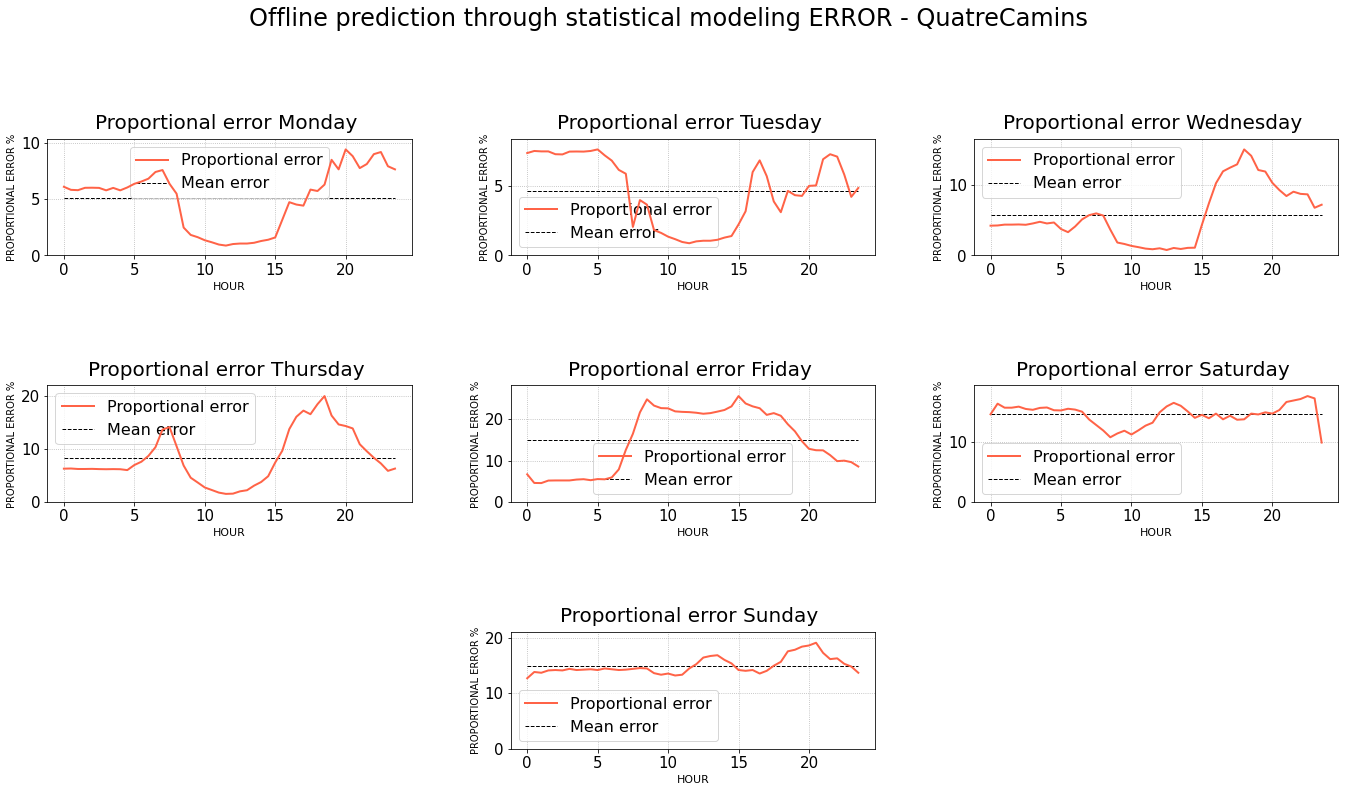

In [52]:
def subplotStatErr(fig, ax, axx, axy, x, error, mean, title, day ):
    ax[axx,axy].plot(x, error, color="tomato", linewidth=2, zorder=10, label='Proportional error')
    ax[axx,axy].plot(x, mean, linewidth=1, linestyle='--' ,color='black', label='Mean error')
    ax[axx,axy].grid(linestyle='dotted')
    ax[axx,axy].legend(loc='upper left', fontsize=10)
    ax[axx,axy].set_ylabel('Proportional error %', fontsize=20)
    ax[axx,axy].set_xlabel('Hours', fontsize=30)
    ax[axx,axy].set_title(title, pad=10, fontsize=20)
    ax[axx,axy].set_ylim((0,1.1*max(error)))
    ax[axx,axy].legend(fontsize=16)
    ax[axx,axy].tick_params( labelsize=15)
    
fig, ax = plt.subplots(3, 3)
fig.set_figwidth(20)
fig.set_figheight(12)
fig.suptitle('Offline prediction through statistical modeling ERROR - '+ current_parking, fontsize=24)
time = np.linspace(0,23.5,48)

mean_Monday =  [np.mean(error_monday_stat)]*len(time)
subplotStatErr(fig, ax, 0, 0, time, error_monday_stat, mean_Monday, 
                 'Proportional error Monday ', 'Monday')

mean_Tuesday =  [np.mean(error_tuesday_stat)]*len(time)
subplotStatErr(fig, ax, 0, 1, time, error_tuesday_stat, mean_Tuesday, 
                 'Proportional error Tuesday ', 'Tuesday')

mean_Wednesday =  [np.mean(error_wednesday_stat)]*len(time)
subplotStatErr(fig, ax, 0, 2, time, error_wednesday_stat, mean_Wednesday, 
                 'Proportional error Wednesday ', 'Wednesday')

mean_Thursday =  [np.mean(error_thursday_stat)]*len(time)
subplotStatErr(fig, ax, 1, 0, time, error_thursday_stat, mean_Thursday, 
                 'Proportional error Thursday ', 'Thursday')

mean_Friday =  [np.mean(error_friday_stat)]*len(time)
subplotStatErr(fig, ax, 1, 1, time, error_friday_stat, mean_Friday, 
                 'Proportional error Friday ', 'Friday')

mean_Saturday =  [np.mean(error_saturday_stat)]*len(time)
subplotStatErr(fig, ax, 1, 2, time, error_saturday_stat, mean_Saturday, 
                 'Proportional error Saturday ', 'Saturday')

mean_Sunday =  [np.mean(error_sunday_stat)]*len(time)
subplotStatErr(fig, ax, 2, 1, time, error_sunday_stat, mean_Sunday, 
                 'Proportional error Sunday ', 'Sunday')

ax[2,0].set_visible(False)
ax[2,2].set_visible(False)
fig.tight_layout(pad=5.0)
for ax in ax.flat:
    ax.set_ylabel('PROPORTIONAL ERROR %', fontsize=10)
    ax.set_xlabel('HOUR', fontsize=11)

print('______MEAN________')
print(mean_Monday[0])
print(mean_Tuesday[0])
print(mean_Wednesday[0])
print(mean_Thursday[0])
print(mean_Friday[0])
print(mean_Saturday[0])
print(mean_Sunday[0])

print('______STDV________')

print(np.std(error_monday_stat))
print(np.std(error_tuesday_stat))
print(np.std(error_wednesday_stat))
print(np.std(error_thursday_stat))
print(np.std(error_friday_stat))
print(np.std(error_saturday_stat))
print(np.std(error_sunday_stat))

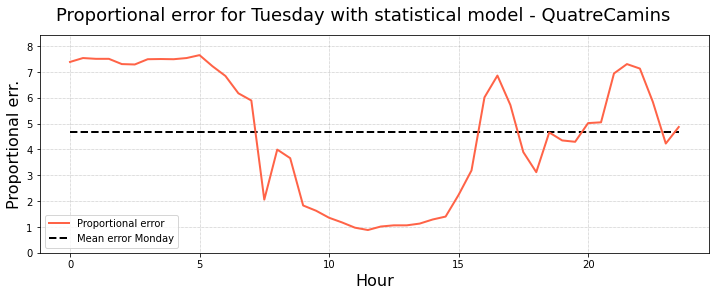

In [53]:
fig = plt.figure(figsize=(12,4))
fig.suptitle('Proportional error for Tuesday with statistical model - '+ current_parking, fontsize=18)
plt.grid(linestyle='dotted', linewidth='0.5', color='grey')
plt.plot(real_tuesday.index.tolist(), error_tuesday_stat, color="tomato", linewidth=2, zorder=10, label='Proportional error')
plt.plot(real_tuesday.index.tolist(), mean_Tuesday, linewidth=2, linestyle='--' ,color='black', label='Mean error Monday')
plt.legend()
plt.xlabel('Hour', fontsize=16)
plt.ylabel('Proportional err.', fontsize=16)
plt.ylim([0,1.1*max(error_tuesday_stat)]);

## NORMALIZATION

In [64]:
def Area_by_date(date):
    df = df_prediction_mean
    df_day = df[(df['Date'] == date)]
    day_occ = df_day['Occupancy_mod'].values
    Area = integrate.simps(day_occ)
    return Area

def Max_by_date(date):
    df = df_prediction_mean
    df_day = df[(df['Date'] == date)]
    day_occ = df_day['Occupancy_mod'].values
    MaxV = max(day_occ)
    return MaxV


def df_normalization(occ, area):
    if area == 0:
        return occ
    return occ/area

def compute_min(date):
    df_day = df[(df['Date'] == date)]
    day_occ = df_day['Occupancy'].values
    return min(day_occ)


df_prediction_mean['Min_value'] = df_prediction_mean['Date'].apply(lambda x: compute_min(x))
df_mean_offset = df_prediction_mean.groupby(['Profile_3'], as_index=False).mean() 
df_mean_offset[['Profile_3','Min_value']]

friday_offset = df_mean_offset.iloc[0]['Min_value']
weekday_offset = df_mean_offset.iloc[1]['Min_value']
weekend_offset = df_mean_offset.iloc[2]['Min_value']

df_prediction_mean['Occupancy_mod'] = df_prediction_mean['Occupancy'] - df_prediction_mean['Min_value']

In [62]:
df_prediction_mean

Date  hour MonthNumber   Weekday  Free slots  Occupancy  \
0     2020-01-02   0.0          01  Thursday         114         44   
1     2020-01-02   0.5          01  Thursday         114         44   
2     2020-01-02   1.0          01  Thursday         114         44   
3     2020-01-02   1.5          01  Thursday         115         43   
4     2020-01-02   2.0          01  Thursday         115         43   
...          ...   ...         ...       ...         ...        ...   
3116  2020-03-13  22.0          03    Friday         158          0   
3117  2020-03-13  22.5          03    Friday         158          0   
3118  2020-03-13  23.0          03    Friday         158          0   
3119  2020-03-13  23.5          03    Friday         158          0   
3120  2020-03-31   0.0          03   Tuesday         157          1   

      Stable Data  ABS_Hour         Area  MaxV  Normalized_occupancy  \
0            True       0.0  2288.083333   151              0.291391   
1            True       0.5  2288.083333   151              0.291391   
2            True       1.0  2288.083333   151              0.291391   
3            True       1.5  2288.083333   151              0.284768   
4            True       2.0  2288.083333   151              0.284768   
...           ...       ...          ...   ...                   ...   
3116         True      22.0   904.000000    59              0.000000   
3117         True      22.5   904.000000    59              0.000000   
3118         True      23.0   904.000000    59              0.000000   
3119         True      23.5   904.000000    59              0.000000   
3120         True       0.0     0.000000     1              1.000000   

     Profile_2 Profile_3  Min_value  Occupancy_mod  
0      Weekday   Weekday         43              1  
1      Weekday   Weekday         43              1  
2      Weekday   Weekday         43              1  
3      Weekday   Weekday         43              0  
4      Weekday   Weekday         43              0  
...        ...       ...        ...            ...  
3116   Weekday    Friday          0              0  
3117   Weekday    Friday          0              0  
3118   Weekday    Friday          0              0  
3119   Weekday    Friday          0              0  
3120   Weekday   Weekday          1              0  

[3121 rows x 15 columns]

In [66]:
df_prediction_mean['Area'] = df_prediction_mean['Date'].apply(lambda x: Area_by_date(x))
df_prediction_mean['MaxV'] = df_prediction_mean['Date'].apply(lambda x: Max_by_date(x))
df_prediction_mean['Normalized_occupancy'] = df_prediction_mean.apply(lambda x: df_normalization(x.Occupancy_mod, x.MaxV), axis=1)
df_normalized = df_prediction_mean[['Date', 'hour','MonthNumber', 
                                    'Normalized_occupancy', 'Weekday', 'Profile_3', 
                                    'Occupancy_mod', 'Area', 'MaxV', 'Occupancy','Free slots']].copy()


df_normalized

Date  hour MonthNumber  Normalized_occupancy   Weekday Profile_3  \
0     2020-01-02   0.0          01              0.009259  Thursday   Weekday   
1     2020-01-02   0.5          01              0.009259  Thursday   Weekday   
2     2020-01-02   1.0          01              0.009259  Thursday   Weekday   
3     2020-01-02   1.5          01              0.000000  Thursday   Weekday   
4     2020-01-02   2.0          01              0.000000  Thursday   Weekday   
...          ...   ...         ...                   ...       ...       ...   
3116  2020-03-13  22.0          03              0.000000    Friday    Friday   
3117  2020-03-13  22.5          03              0.000000    Friday    Friday   
3118  2020-03-13  23.0          03              0.000000    Friday    Friday   
3119  2020-03-13  23.5          03              0.000000    Friday    Friday   
3120  2020-03-31   0.0          03              0.000000   Tuesday   Weekday   

      Occupancy_mod         Area  MaxV  Occupancy  Free slots  
0                 1  2288.083333   108         44         114  
1                 1  2288.083333   108         44         114  
2                 1  2288.083333   108         44         114  
3                 0  2288.083333   108         43         115  
4                 0  2288.083333   108         43         115  
...             ...          ...   ...        ...         ...  
3116              0   904.000000    59          0         158  
3117              0   904.000000    59          0         158  
3118              0   904.000000    59          0         158  
3119              0   904.000000    59          0         158  
3120              0     0.000000     0          1         157  

[3121 rows x 11 columns]

In [42]:
#df_normalized['Free slots'].plot.hist(bins=161)

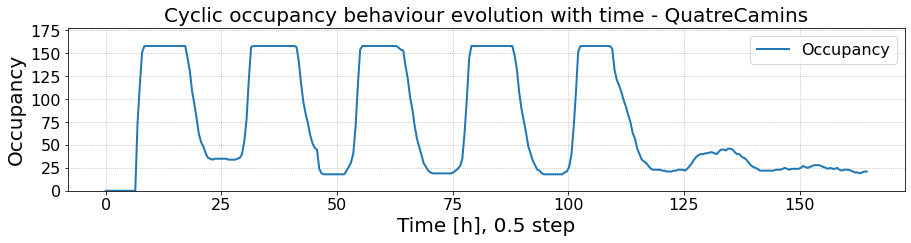

In [67]:
starting_plot = df_normalized[df_normalized['Date']=='2020-02-10'].index[0]
ending_plot = df_normalized[df_normalized['Date']=='2020-02-17'].index[0]

week = df_normalized.iloc[starting_plot:ending_plot]
week_values = week['Occupancy'].values
time = np.linspace(0,164.5,len(week))



fig, ax = plt.subplots(figsize=(15,3))
plt.plot(time, week_values, label='Occupancy', linewidth=2)
plt.title('Cyclic occupancy behaviour evolution with time - '+current_parking, fontsize = 20)
plt.xlabel('Time [h], 0.5 step', fontsize = 20)
plt.ylabel('Occupancy', fontsize = 20)
plt.ylim([0,axis_ylim])
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.grid(linestyle='dotted')
plt.legend(fontsize=16);

In [68]:
def split_data(df, n_test_weeks, limit_date = None, from_end=True): 
    if(limit_date != None):
        init_test = df[df['Date']==limit_date].index[0];
        end_test = df.shape[0]
        test_domain = range(init_test, end_test)
        test_domain = list(test_domain)

    else:
        if(from_end == True):
            end_test = df.shape[0]
            week_domain = n_test_weeks*336
            init_test = end_test-week_domain
            test_domain = range(init_test, end_test)
            test_domain = list(test_domain)
            
        elif(from_end == False):
            week_domain = n_test_weeks*336
            init_test = 0
            end_test = week_domain
            test_domain = range(0,week_domain)
            test_domain = list(test_domain)
            
    test_df = df[init_test:end_test]
    training_df = df.drop(test_domain)
    return training_df, test_df

In [69]:
df_training, df_testing = split_data(df_normalized, 3)

In [70]:
#pd.set_option('display.max_rows', None)
#df_testing.sort_values(by='Area', ascending=True)

In [71]:
#pd.set_option('display.max_rows', 5)

In [209]:
df_training['Area'] = df_training['Date'].apply(lambda x: Area_by_date(x))
df_training

df_mean_areas = df_training.groupby(['Profile_3'], as_index=False).mean() 
df_mean_areas[['Profile_3', 'Area']]

friday_area = df_mean_areas.iloc[0]['Area']
weekday_area = df_mean_areas.iloc[1]['Area']
weekend_area = df_mean_areas.iloc[2]['Area']

friday_max = df_mean_areas.iloc[0]['MaxV']
weekday_max = df_mean_areas.iloc[1]['MaxV']
weekend_max = df_mean_areas.iloc[2]['MaxV']

print('Weekday area: ' , weekday_area)
print('Friday area: ' , friday_area)
print('Weekend area: ' , weekend_area)

print('Weekday maximum: ' , weekday_max)
print('Friday maximum: ' , friday_max)
print('Weekend maximum: ' , weekend_max)


# df_normalized

Weekday area:  3516.6577380952117
Friday area:  3082.0952380952285
Weekend area:  523.6141262509632
Weekday maximum:  144.64285714285714
Friday maximum:  140.71428571428572
Weekend maximum:  26.775981524249424


In [73]:
def get_days_normalized(dayname, df_):
    data_temp = df_[df_['Weekday'] == dayname] 
    days = []
    for i in range(0,data_temp.shape[0], 48):
        day = data_temp['Normalized_occupancy'][i:i+48]
        if len(day) == 48:
            days.append(day)
    return days

def get_days_of_protos_normalized(proto_name, df_):
    data_temp = df_[df_['Profile_3'] == proto_name] 
    days = []
    for i in range(0,data_temp.shape[0], 48):
        day = data_temp['Normalized_occupancy'][i:i+48]
        if len(day) == 48:
            days.append(day)
        
    return days

In [74]:
# ------------------------ NEW TESTING DATA -----------------------------
# these variables are arrays of days
testing_mondays_norm    = get_days_normalized("Monday", df_testing)
testing_tuesdays_norm   = get_days_normalized("Tuesday", df_testing)
testing_wednesdays_norm = get_days_normalized("Wednesday", df_testing)
testing_thursdays_norm  = get_days_normalized("Thursday", df_testing)
testing_fridays_norm    = get_days_normalized("Friday", df_testing)
testing_saturdays_norm  = get_days_normalized("Saturday", df_testing)
testing_sundays_norm    = get_days_normalized("Sunday", df_testing)

testing_mondays    = get_days("Monday", df_testing)
testing_tuesdays   = get_days("Tuesday", df_testing)
testing_wednesdays = get_days("Wednesday", df_testing)
testing_thursdays  = get_days("Thursday", df_testing)
testing_fridays    = get_days("Friday", df_testing)
testing_saturdays  = get_days("Saturday", df_testing)
testing_sundays    = get_days("Sunday", df_testing)

In [105]:
training_weekdays_norm  = get_days_of_protos_normalized("Weekday", df_training)
training_fridays_norm  = get_days_of_protos_normalized("Friday", df_training)
training_weekends_norm  = get_days_of_protos_normalized("Weekend", df_training)
# for ii in range(len(training_weekdays_norm)):
#     plt.plot(time,training_weekdays_norm[ii])

In [76]:
pd.set_option("max_rows", None)
df_training[df_training.Weekday=='Sunday']
pd.set_option("max_rows", 10)

In [77]:
def plot_model_tn_pres(loc_ar=.3, scale_ar=.05, loc_de=.8, scale_de=.1):
    # arrivals
    a_ar = -loc_ar/scale_ar
    b_ar = (1-loc_ar)/scale_ar

    # departures
    a_de = -loc_de/scale_de
    b_de = (1-loc_de)/scale_de

    pdf_ar = truncnorm.pdf(time_tn, a_ar, b_ar, loc=loc_ar, scale=scale_ar)
    pdf_de = truncnorm.pdf(time_tn, a_de, b_de, loc=loc_de, scale=scale_de)
    cdf_ar = truncnorm.cdf(time_tn, a_ar, b_ar, loc=loc_ar, scale=scale_ar)
    cdf_de = truncnorm.cdf(time_tn, a_de, b_de, loc=loc_de, scale=scale_de)

    xlims = [0, 23.58]
    ylims = [-0.2, 8.2]
    figsize = (10,5)
    
    if False:
        fig, ax = plt.subplots(figsize=figsize)
        plt.plot(time, pdf_ar, '-b', label='arribades', linewidth=2)
        plt.xlabel('temps (x)', fontsize = 20)
        plt.title('Densitat de probabilitat', fontsize = 20)
        plt.xlim(xlims)
        plt.ylim(ylims)
        plt.xticks(fontsize=16)
        plt.yticks(fontsize=16)
        plt.grid(linestyle='dotted')
        plt.legend(fontsize=16)
        plt.legend(fontsize=16)
    
        fig, ax = plt.subplots(figsize=figsize)
        plt.plot(time, pdf_de, '-r', label='sortides', linewidth=2)
        plt.xlabel('temps (x)', fontsize = 20)
        plt.title('Densitat de probabilitat', fontsize = 20)
        plt.xlim(xlims)
        plt.ylim(ylims)
        plt.xticks(fontsize=16)
        plt.yticks(fontsize=16)
        plt.grid(linestyle='dotted')
        plt.legend(fontsize=16)
        plt.legend(fontsize=16)
    
        fig, ax = plt.subplots(figsize=figsize)
        plt.plot(time, pdf_ar, '-b', label='arribades', linewidth=2)
        plt.plot(time, pdf_de, '-r', label='sortides', linewidth=2)
        plt.xlabel('temps (x)', fontsize = 20)
        plt.title('Densitat de probabilitat', fontsize = 20)
        plt.xlim(xlims)
        plt.ylim(ylims)  
        plt.xticks(fontsize=16)
        plt.yticks(fontsize=16)
        plt.grid(linestyle='dotted')
        plt.legend(fontsize=16)
        plt.legend(fontsize=16)
    
        fig, ax = plt.subplots(figsize=figsize)
        plt.plot(time, cdf_ar, '--b', label='sa:suma d\'arribades', linewidth=2)
        plt.plot(time, cdf_de, '--r', label='ss:suma de sortides',  linewidth=2)
        #ax[1].plot(time, cdf_ar , '--b')
        #ax[1].plot(time, cdf_de, '--r')
        #ax[1].plot(time, cdf_ar-cdf_de, 'r')
        plt.xlabel('temps (x)', fontsize = 20)
        plt.title('Probabilitat acumulada', fontsize = 20)
        plt.xlim(xlims)
        plt.xticks(fontsize=16)
        plt.yticks(fontsize=16)
        plt.grid(linestyle='dotted')
        plt.legend(fontsize=16, loc='upper left')
        
    plt.plot(time, cdf_ar, '--b', label='sa:suma d\'arribades', linewidth=2)
    plt.plot(time, cdf_de, '--r', label='ss:suma de sortides',  linewidth=2)
    #ax[1].plot(time, cdf_ar , '--b')
    #ax[1].plot(time, cdf_de, '--r')
    #ax[1].plot(time, cdf_ar-cdf_de, 'r')
    plt.plot(time, cdf_ar-cdf_de, 'k',label='Resta sa-ss', linewidth=3)
    plt.xlabel('temps (x)', fontsize = 20)
    plt.title('Probabilitat acumulada', fontsize = 20)
    plt.xlim(xlims)
    plt.xticks(fontsize=16)
    plt.yticks(fontsize=16)
    plt.grid(linestyle='dotted')
    plt.legend(fontsize=16, loc='upper left')
    
    plt.show()

## MATHEMATICAL MODEL - CDF Subtraction

In [132]:
# ********************************************** WEEKDAY *************************************************************
#from scipy.special import tna, factorial
from scipy.stats import truncnorm 
from scipy.optimize import curve_fit
from scipy.optimize import minimize
from sklearn.metrics import mean_squared_error
time = np.linspace(0,23.5,48)
time_tn=time/24

def generate_cdf(data):
    cumulative=[0]
    for ii in range(1,len(data)):
        cumulative.append(sum(data[:ii]))
    return cumulative/sum(data)

 
def tn(x, loc, scale):
    a = -loc/scale
    b = (1-loc)/scale
    return truncnorm.pdf(x, a, b, loc, scale)


def tn_cdf(x, loc, scale):
    a = -loc/scale
    b = (1-loc)/scale
    return truncnorm.cdf(x, a, b, loc, scale)


training_weekdays_norm  = get_days_of_protos_normalized("Weekday", df_training)
training_weekdays_isfull  = get_parkingfull_of_protos("Weekday", df_training)
training_fridays_norm  = get_days_of_protos_normalized("Friday", df_training)
training_fridays_isfull  = get_parkingfull_of_protos("Friday", df_training)
training_weekends_norm  = get_days_of_protos_normalized("Weekend", df_training)
training_weekends_norm = training_weekends_norm[:-1]
# t = []
# for i in range(0,len(training_weekends_norm)):
#     if training_weekends_norm[i].mean() != 0:
#         t.append(training_weekends_norm[i])
        
# training_weekends_norm = t
wd_length = len(training_weekdays_norm)
f_length = len(training_fridays_norm)
we_length = len(training_weekends_norm)


def model_weekdays_tn(params): 
    loc_ar = params[0]
    scale_ar = params[1]
    loc_de = params[2]
    scale_de = params[3]
 
    
     # arrivals
    #a_ar = -loc_ar/scale_ar
    #b_ar = (1-loc_ar)/scale_ar

    # departures
    #a_de = -loc_de/scale_de
    #b_de = (1-loc_de)/scale_de
    
    # make tn for arrivals
    # arrival_pdf = tn(time_tn, loc_ar, scale_ar)
    # make tn for departures
    # departure_pdf = tn(time_tn, loc_de, scale_de)
    # compute CDF for arrivals
    # arrival_cdf = generate_cdf(arrival_pdf)
    
    # compute CDF for departures
    # departure_cdf = generate_cdf(departure_pdf)
    #cdf_ar = truncnorm.cdf(time_tn, a_ar, b_ar, loc=loc_ar, scale=scale_ar)
    #cdf_de = truncnorm.cdf(time_tn, a_de, b_de, loc=loc_de, scale=scale_de)
    cdf_ar=tn_cdf(time_tn, loc_ar, scale_ar)
    cdf_de=tn_cdf(time_tn, loc_de, scale_de)

    #res = np.array(arrival_cdf) - np.array(departure_cdf)
    #res_n = res/sum(res)
    
    #res = np.array(cdf_ar) - np.array(cdf_de)
    res = cdf_ar - cdf_de
    res_n = res/sum(res)
  
    #res_n[res_n>thresh] = thresh
    #plt.plot(res_n)
    #plt.show()
    error = 0  
    for ii in range(0,wd_length):
        day = training_weekdays_norm[ii]
        error += mean_squared_error(res_n, day)

    #plot_model_tn_pres(loc_ar, scale_ar, loc_de, scale_de) 
    #print("mua = " + str(loc_ar) + "\tstda  = " + str(scale_ar))
    #print("mus = " + str(loc_de) + "\tstds = " + str(scale_de))
    #print("Err = " + str(error))
    return error

def model_weekdays_tn_th_max(params): 
    loc_ar = params[0]
    scale_ar = params[1]
    loc_de = params[2]
    scale_de = params[3]
    thresh=params[4]

    cdf_ar=tn_cdf(time_tn, loc_ar, scale_ar)
    cdf_de=tn_cdf(time_tn, loc_de, scale_de)

    cdf_ar[cdf_ar>thresh] = thresh
    cdf_ar = cdf_ar/thresh

    res = cdf_ar - cdf_de
    res_n = res #/sum(res)
  
    error = 0  
    for ii in range(0,wd_length):
        day = training_weekdays_norm[ii]
        error += mean_squared_error(res_n, day)
    return error


def model_weekdays_tn_th_ind_max(params): 
    loc_ar = params[0]
    scale_ar = params[1]
    loc_de = params[2]
    scale_de = params[3]
 

    cdf_ar=tn_cdf(time_tn, loc_ar, scale_ar)
    cdf_de=tn_cdf(time_tn, loc_de, scale_de)

    #cdf_ar_th=cdf_ar
    #cdf_ar_th[cdf_ar>thresh] = thresh
    #cdf_ar_th = cdf_ar_th/thresh

    res = cdf_ar - cdf_de
    res_n = res#/sum(res)
    
    #res_th = cdf_ar_th - cdf_de
    #res_th_n = res_th/sum(res_th)
  
    error = 0  

    for ii in range(0,wd_length):
        day = training_weekdays_norm[ii]
        dayisFull=training_weekdays_isfull[ii]
        
        if dayisFull:
            thresh=params[4+ii]
            cdf_ar_th=cdf_ar
            cdf_ar_th[cdf_ar>thresh] = thresh
            cdf_ar_th = cdf_ar_th/thresh
    
            res_th = cdf_ar_th - cdf_de
            res_th_n = res_th#/sum(res_th)
            
            error += mean_squared_error(res_th_n, day)
        else:
            error += mean_squared_error(res_n, day)           
    return error

# params order = a1, b1, a2, b2, rescale
# params order: loc_ar=.3, scale_ar=.05, loc_de=.8, scale_de=.1, rescale
#parameters = np.array([ 2 , 20, 5, 80, 0.02])
#parameters_tn = np.array([.3 ,.05,.8,.1])
#parameters_tn = np.array([.2 ,.05,.7,.1])
parameters_tn_th = np.array([.2 ,.05,.7,.1,1])
#optimal_params_weekday = minimize(model_weekdays, parameters, method='Nelder-Mead', tol=0.01)
#optimal_params_weekdaytn = minimize(model_weekdays_tn, parameters_tn, method='Nelder-Mead', tol=0.01)
#optimal_params_weekdaytn = minimize(model_weekdays_tn, parameters_tn, method='Nelder-Mead',
#                                    tol=1e-6, options={'disp': T3rue})
optimal_params_weekdaytn_glo = minimize(model_weekdays_tn_th_max, parameters_tn_th, method='Nelder-Mead',
                                    tol=1e-6, options={'disp': True})

parameters_tn_th_ind = np.array([.2 ,.05,.7,.1] + [.8]*wd_length)

optimal_params_weekdaytn = minimize(model_weekdays_tn_th_ind_max, parameters_tn_th_ind, method='Nelder-Mead',
                                    tol=1e-6, options={'disp': True, 'maxfev': 100000})

Optimization terminated successfully.
         Current function value: 0.103707
         Iterations: 361
         Function evaluations: 594
Optimization terminated successfully.
         Current function value: 0.082420
         Iterations: 18011
         Function evaluations: 21544


In [133]:
optimal_params_weekdaytn_glo

 final_simplex: (array([[0.31775051, 0.03856001, 0.80518854, 0.07683365, 0.75197545],
       [0.31775046, 0.03855999, 0.80518854, 0.07683366, 0.75197627],
       [0.31775051, 0.03856001, 0.80518853, 0.07683365, 0.75197562],
       [0.31775056, 0.03856005, 0.80518853, 0.07683365, 0.75197481],
       [0.3177505 , 0.03856002, 0.80518854, 0.07683363, 0.75197558],
       [0.31775056, 0.03856004, 0.80518855, 0.07683365, 0.75197492]]), array([0.10370721, 0.10370721, 0.10370721, 0.10370721, 0.10370721,
       0.10370721]))
           fun: 0.1037072134756354
       message: 'Optimization terminated successfully.'
          nfev: 594
           nit: 361
        status: 0
       success: True
             x: array([0.31775051, 0.03856001, 0.80518854, 0.07683365, 0.75197545])

In [134]:
optimal_params_weekdaytn

 final_simplex: (array([[0.31383963, 0.03621748, 0.80902433, ..., 0.7261689 , 0.73093133,
        0.71026415],
       [0.31383962, 0.03621743, 0.80902429, ..., 0.72616862, 0.73093135,
        0.71026431],
       [0.31383961, 0.03621745, 0.80902433, ..., 0.72616875, 0.73093115,
        0.7102641 ],
       ...,
       [0.31383963, 0.03621744, 0.80902434, ..., 0.72616874, 0.73093142,
        0.71026423],
       [0.31383962, 0.03621747, 0.80902436, ..., 0.72616904, 0.73093146,
        0.71026411],
       [0.31383964, 0.03621744, 0.80902432, ..., 0.72616875, 0.73093142,
        0.71026431]]), array([0.08242018, 0.08242018, 0.08242018, 0.08242018, 0.08242018,
       0.08242018, 0.08242018, 0.08242018, 0.08242018, 0.08242018,
       0.08242018, 0.08242018, 0.08242018, 0.08242018, 0.08242018,
       0.08242018, 0.08242018, 0.08242018, 0.08242018, 0.08242018,
       0.08242018, 0.08242018, 0.08242018, 0.08242018, 0.08242018,
       0.08242018, 0.08242018, 0.08242018, 0.08242018, 0.08242018,
   

In [136]:
th_vec=optimal_params_weekdaytn.x[4:]
th_vec[training_weekdays_isfull]

array([0.85422873, 0.86941477, 0.82320583, 0.87775692, 0.92357488,
       0.87157498, 0.8335844 , 0.83529347, 0.8482066 , 0.82297959,
       0.83987068, 0.84802219, 0.80918356, 0.80282006, 0.80040425,
       0.79872722, 0.81020112, 0.80603411, 0.73694148, 0.73420851,
       0.7261689 , 0.72622504, 0.73035329, 0.7261689 , 0.73093133,
       0.71026415])

In [84]:
#plt.hist(th_vec[training_weekdays_isfull],8)

In [137]:
def plot_model_tn(loc_ar=.3, scale_ar=.05, loc_de=.8, scale_de=.1):
    # arrivals
    a_ar = -loc_ar/scale_ar
    b_ar = (1-loc_ar)/scale_ar

    # departures
    a_de = -loc_de/scale_de
    b_de = (1-loc_de)/scale_de


    pdf_ar = truncnorm.pdf(time_tn, a_ar, b_ar, loc=loc_ar, scale=scale_ar)
    pdf_de = truncnorm.pdf(time_tn, a_de, b_de, loc=loc_de, scale=scale_de)
    cdf_ar = truncnorm.cdf(time_tn, a_ar, b_ar, loc=loc_ar, scale=scale_ar)
    cdf_de = truncnorm.cdf(time_tn, a_de, b_de, loc=loc_de, scale=scale_de)

    fig, ax = plt.subplots(2)
    ax[0].plot(time, pdf_ar , '-b')
    ax[0].plot(time, pdf_de, '-r')
    ax[0].set_title('pdfs')

    ax[1].plot(time, cdf_ar , '--b')
    ax[1].plot(time, cdf_de, '--r')
    ax[1].plot(time, cdf_ar-cdf_de, 'r')
    ax[1].set_title('cdfs')

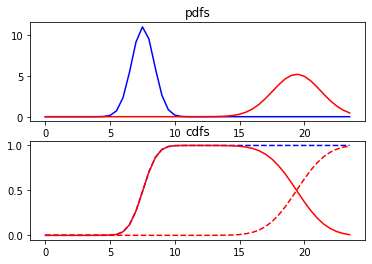

In [138]:
plot_model_tn(optimal_params_weekdaytn.x[0],optimal_params_weekdaytn.x[1],optimal_params_weekdaytn.x[2],optimal_params_weekdaytn.x[3])

In [139]:
def plot_model_tn_th(loc_ar=.3, scale_ar=.05, loc_de=.8, scale_de=.1,thresh=.8):
    # arrivals
    a_ar = -loc_ar/scale_ar
    b_ar = (1-loc_ar)/scale_ar

    # departures
    a_de = -loc_de/scale_de
    b_de = (1-loc_de)/scale_de


    pdf_ar = truncnorm.pdf(time_tn, a_ar, b_ar, loc=loc_ar, scale=scale_ar)
    pdf_de = truncnorm.pdf(time_tn, a_de, b_de, loc=loc_de, scale=scale_de)
    cdf_ar = truncnorm.cdf(time_tn, a_ar, b_ar, loc=loc_ar, scale=scale_ar)
    
    ix_parking_full= np.argmax(cdf_ar>thresh)
    pdf_ar[cdf_ar>thresh] =0
    cdf_ar[cdf_ar>thresh] = thresh
    cdf_ar = cdf_ar/thresh
    
    cdf_de = truncnorm.cdf(time_tn, a_de, b_de, loc=loc_de, scale=scale_de)

    fig, ax = plt.subplots(2)
    ax[0].plot(time, pdf_ar , '-b')
    ax[0].plot(time, pdf_de, '-r')
    ax[0].plot(0.5*ix_parking_full*np.array([1, 1]),[0, max(pdf_ar)],'--')
    ax[0].set_title('pdfs')

    ax[1].plot(time, cdf_ar , '--b')
    ax[1].plot(time, cdf_de, '--r')
    ax[1].plot(time, cdf_ar-cdf_de, 'r')
    ax[1].plot(0.5*ix_parking_full*np.array([1, 1]),[0,1],'--')
    ax[1].set_title('cdfs')

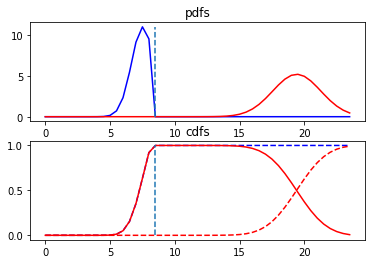

In [140]:
plot_model_tn_th(optimal_params_weekdaytn.x[0],optimal_params_weekdaytn.x[1],optimal_params_weekdaytn.x[2],
              optimal_params_weekdaytn.x[3],optimal_params_weekdaytn.x[4])

In [141]:
weekday_math_params = optimal_params_weekdaytn.x
weekday_math_params

array([0.31383963, 0.03621748, 0.80902433, 0.0772256 , 0.76561431,
       0.62051281, 0.85422873, 0.86941477, 0.82320583, 0.87775692,
       0.92357488, 0.87157498, 0.8335844 , 0.83529347, 0.8482066 ,
       0.82297959, 0.83987068, 0.84802219, 0.80918356, 0.80282006,
       0.80040425, 0.79872722, 0.81020112, 0.80603411, 0.73694148,
       0.73420851, 0.7261689 , 0.72622504, 0.73035329, 0.7261689 ,
       0.73093133, 0.71026415])

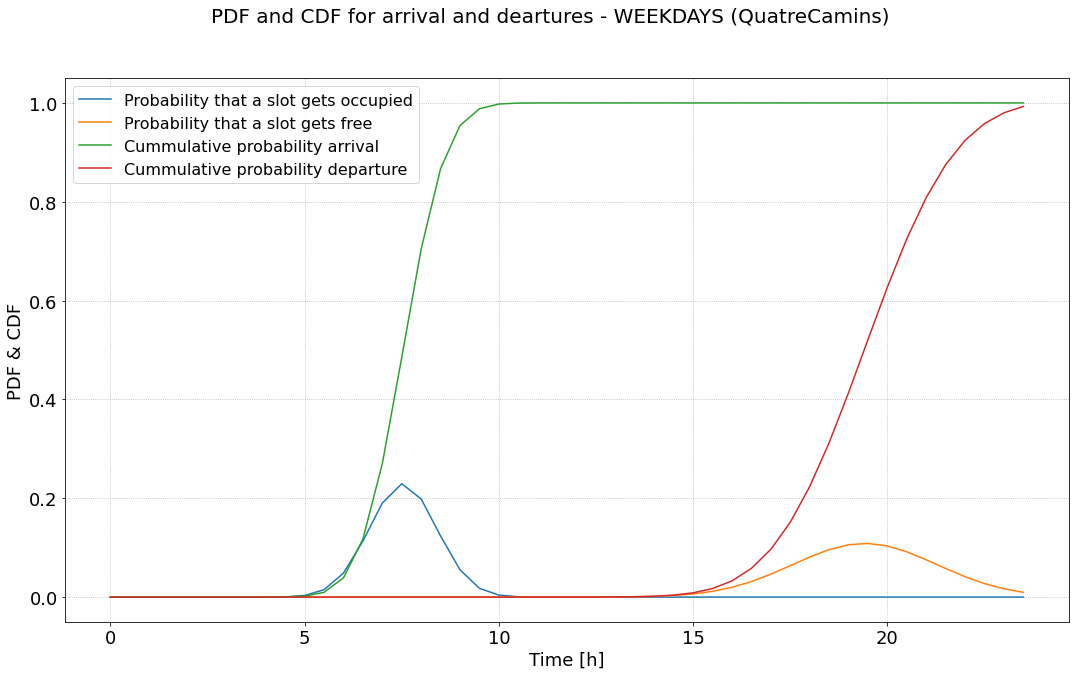

In [221]:
time2 = np.linspace(0,23.5,48)
tn1_wd=tn(time_tn, optimal_params_weekdaytn.x[0], optimal_params_weekdaytn.x[1])
tn2_wd=tn(time_tn, optimal_params_weekdaytn.x[2], optimal_params_weekdaytn.x[3])
#tn1_wd = gam(time2, optimal_params_weekday.x[0], optimal_params_weekday.x[1])
#tn2_wd = gam(time2, optimal_params_weekday.x[2], optimal_params_weekday.x[3])

#cdf1_wd_ap = generate_cdf(tn1_wd)
#cdf2_wd_ap = generate_cdf(tn2_wd)
cdf1_wd = tn_cdf(time_tn, optimal_params_weekdaytn.x[0], optimal_params_weekdaytn.x[1])
prototype_math_arr_weekday=cdf1_wd
cdf2_wd = tn_cdf(time_tn, optimal_params_weekdaytn.x[2], optimal_params_weekdaytn.x[3])
prototype_math_dep_weekday=cdf2_wd
#cdf1_wd = generate_cdf(tn1_wd)
#cdf2_wd = generate_cdf(tn2_wd)

resta_wd = np.array(cdf1_wd) - np.array(cdf2_wd)
prototype_math_weekday = resta_wd#/sum(resta_wd)

#resta_wd_ap= np.array(cdf1_wd_ap) - np.array(cdf2_wd_ap)
#prototype_math_weekday_ap = resta_wd_ap/sum(resta_wd_ap)

fig = plt.figure(figsize=(18,10))
fig.suptitle("PDF and CDF for arrival and deartures - WEEKDAYS ("+current_parking+")", fontsize=20)
plt.plot(time2, tn1_wd/sum(tn1_wd), label="Probability that a slot gets occupied")
plt.plot(time2, tn2_wd/sum(tn2_wd),  label="Probability that a slot gets free")
plt.plot(time2, cdf1_wd, label="Cummulative probability arrival")
plt.plot(time2, cdf2_wd, label="Cummulative probability departure")
#plt.plot(time2, cdf1_wd_ap, label="Cummulative probability arrival approx")
#plt.plot(time2, cdf2_wd_ap, label="Cummulative probability departure approx")
plt.grid(linestyle='dotted')
plt.xlabel("Time [h]", fontsize=18)
plt.ylabel("PDF & CDF", fontsize=18)
plt.yticks(fontsize=18)
plt.xticks(fontsize=18)
plt.legend(fontsize=16, loc="upper left");


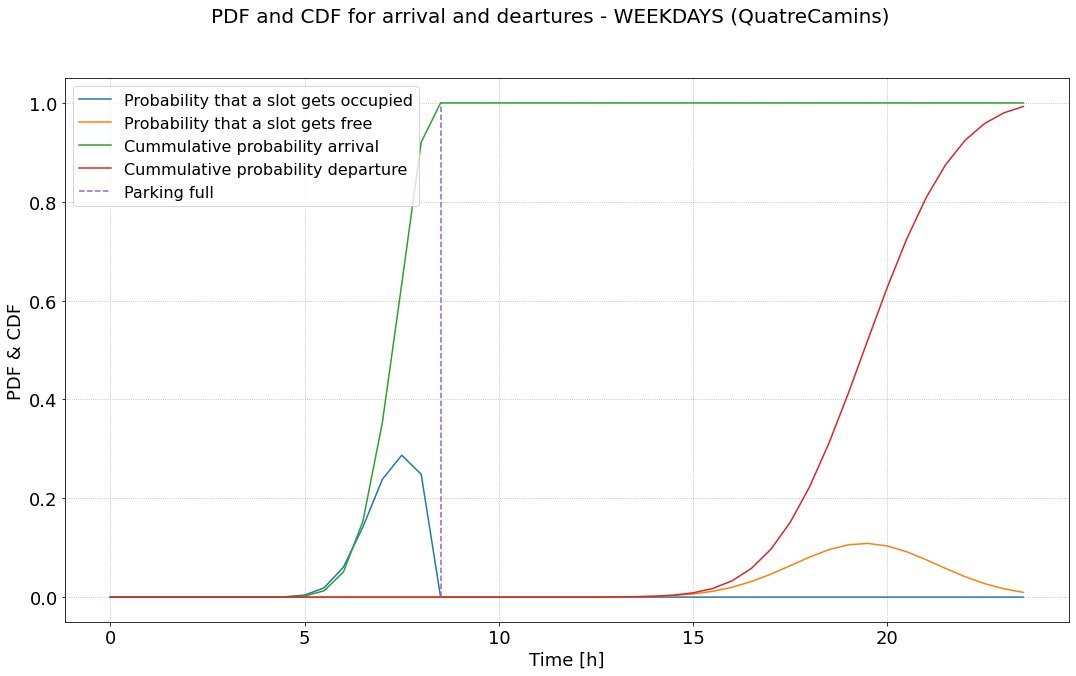

In [223]:
time2 = np.linspace(0,23.5,48)
tn1_wd=tn(time_tn, optimal_params_weekdaytn.x[0], optimal_params_weekdaytn.x[1])
tn2_wd=tn(time_tn, optimal_params_weekdaytn.x[2], optimal_params_weekdaytn.x[3])

cdf1_wd = tn_cdf(time_tn, optimal_params_weekdaytn.x[0], optimal_params_weekdaytn.x[1])

ix_parking_full= np.argmax(cdf1_wd>optimal_params_weekdaytn.x[4])
tn1_wd[cdf1_wd>optimal_params_weekdaytn.x[4]] =0
cdf1_wd[cdf1_wd>optimal_params_weekdaytn.x[4]] = optimal_params_weekdaytn.x[4]
cdf1_wd = cdf1_wd/optimal_params_weekdaytn.x[4]

cdf2_wd = tn_cdf(time_tn, optimal_params_weekdaytn.x[2], optimal_params_weekdaytn.x[3])
#cdf1_wd = generate_cdf(tn1_wd)
#cdf2_wd = generate_cdf(tn2_wd)

resta_wd = np.array(cdf1_wd) - np.array(cdf2_wd)
prototype_math_weekday = resta_wd#/sum(resta_wd)

#resta_wd_ap= np.array(cdf1_wd_ap) - np.array(cdf2_wd_ap)
#prototype_math_weekday_ap = resta_wd_ap/sum(resta_wd_ap)

fig = plt.figure(figsize=(18,10))
fig.suptitle("PDF and CDF for arrival and deartures - WEEKDAYS ("+current_parking+")", fontsize=20)
plt.plot(time2, tn1_wd/sum(tn1_wd), label="Probability that a slot gets occupied")
plt.plot(time2, tn2_wd/sum(tn2_wd),  label="Probability that a slot gets free")
plt.plot(time2, cdf1_wd, label="Cummulative probability arrival")
plt.plot(time2, cdf2_wd, label="Cummulative probability departure")
plt.plot(0.5*ix_parking_full*np.array([1, 1]),[0,1],'--',label="Parking full")
#plt.plot(time2, cdf1_wd_ap, label="Cummulative probability arrival approx")
#plt.plot(time2, cdf2_wd_ap, label="Cummulative probability departure approx")
plt.grid(linestyle='dotted')
plt.xlabel("Time [h]", fontsize=18)
plt.ylabel("PDF & CDF", fontsize=18)
plt.yticks(fontsize=18)
plt.xticks(fontsize=18)
plt.legend(fontsize=16, loc="upper left");

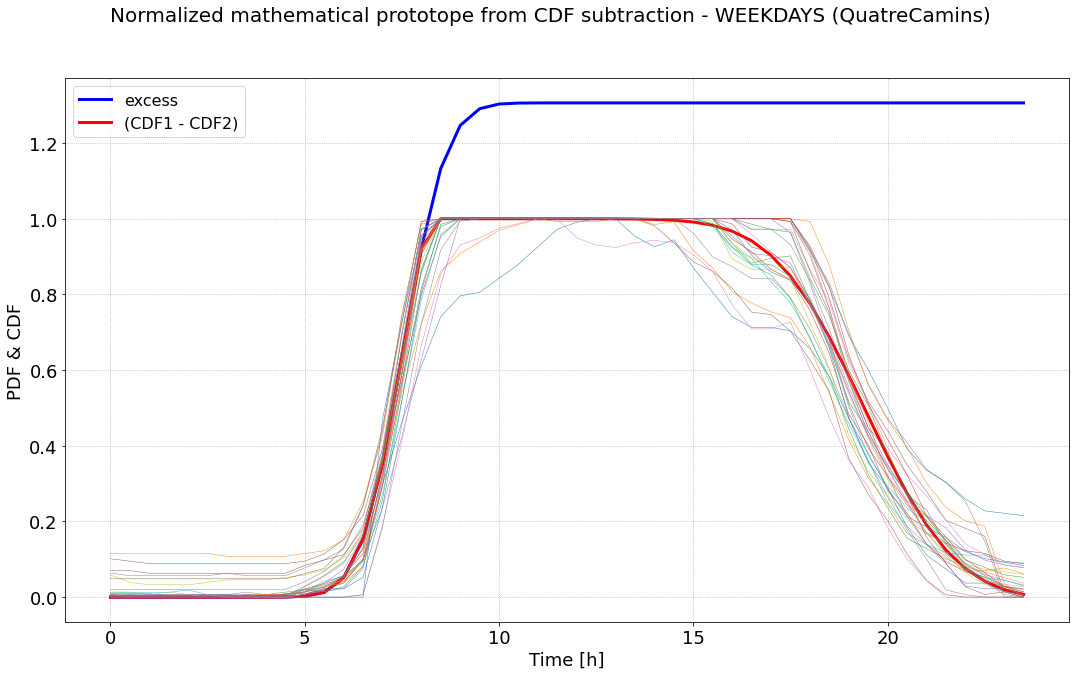

In [225]:
fig = plt.figure(figsize=(18,10))
fig.suptitle("Normalized mathematical prototope from CDF subtraction - WEEKDAYS ("+current_parking+")", fontsize=20)
plt.grid(linestyle='dotted')
plt.xlabel("Time [h]", fontsize=18)
plt.ylabel("PDF & CDF", fontsize=18)
plt.yticks(fontsize=18)
plt.xticks(fontsize=18)
plt.plot(time2, prototype_math_arr_weekday/optimal_params_weekdaytn.x[4], linewidth=3, color='blue', label="excess")
plt.plot(time2, prototype_math_weekday, linewidth=3, color='red', label="(CDF1 - CDF2)")
#plt.plot(time2, prototype_math_weekday_ap, linewidth=3, color='red', label="approx")
for i in range(0,len(training_weekdays_norm)):
    plt.plot(time, training_weekdays_norm[i], linewidth=0.45)

plt.legend(fontsize=16, loc="upper left");

0.8542287298163339
Parking full        = 08:30h
0.8694147730032808
Parking full        = 09:00h
0.8232058338803256
Parking full        = 08:30h
0.8777569195483979
Parking full        = 09:00h
0.9235748804667048
Parking full        = 09:00h
0.8715749772754621
Parking full        = 09:00h
0.8335843952829358
Parking full        = 08:30h
0.8352934748544476
Parking full        = 08:30h
0.8482066027808947
Parking full        = 08:30h
0.8229795913309781
Parking full        = 08:30h
0.8398706808382383
Parking full        = 08:30h
0.8480221913500021
Parking full        = 08:30h
0.8091835573651188
Parking full        = 08:30h
0.8028200588678661
Parking full        = 08:30h
0.8004042514416154
Parking full        = 08:30h
0.7987272156092936
Parking full        = 08:30h
0.8102011204817958
Parking full        = 08:30h
0.8060341121279883
Parking full        = 08:30h
0.736941482453518
Parking full        = 08:30h
0.7342085145620589
Parking full        = 08:30h


<ipython-input-146-8b66ef13fecd>:28: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(figsize=(18,10))


0.7261689044297122
Parking full        = 08:30h
0.7262250433237378
Parking full        = 08:30h
0.7303532935839379
Parking full        = 08:30h
0.7261689044400079
Parking full        = 08:30h
0.7309313349567987
Parking full        = 08:30h
0.710264151883397
Parking full        = 08:30h


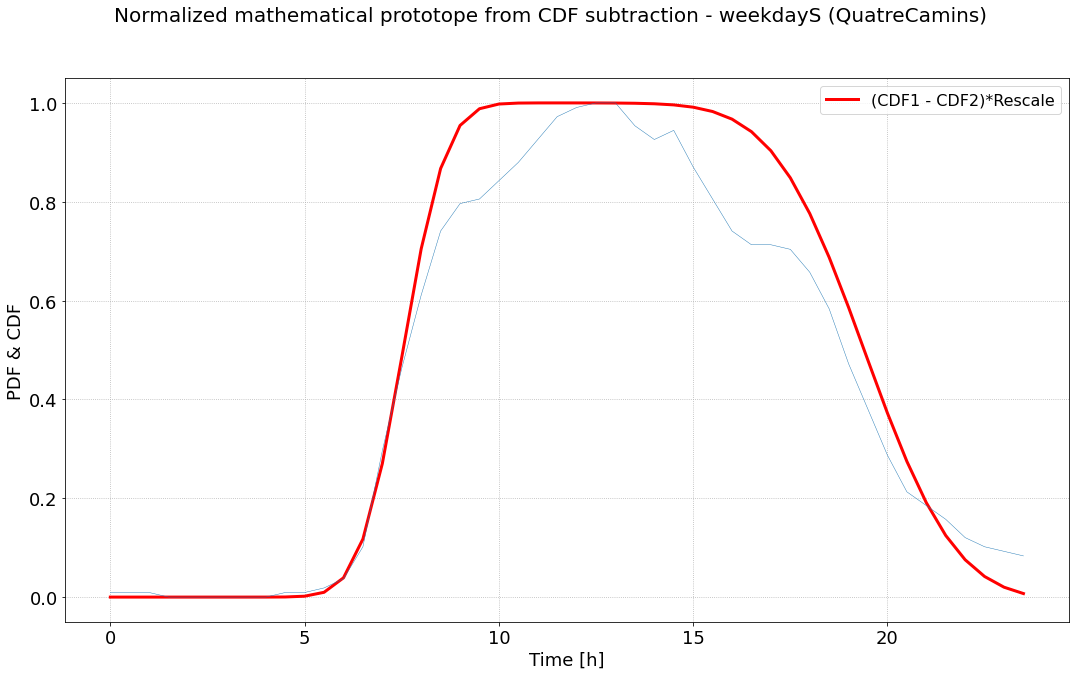

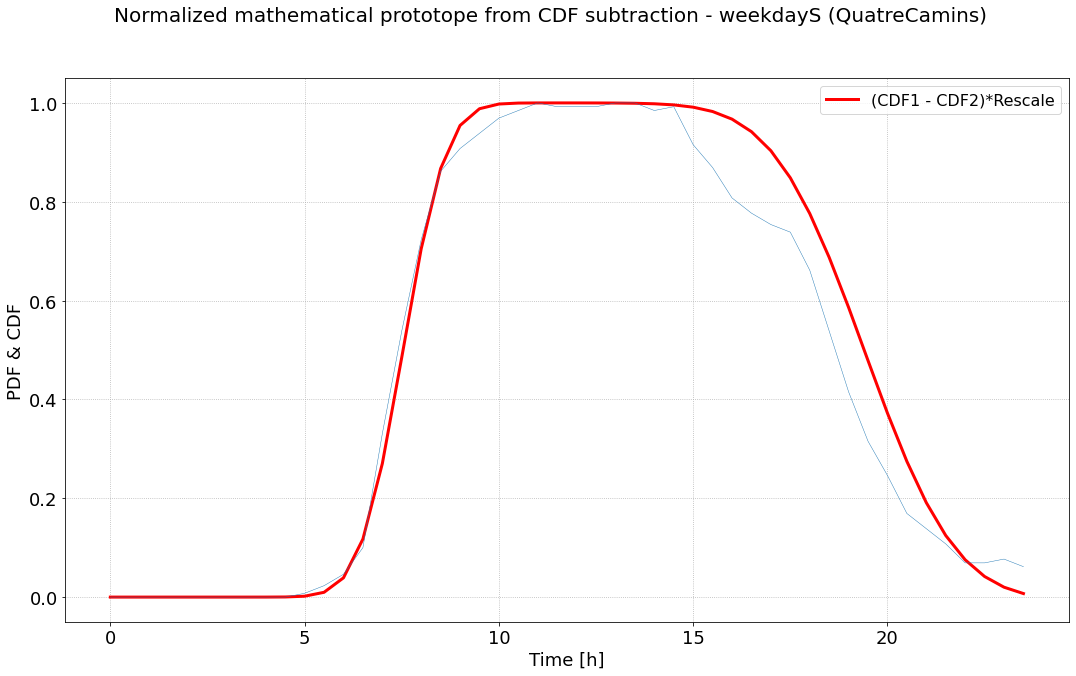

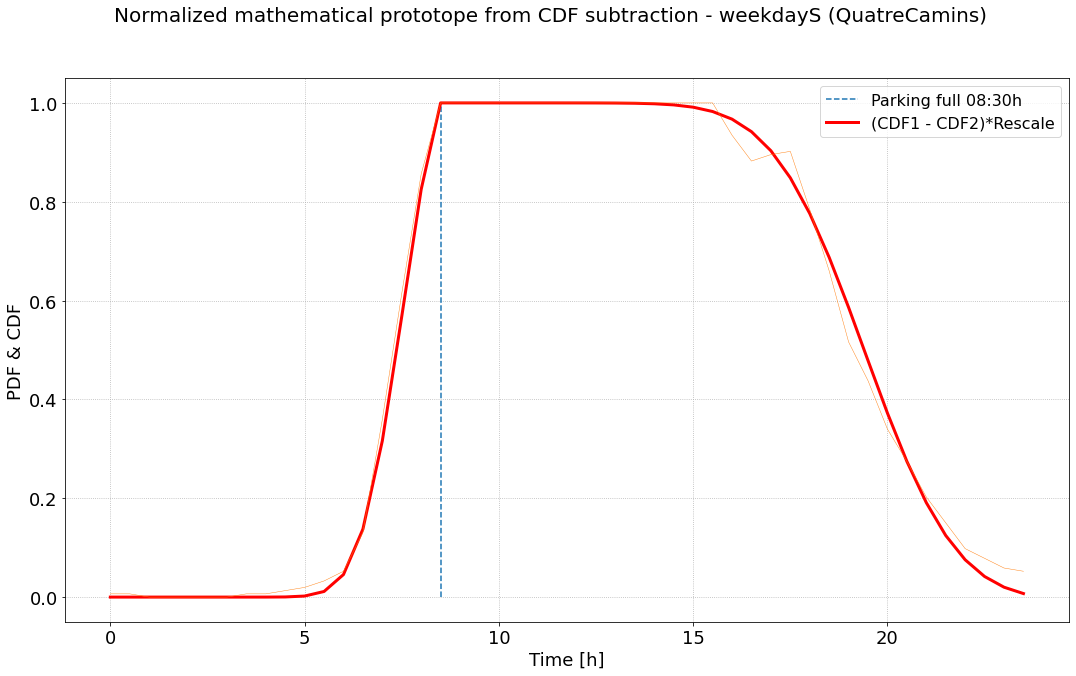

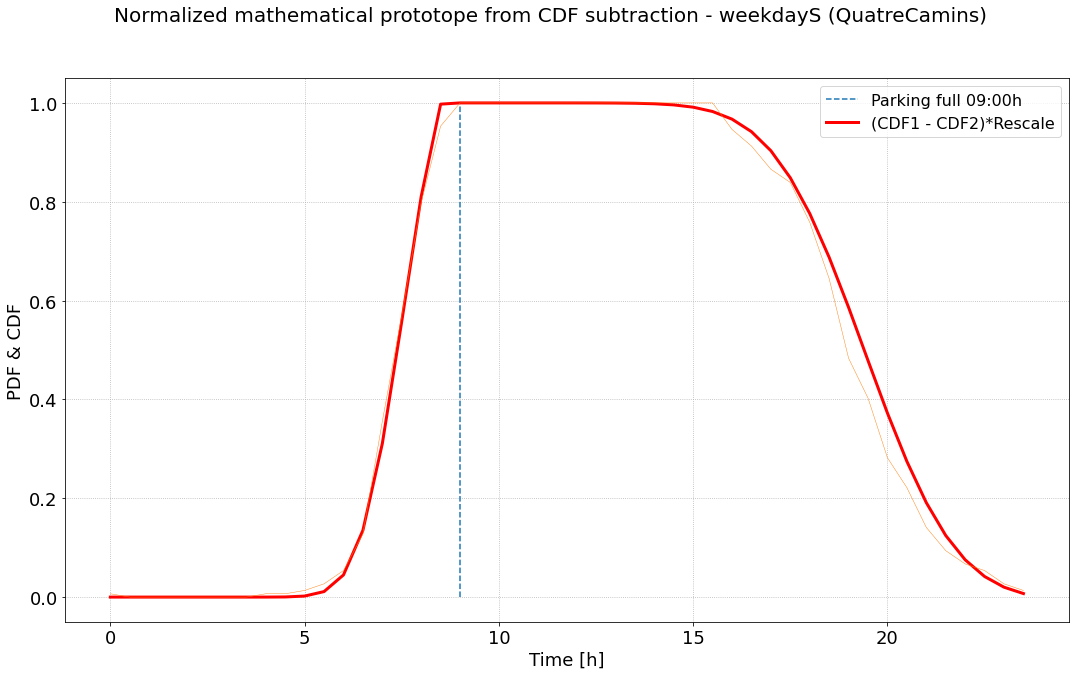

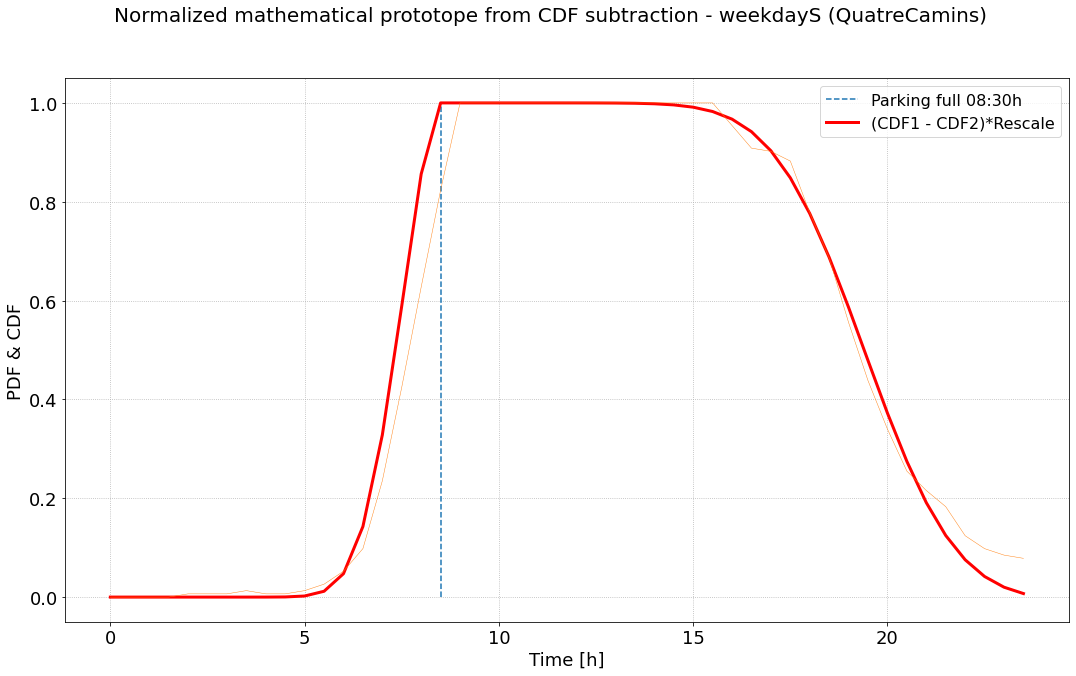

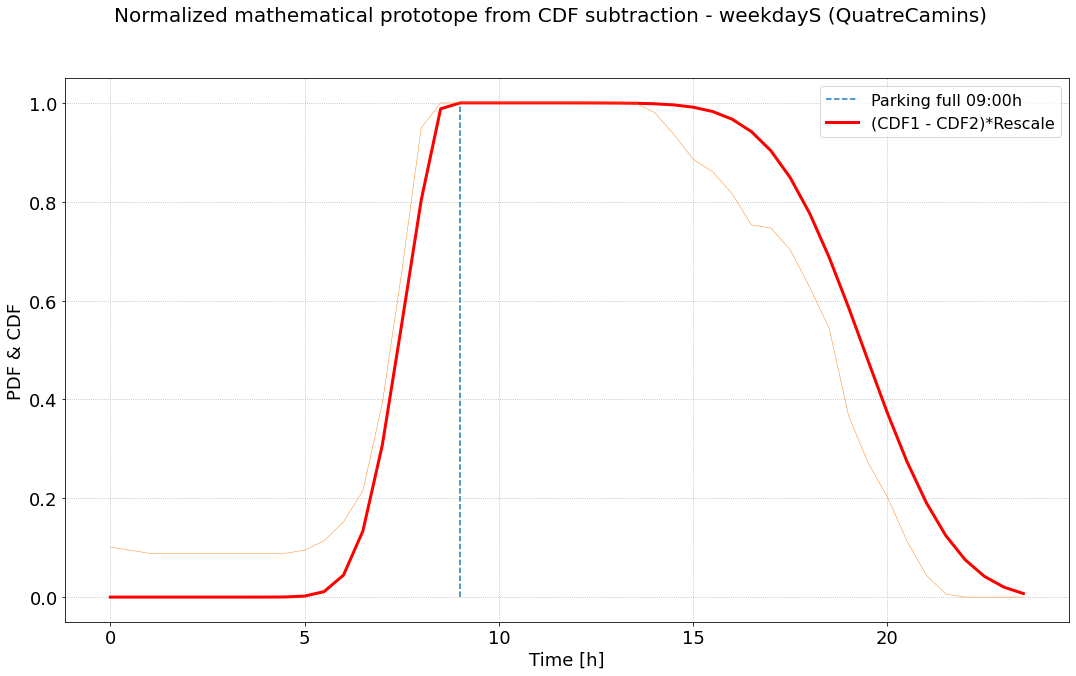

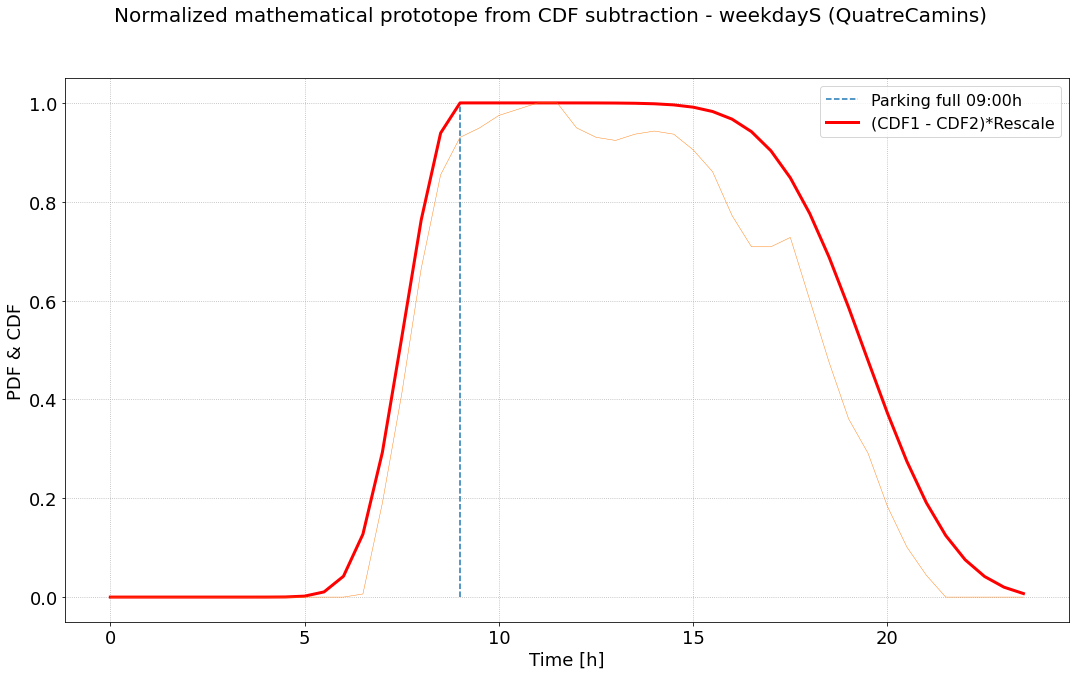

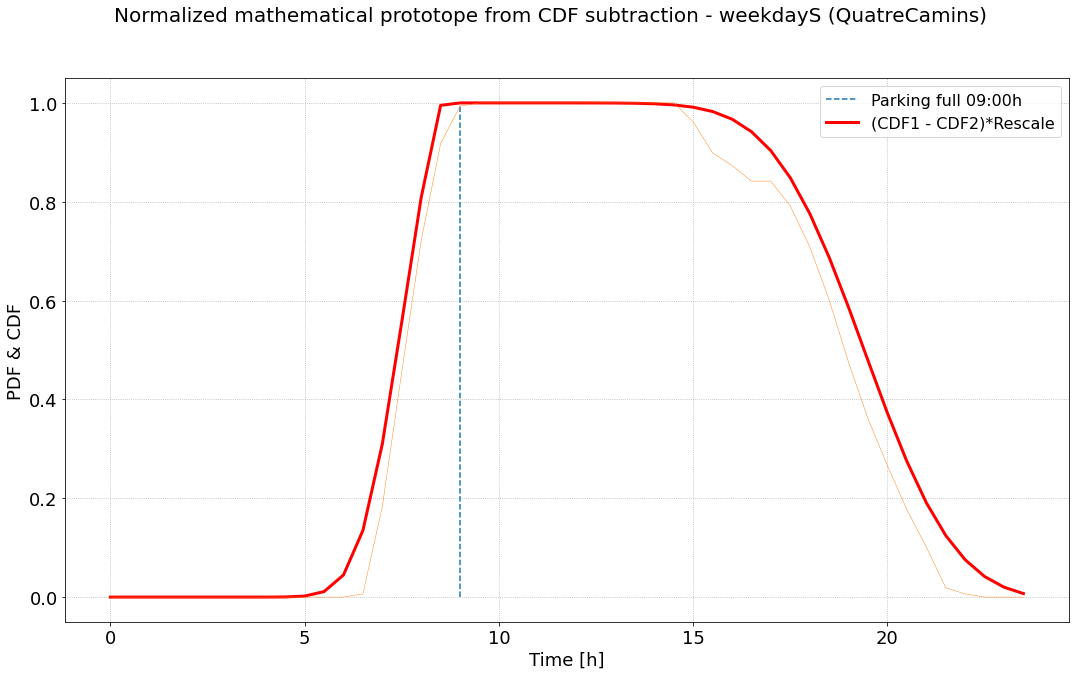

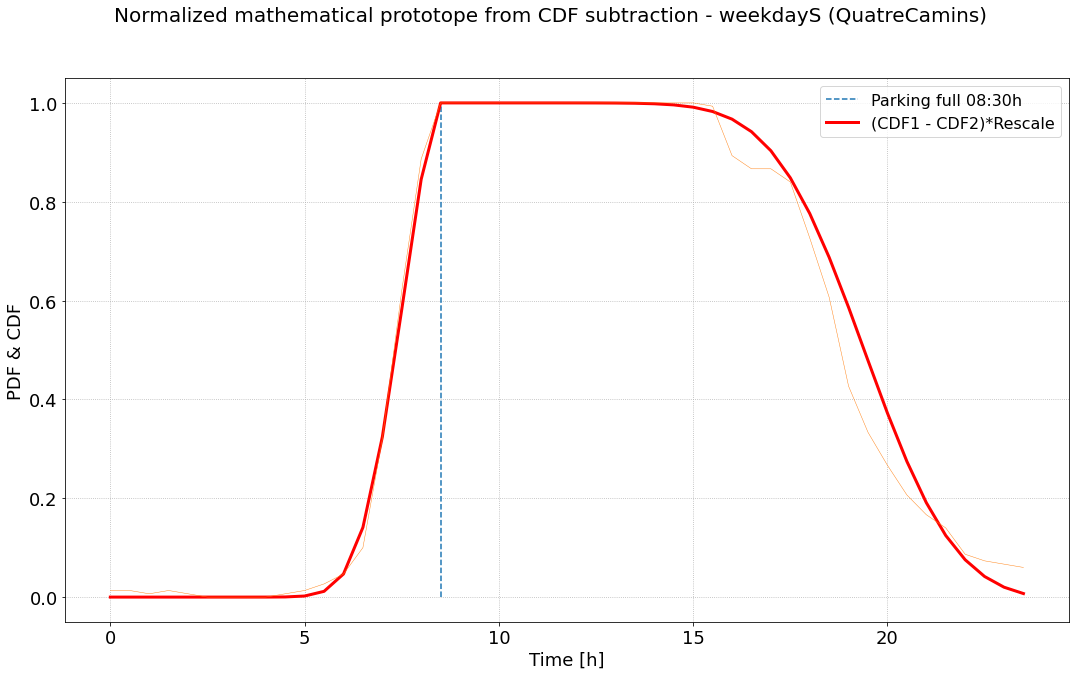

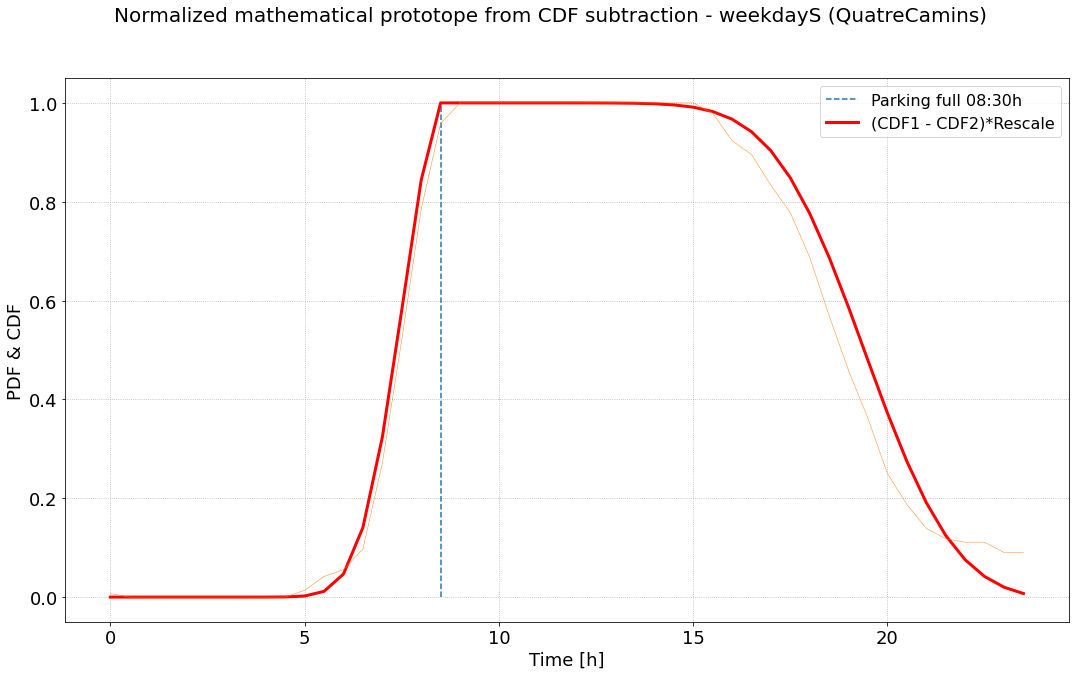

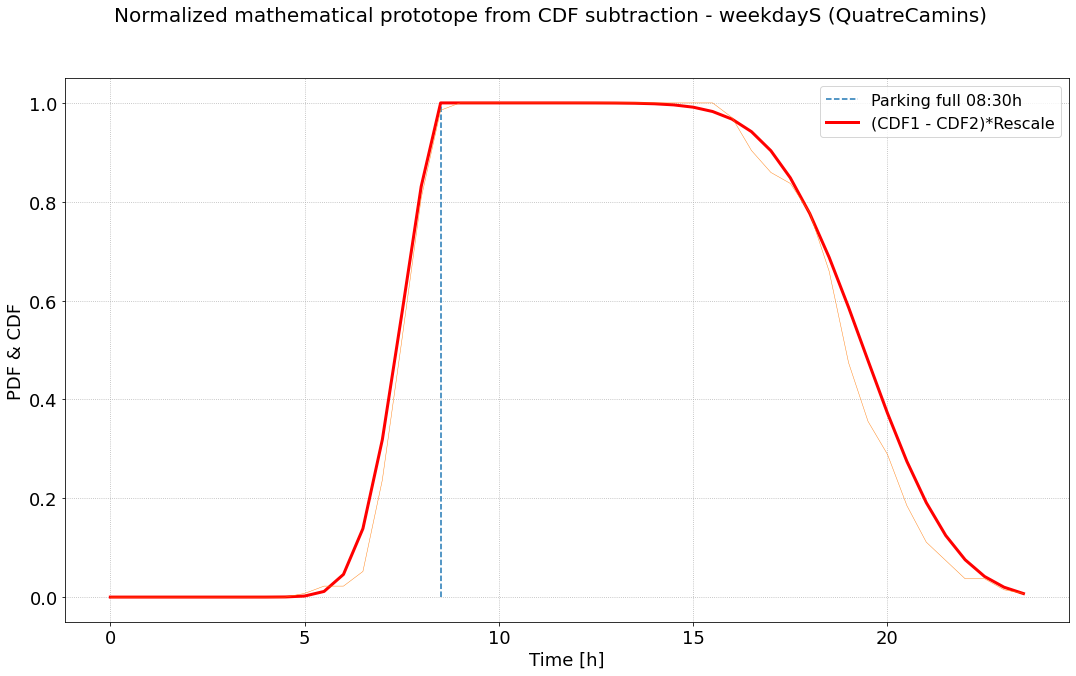

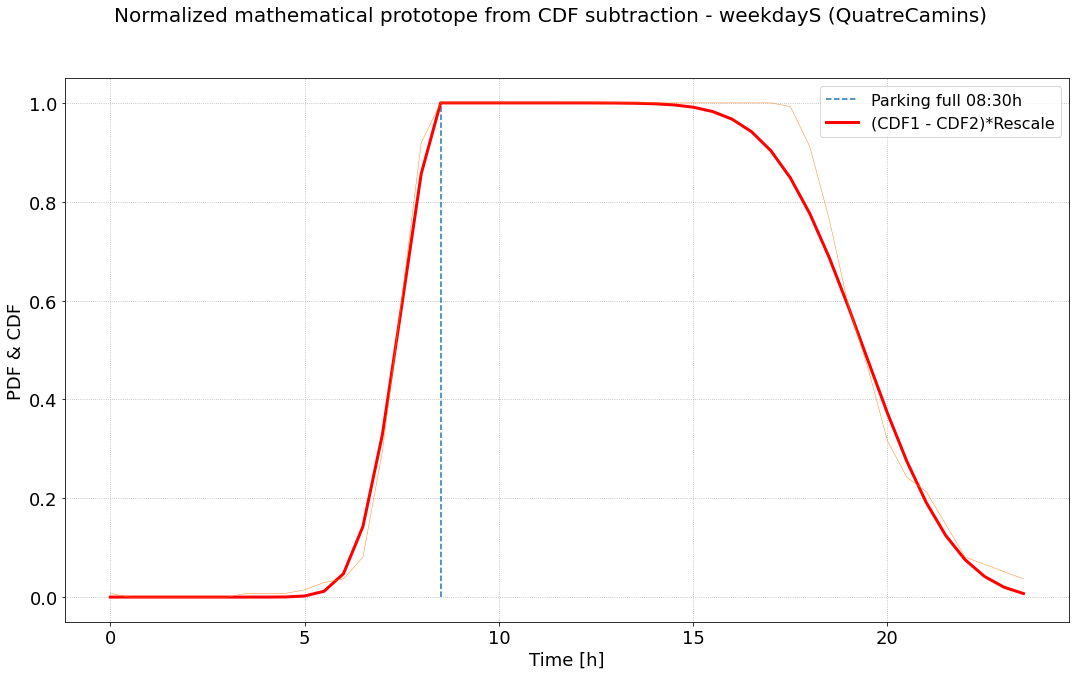

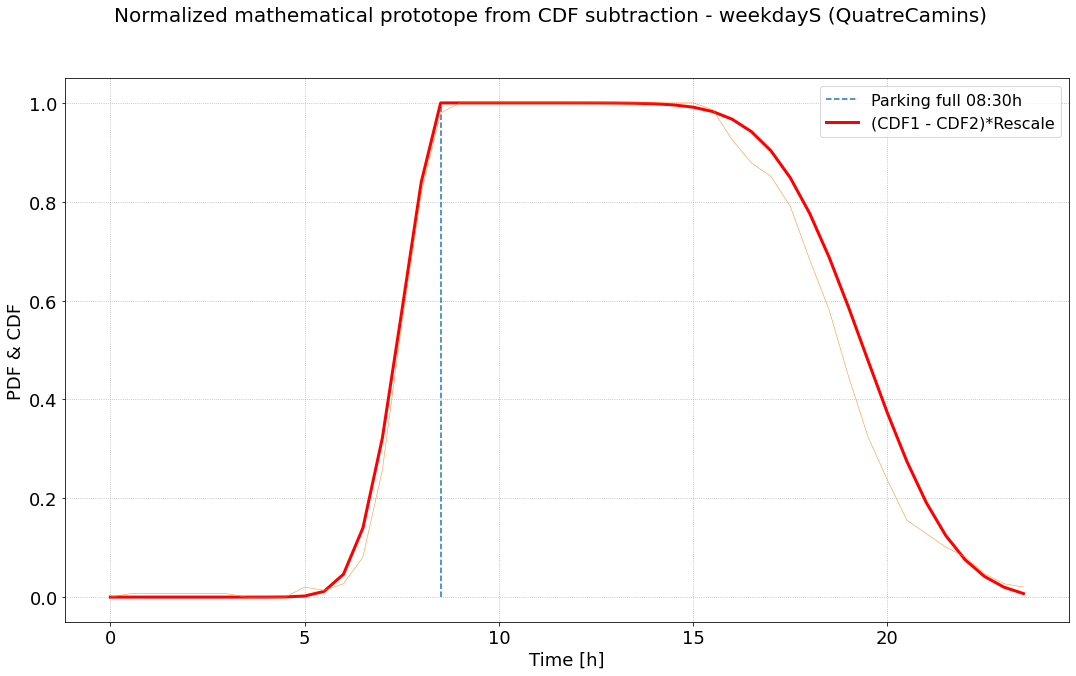

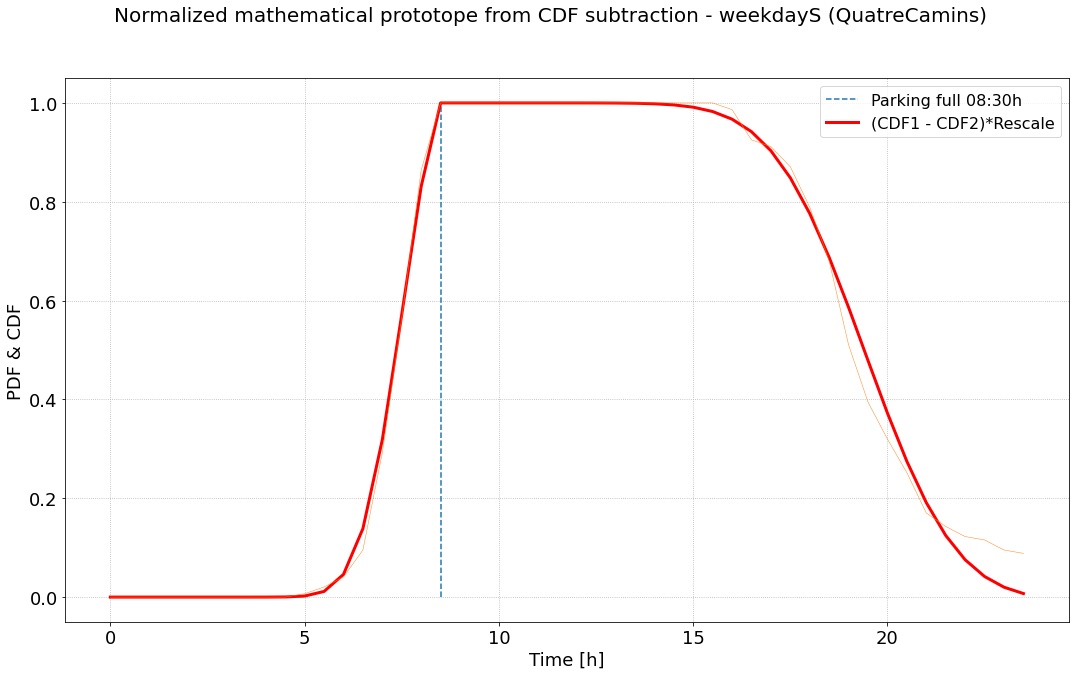

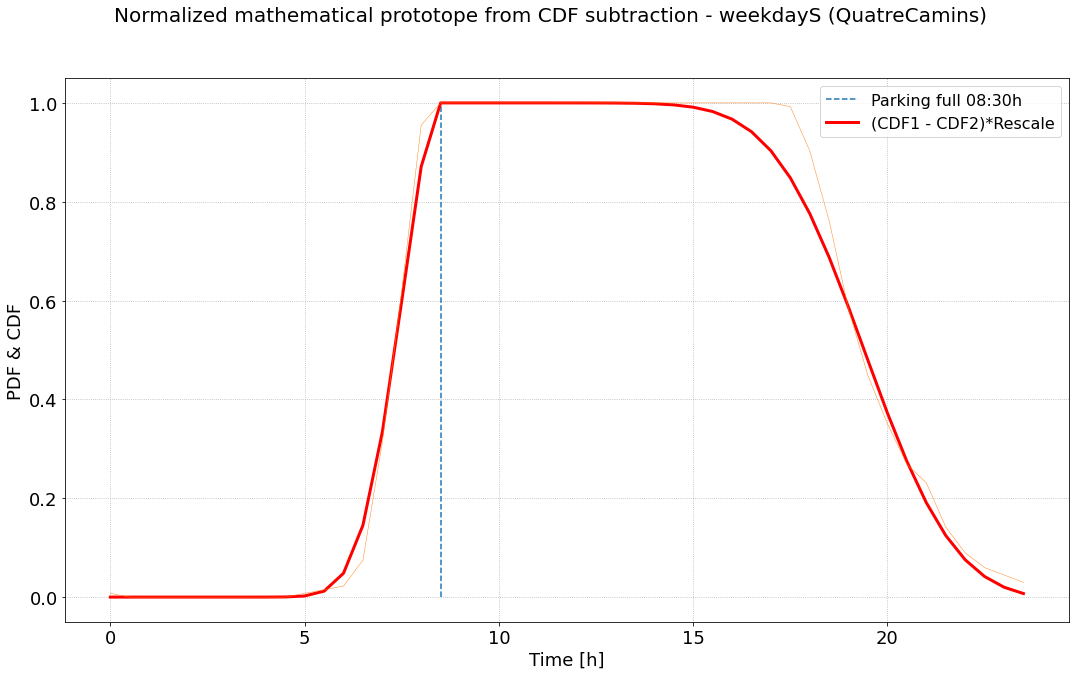

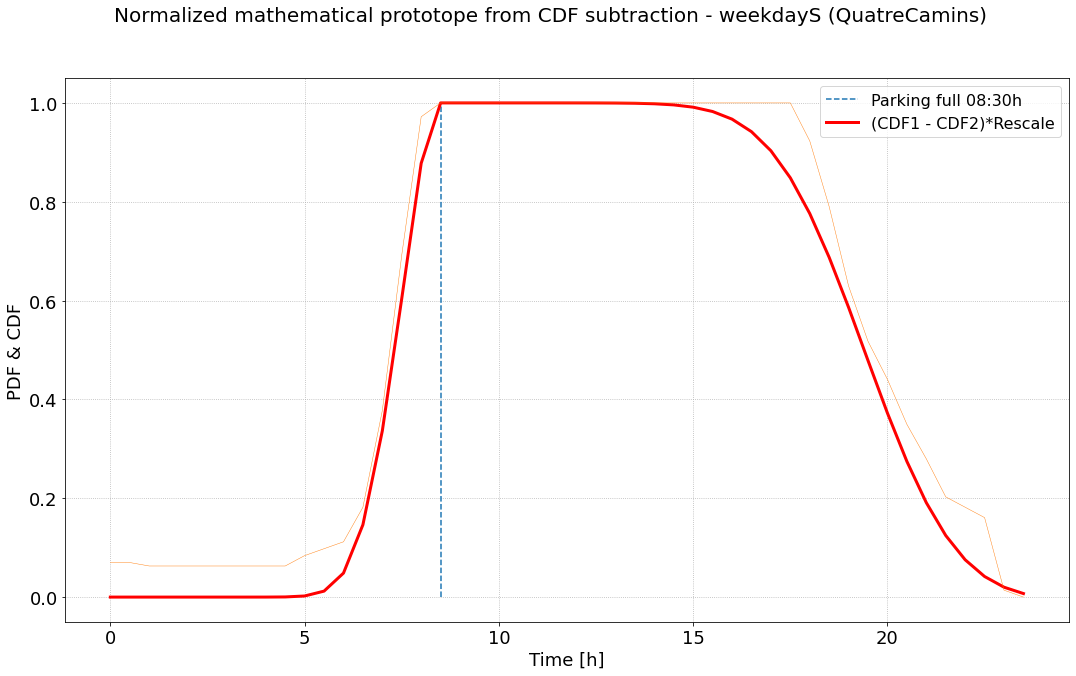

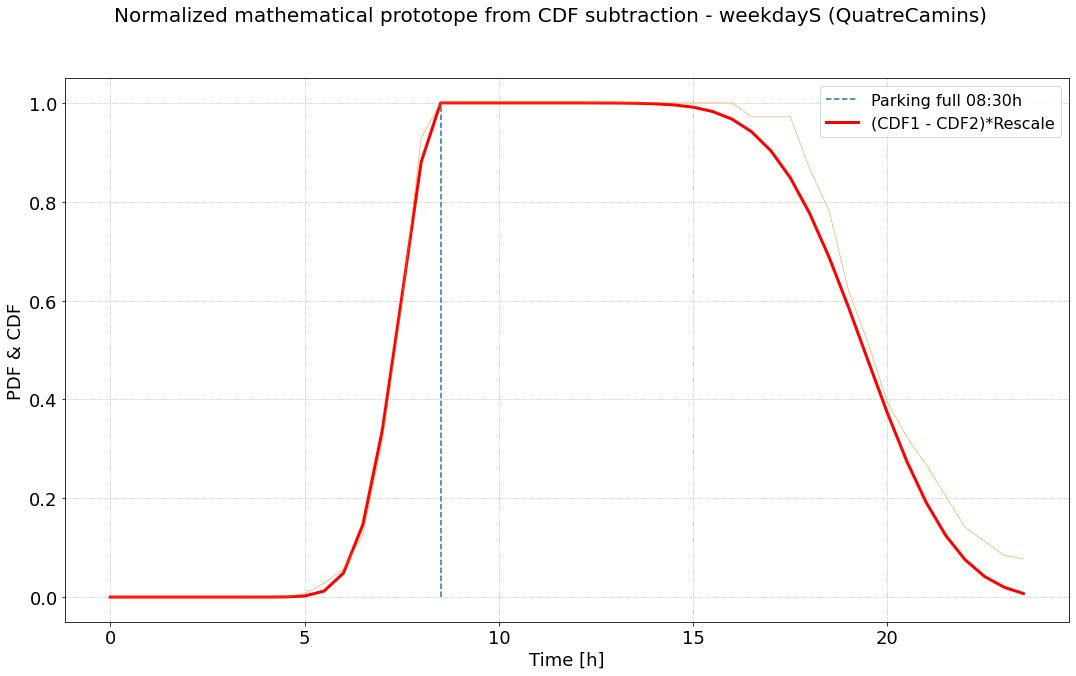

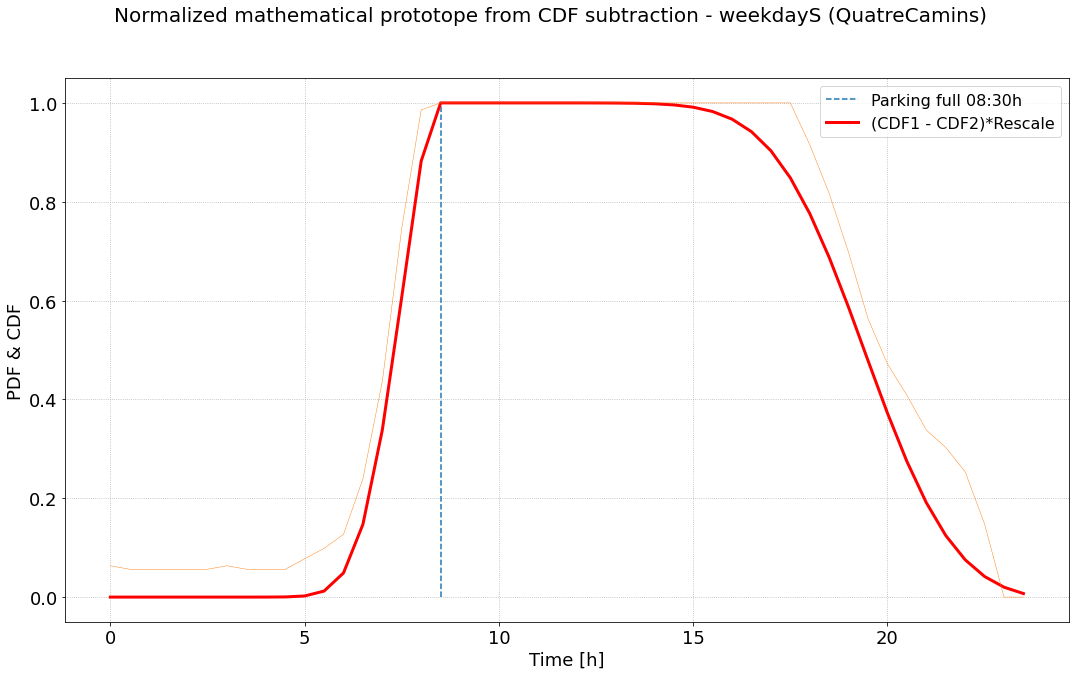

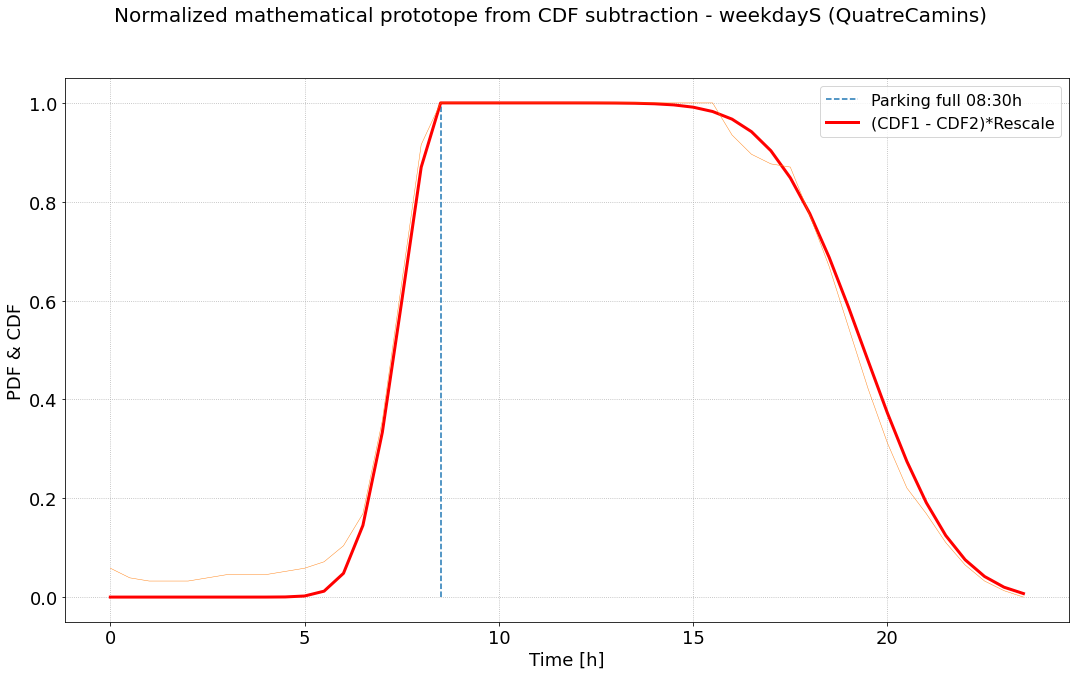

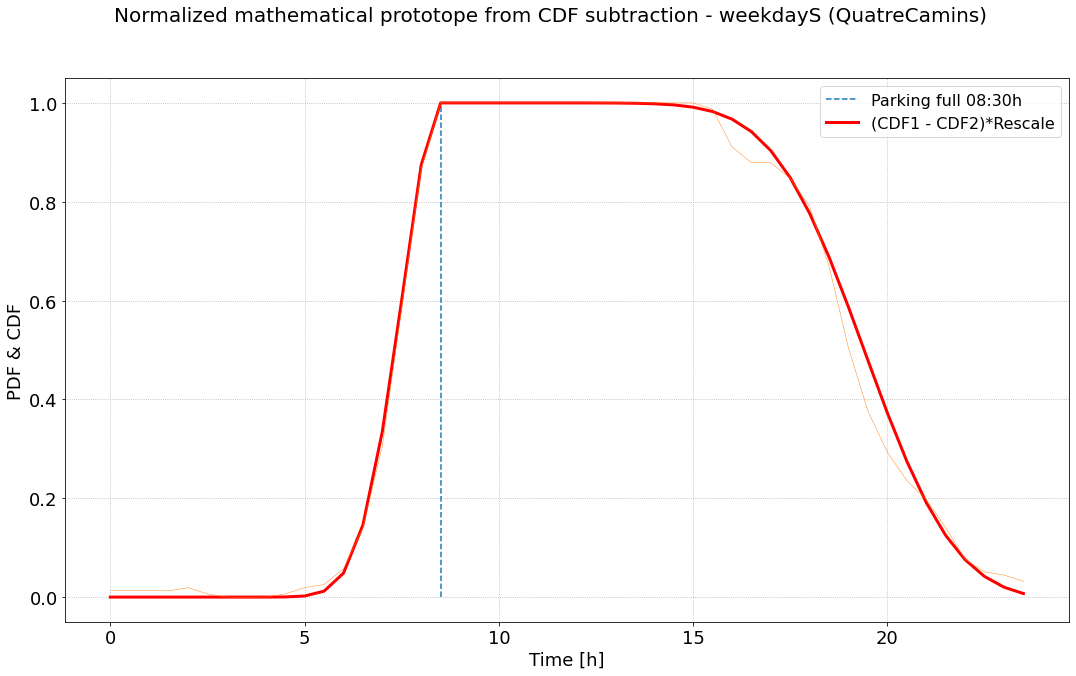

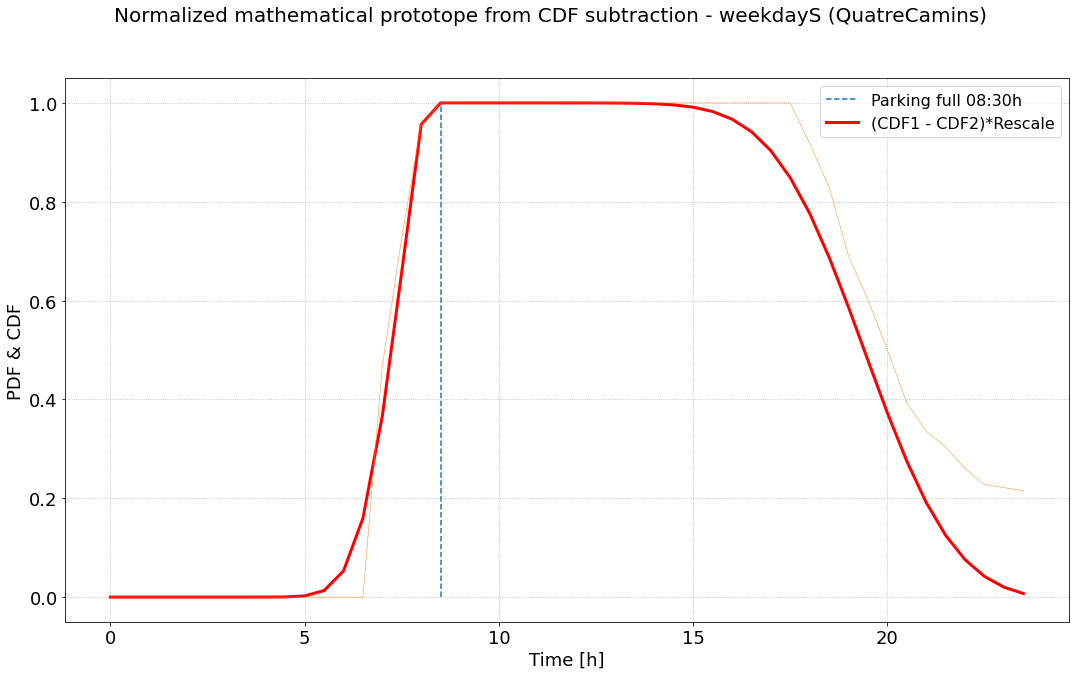

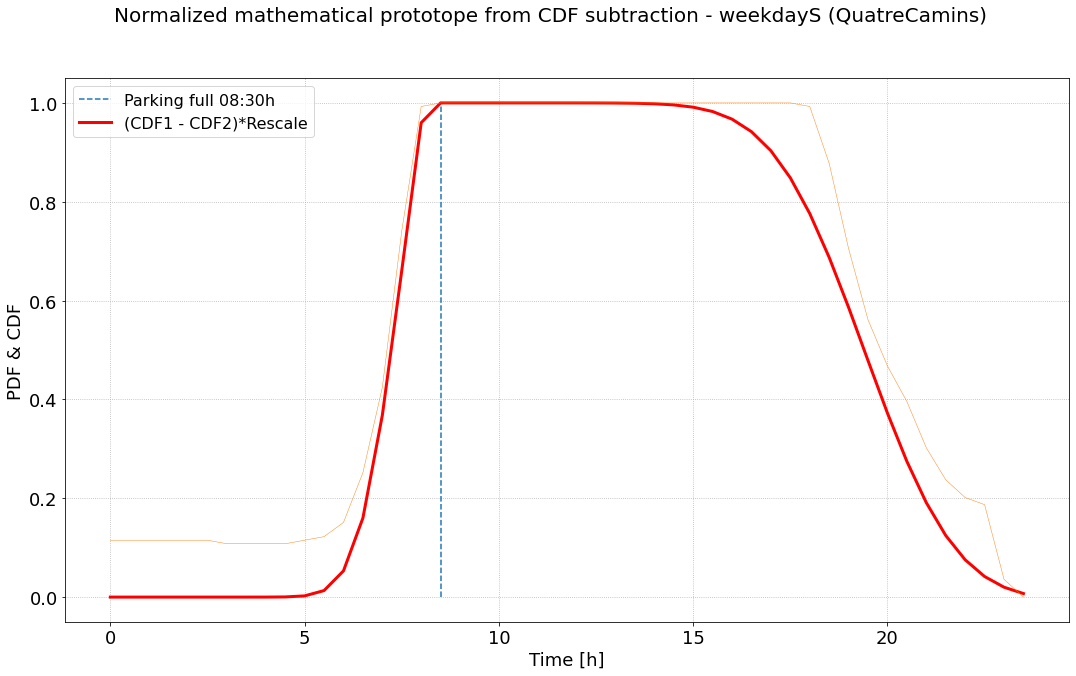

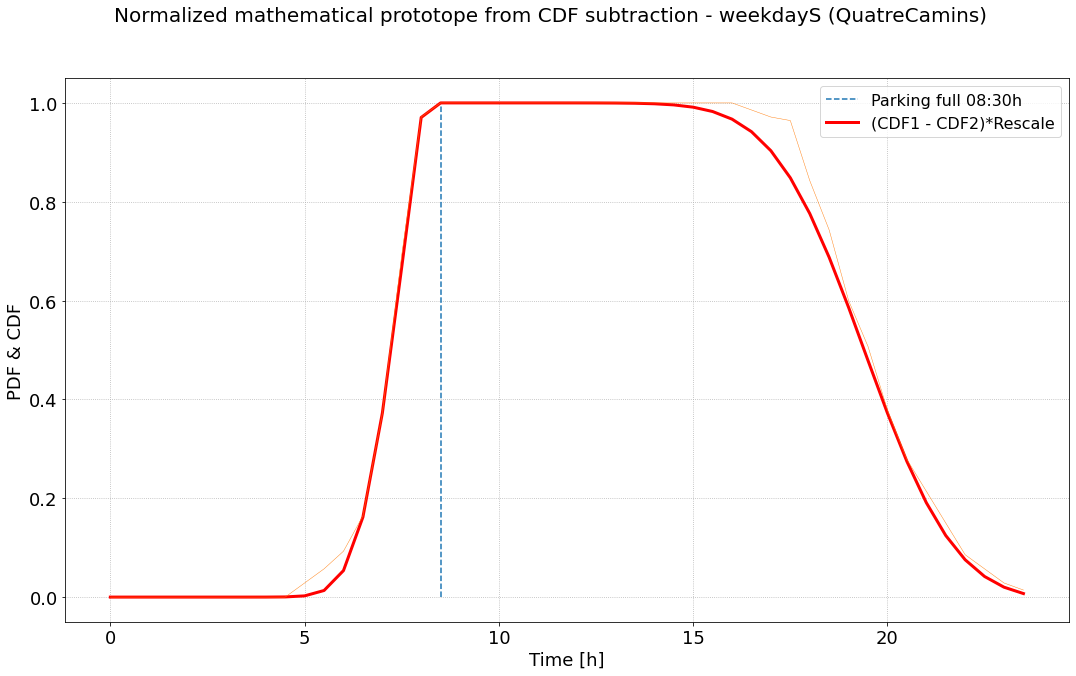

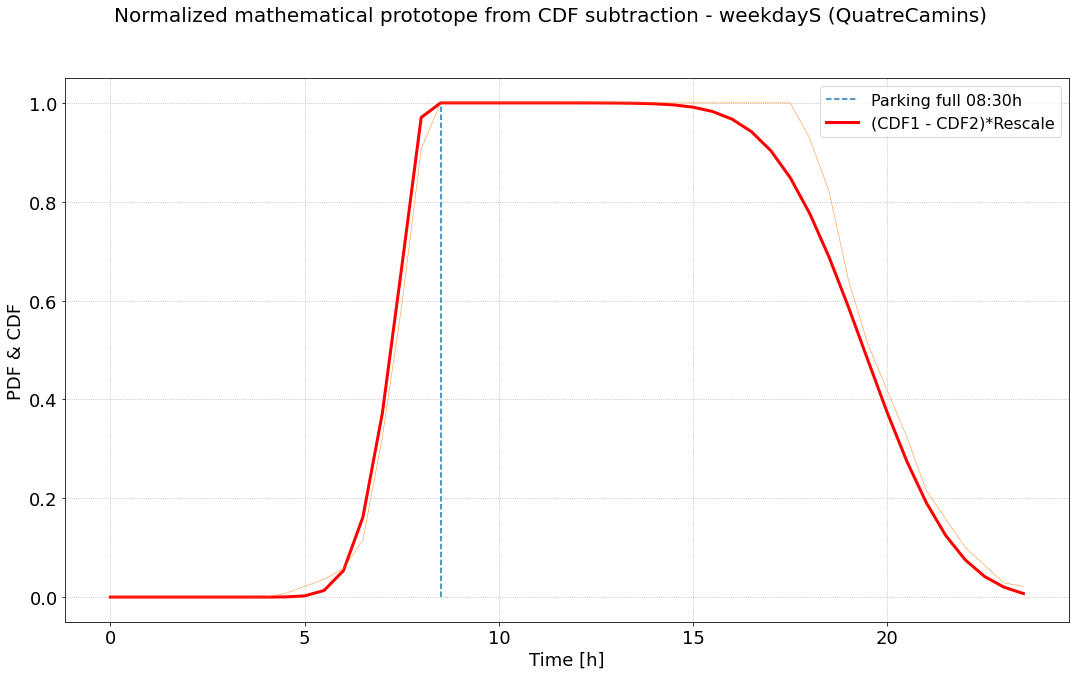

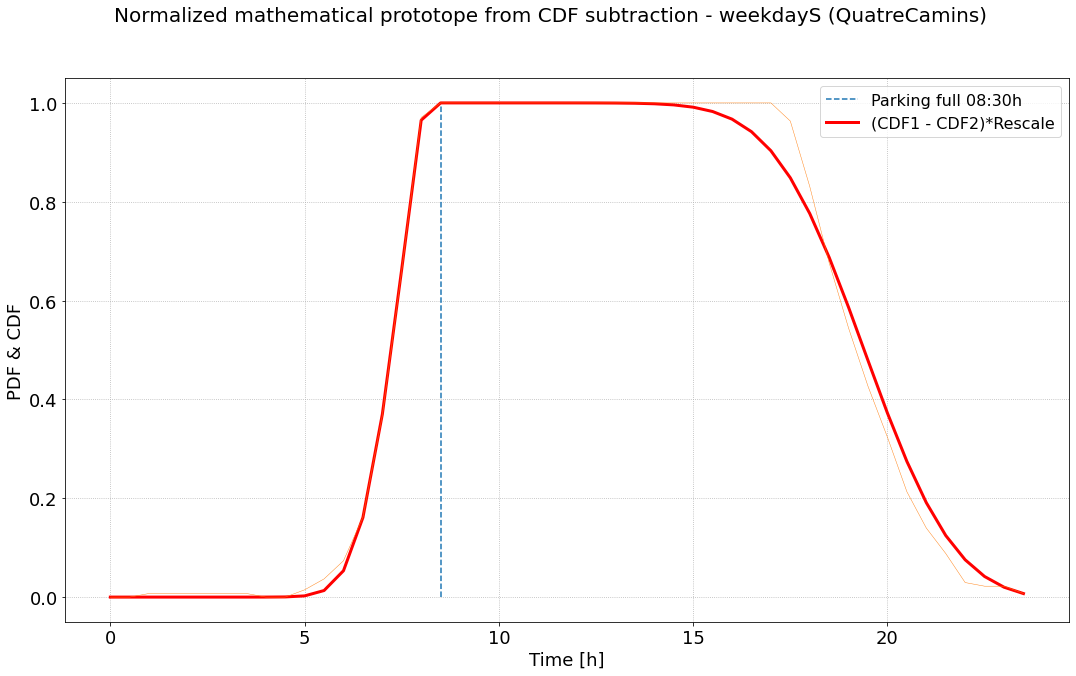

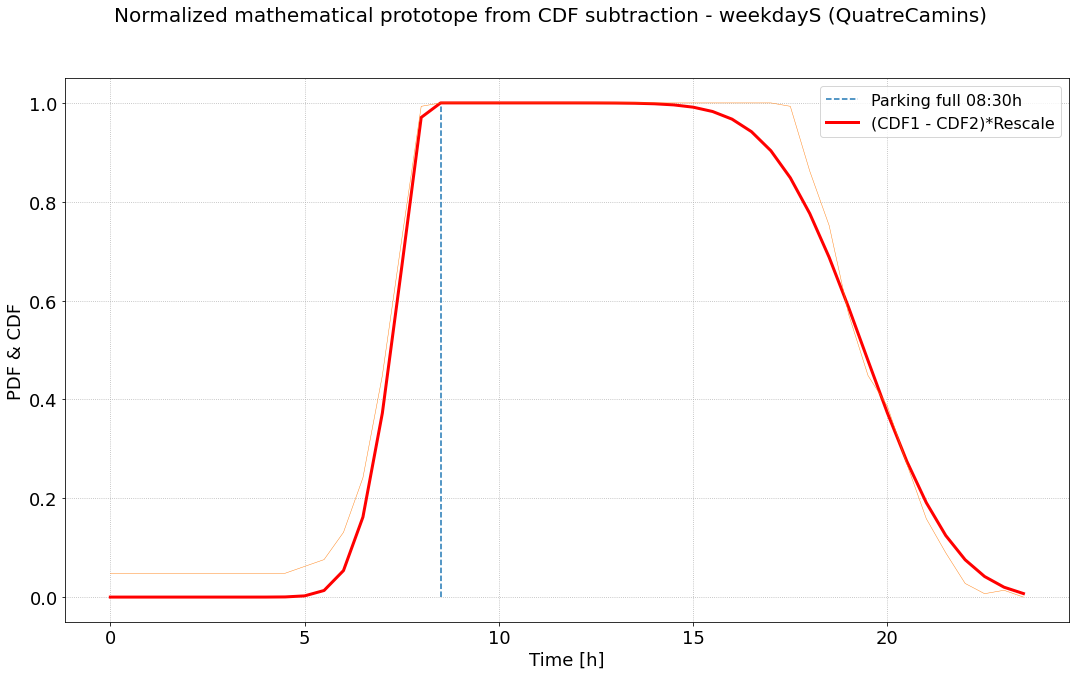

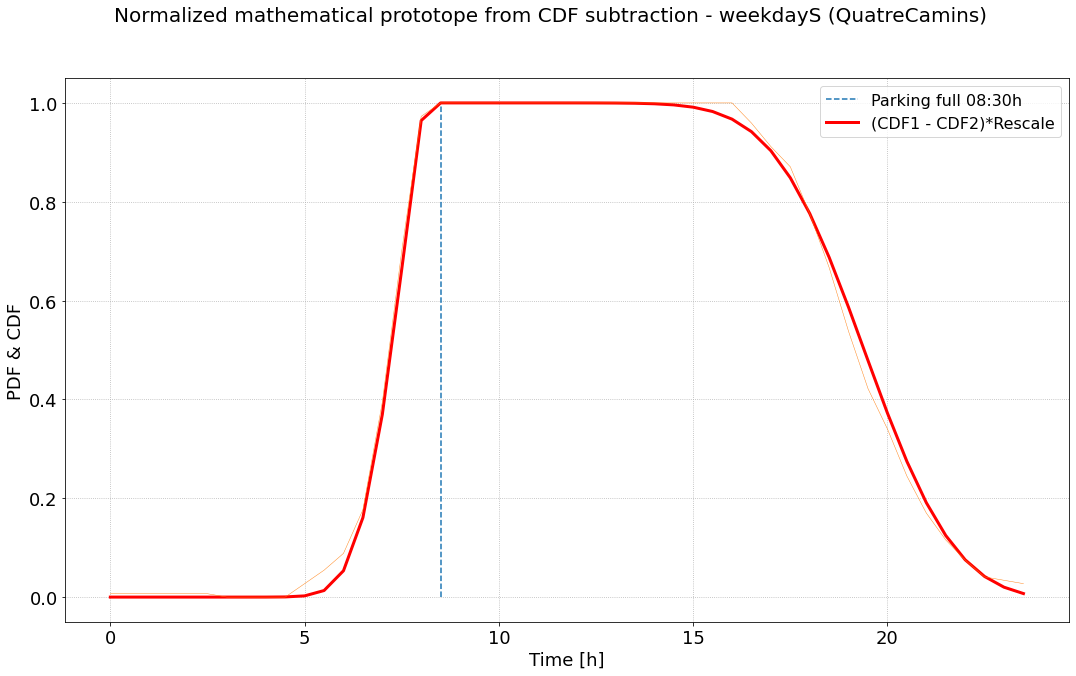

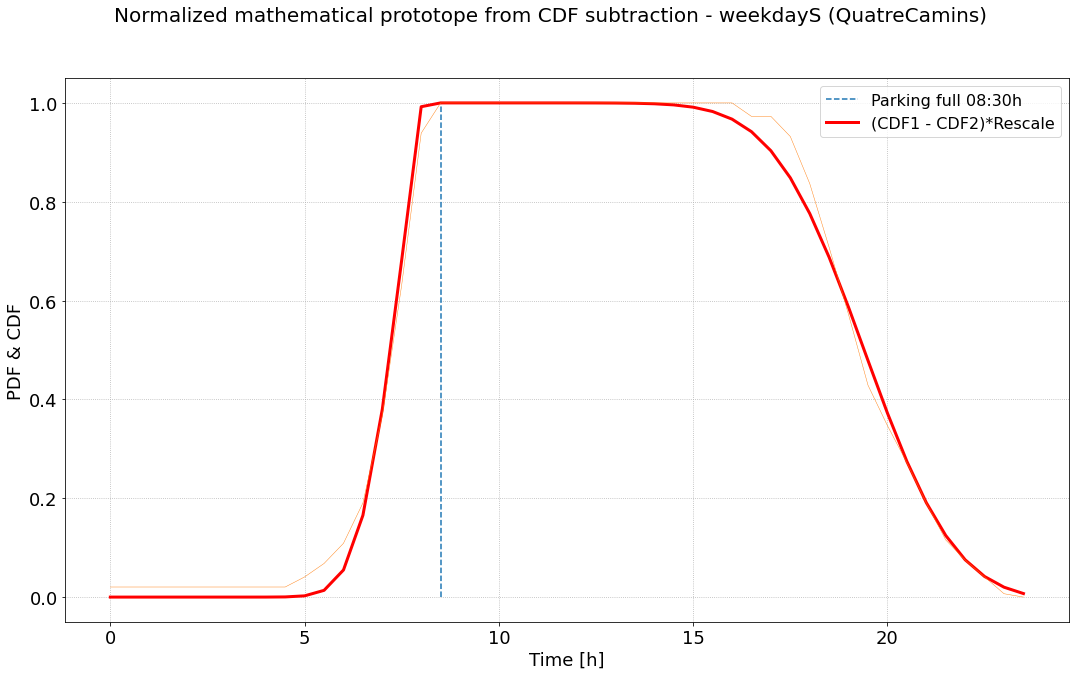

In [146]:
tn1_wd=tn(time_tn, optimal_params_weekdaytn.x[0], optimal_params_weekdaytn.x[1])
tn2_wd=tn(time_tn, optimal_params_weekdaytn.x[2], optimal_params_weekdaytn.x[3])

cdf2_wd = tn_cdf(time_tn, optimal_params_weekdaytn.x[2], optimal_params_weekdaytn.x[3])

for ii in range(0,len(training_weekdays_norm)):
    idx_th=ii+4

    cdf1_wd = tn_cdf(time_tn, optimal_params_weekdaytn.x[0], optimal_params_weekdaytn.x[1])


    dayisFull=training_weekdays_isfull[ii]
    if dayisFull:
        print(optimal_params_weekdaytn.x[idx_th])
    
        ix_parking_full= np.argmax(cdf1_wd>optimal_params_weekdaytn.x[idx_th])
        time_parking_full= 0.5*ix_parking_full
        str_parking_full= f'{int(time_parking_full):02.0f}:{int((time_parking_full-int(time_parking_full))*60):02.0f}h'

        print('Parking full        = '+str_parking_full)
        tn1_wd[cdf1_wd>optimal_params_weekdaytn.x[idx_th]] =0
        cdf1_wd[cdf1_wd>optimal_params_weekdaytn.x[idx_th]] = optimal_params_weekdaytn.x[idx_th]
        cdf1_wd = cdf1_wd/optimal_params_weekdaytn.x[idx_th]
    else:
        ix_parking_full=0
    resta_wd = np.array(cdf1_wd) - np.array(cdf2_wd)
    prototype_math_weekday = resta_wd#/sum(resta_wd)
    fig = plt.figure(figsize=(18,10))
    fig.suptitle("Normalized mathematical prototope from CDF subtraction - weekdayS ("+current_parking+")", fontsize=20)
    if dayisFull:
        plt.plot(0.5*ix_parking_full*np.array([1, 1]),[0,1],'--',label="Parking full "+str_parking_full)
    plt.grid(linestyle='dotted')
    plt.xlabel("Time [h]", fontsize=18)
    plt.ylabel("PDF & CDF", fontsize=18)
    plt.yticks(fontsize=18)
    plt.xticks(fontsize=18)
    plt.plot(time, prototype_math_weekday, linewidth=3, color='red', label="(CDF1 - CDF2)*Rescale")
    #for i in range(0,len(training_weekdays_norm)):
    plt.plot(time, training_weekdays_norm[ii], linewidth=0.45)
    plt.legend(fontsize=16);

### FRIDAYS

In [147]:
def model_fridays_tn(params): 
    loc_ar = params[0]
    scale_ar = params[1]
    loc_de = params[2]
    scale_de = params[3]
    error = 0
    # make tn for arrivals
    arrival_cdf = tn_cdf(time_tn, loc_ar, scale_ar)
    # make tn for departures
    departure_cdf = tn_cdf(time_tn, loc_de, scale_de)
    # compute CDF for arrivals
    #arrival_cdf = generate_cdf(arrival_pdf)
    # compute CDF for departures
    #departure_cdf = generate_cdf(departure_pdf)
    #res = np.array(arrival_cdf) - np.array(departure_cdf)
    res =arrival_cdf - departure_cdf
    res_n = res/sum(res)
    
    for ii in range(0,f_length):
        day = training_fridays_norm[ii]
        error += mean_squared_error(res_n, day)
    return error

def model_fridays_tn_th_max(params): 
    loc_ar = params[0]
    scale_ar = params[1]
    loc_de = params[2]
    scale_de = params[3]
    thresh=params[4]

    cdf_ar=tn_cdf(time_tn, loc_ar, scale_ar)
    cdf_de=tn_cdf(time_tn, loc_de, scale_de)

    cdf_ar[cdf_ar>thresh] = thresh
    cdf_ar = cdf_ar/thresh

    res = cdf_ar - cdf_de
    res_n = res#/sum(res)
  
    error = 0  
    for ii in range(0,f_length):
        day = training_fridays_norm[ii]
        error += mean_squared_error(res_n, day)
    return error

def model_fridays_tn_th_opt_max(params): 
    loc_ar = params[0]
    scale_ar = params[1]
    loc_de = params[2]
    scale_de = params[3]
    thresh=params[4]

    cdf_ar=tn_cdf(time_tn, loc_ar, scale_ar)
    cdf_de=tn_cdf(time_tn, loc_de, scale_de)

    cdf_ar_th=cdf_ar
    cdf_ar_th[cdf_ar>thresh] = thresh
    cdf_ar_th = cdf_ar_th/thresh

    res = cdf_ar - cdf_de
    res_n = res/sum(res)
    
    res_th = cdf_ar_th - cdf_de
    res_th_n = res_th#/sum(res_th)
  
    error = 0  
    for ii in range(0,f_length):
        day = training_fridays_norm[ii]
        dayisFull=training_fridays_isfull[ii]
        #print(dayisFull)
        if dayisFull:
            error += mean_squared_error(res_th_n, day)
        else:
            error += mean_squared_error(res_n, day)           
    return error

def model_fridays_tn_th_ind_max(params): 
    loc_ar = params[0]
    scale_ar = params[1]
    loc_de = params[2]
    scale_de = params[3]
 

    cdf_ar=tn_cdf(time_tn, loc_ar, scale_ar)
    cdf_de=tn_cdf(time_tn, loc_de, scale_de)

    #cdf_ar_th=cdf_ar
    #cdf_ar_th[cdf_ar>thresh] = thresh
    #cdf_ar_th = cdf_ar_th/thresh

    res = cdf_ar - cdf_de
    res_n = res#/sum(res)
    
    #res_th = cdf_ar_th - cdf_de
    #res_th_n = res_th/sum(res_th)
  
    error = 0  

    for ii in range(0,f_length):
        day = training_fridays_norm[ii]
        dayisFull=training_fridays_isfull[ii]
        
        if dayisFull:
            thresh=params[4+ii]
            cdf_ar_th=cdf_ar
            cdf_ar_th[cdf_ar>thresh] = thresh
            cdf_ar_th = cdf_ar_th/thresh
    
            res_th = cdf_ar_th - cdf_de
            res_th_n = res_th#/sum(res_th)
            
            error += mean_squared_error(res_th_n, day)
        else:
            error += mean_squared_error(res_n, day)           
    return error

# params order = a1, b1, a2, b2
#parameters = np.array([ 2 , 20, 5, 80, 0.02])
#optimal_params_friday = minimize(model_fridays, parameters, method='Nelder-Mead', tol=0.01)

# params order: loc_ar=.3, scale_ar=.05, loc_de=.8, scale_de=.1, rescale
#parameters_tn = np.array([.3 ,.05,.8,.1])
#optimal_params_fridaytn = minimize(model_fridays_tn, parameters_tn, method='Nelder-Mead', tol=0.01)

#parameters_tn = np.array([.2 ,.05,.7,.1])
#optimal_params_fridaytn = minimize(model_fridays_tn, parameters_tn, method='Nelder-Mead',
#                                    tol=1e-6, options={'disp': True})
parameters_tn_th = np.array([.2 ,.05,.7,.1,.8])
optimal_params_fridaytn_glo = minimize(model_fridays_tn_th_opt_max, parameters_tn_th, method='Nelder-Mead',
                                    tol=1e-6, options={'disp': True})
parameters_tn_th_ind = np.array([.2 ,.05,.7,.1] + [.8]*f_length)

optimal_params_fridaytn = minimize(model_fridays_tn_th_ind_max, parameters_tn_th_ind, method='Nelder-Mead',
                                    tol=1e-6, options={'disp': True, 'maxfev': 100000})

Optimization terminated successfully.
         Current function value: 0.234613
         Iterations: 546
         Function evaluations: 881
Optimization terminated successfully.
         Current function value: 0.021738
         Iterations: 2662
         Function evaluations: 3741


In [148]:
optimal_params_fridaytn

 final_simplex: (array([[0.32164844, 0.03851972, 0.77068313, 0.11790025, 0.68350776,
        0.82301888, 0.87377744, 0.68089001, 0.68089114, 0.68089001,
        0.69284511],
       [0.32164843, 0.03851971, 0.7706832 , 0.11790018, 0.68350732,
        0.82301856, 0.8737774 , 0.68089046, 0.68089159, 0.68089046,
        0.69284568],
       [0.32164842, 0.03851971, 0.77068317, 0.11790015, 0.68350747,
        0.82301872, 0.87377736, 0.6808905 , 0.68089163, 0.6808905 ,
        0.69284576],
       [0.32164844, 0.0385197 , 0.7706833 , 0.11790022, 0.68350703,
        0.82301821, 0.87377726, 0.68089068, 0.68089181, 0.68089068,
        0.69284601],
       [0.32164845, 0.03851972, 0.77068321, 0.1179001 , 0.68350696,
        0.82301841, 0.87377732, 0.68089087, 0.680892  , 0.68089087,
        0.69284595],
       [0.32164845, 0.03851971, 0.77068322, 0.11790025, 0.68350715,
        0.82301827, 0.87377769, 0.68089014, 0.68089127, 0.68089014,
        0.69284534],
       [0.3216484 , 0.03851971, 0.7706831

In [149]:
optimal_params_fridaytn_glo

 final_simplex: (array([[0.35836911, 0.05225777, 0.76728978, 0.1153968 , 0.37025737],
       [0.35836981, 0.05225864, 0.76728988, 0.11539661, 0.3702572 ],
       [0.35836991, 0.05225866, 0.76729002, 0.11539719, 0.37025731],
       [0.35836967, 0.05225832, 0.76729044, 0.11539701, 0.3702568 ],
       [0.35836974, 0.05225824, 0.7672902 , 0.11539689, 0.37025694],
       [0.35836986, 0.05225837, 0.76729006, 0.11539717, 0.37025761]]), array([0.23461267, 0.23461267, 0.23461267, 0.23461267, 0.23461267,
       0.23461267]))
           fun: 0.2346126705280678
       message: 'Optimization terminated successfully.'
          nfev: 881
           nit: 546
        status: 0
       success: True
             x: array([0.35836911, 0.05225777, 0.76728978, 0.1153968 , 0.37025737])

In [150]:
#optimal_params_friday.x
#friday_math_params = optimal_params_friday.x
friday_math_params = optimal_params_fridaytn.x

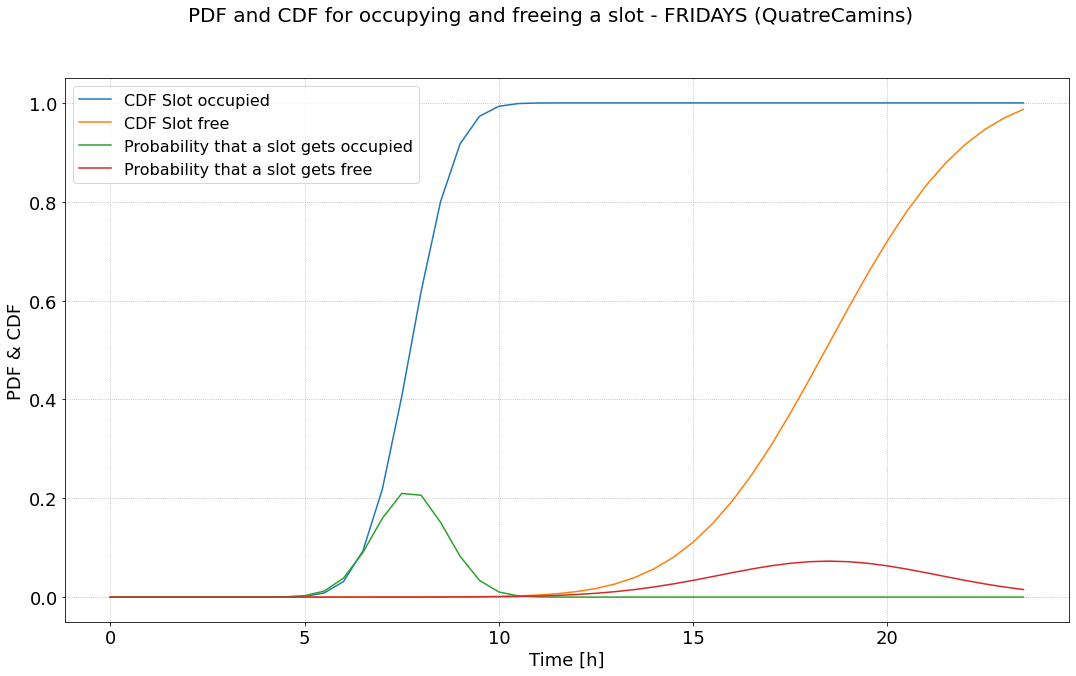

In [151]:

#tn1_fri = gam(time, optimal_params_friday.x[0], optimal_params_friday.x[1])
#tn2_fri = gam(time, optimal_params_friday.x[2], optimal_params_friday.x[3])
tn1_fri=tn(time_tn, optimal_params_fridaytn.x[0], optimal_params_fridaytn.x[1])
tn2_fri=tn(time_tn, optimal_params_fridaytn.x[2], optimal_params_fridaytn.x[3])

#cdf1_fri = generate_cdf(tn1_fri)
#cdf2_fri = generate_cdf(tn2_fri)
#cdf1_fri = generate_cdf(tn1_fri)
#cdf2_fri = generate_cdf(tn2_fri)
cdf1_fri=tn_cdf(time_tn, optimal_params_fridaytn.x[0], optimal_params_fridaytn.x[1])
cdf2_fri=tn_cdf(time_tn, optimal_params_fridaytn.x[2], optimal_params_fridaytn.x[3])

resta = np.array(cdf1_fri) - np.array(cdf2_fri)
prototype_math_friday = resta/sum(resta)
fig = plt.figure(figsize=(18,10))
fig.suptitle("PDF and CDF for occupying and freeing a slot - FRIDAYS ("+current_parking+")", fontsize=20)
plt.plot(time, cdf1_fri, label="CDF Slot occupied")
plt.plot(time, cdf2_fri, label="CDF Slot free")
plt.plot(time, tn1_fri/sum(tn1_fri), label="Probability that a slot gets occupied")
plt.plot(time, tn2_fri/sum(tn2_fri),  label="Probability that a slot gets free")
plt.grid(linestyle='dotted')
plt.xlabel("Time [h]", fontsize=18)
plt.ylabel("PDF & CDF", fontsize=18)
plt.yticks(fontsize=18)
plt.xticks(fontsize=18)
plt.legend(fontsize=16, loc="upper left")

plt.legend(fontsize=16)

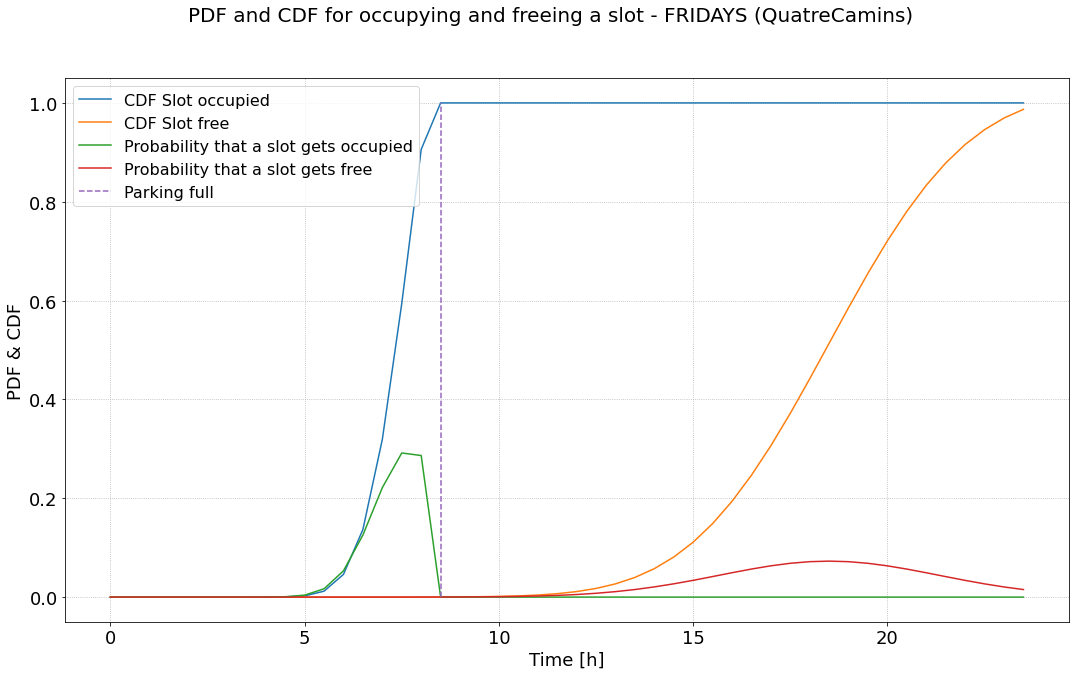

In [241]:
idx_th=4
time2 = np.linspace(0,23.5,48)
tn1_fri=tn(time_tn, optimal_params_fridaytn.x[0], optimal_params_fridaytn.x[1])
tn2_fri=tn(time_tn, optimal_params_fridaytn.x[2], optimal_params_fridaytn.x[3])

cdf1_fri = tn_cdf(time_tn, optimal_params_fridaytn.x[0], optimal_params_fridaytn.x[1])
prototype_math_arr_friday=cdf1_fri.copy()


ix_parking_full= np.argmax(cdf1_fri>optimal_params_fridaytn.x[idx_th])
tn1_fri[cdf1_fri>optimal_params_fridaytn.x[idx_th]] =0
cdf1_fri[cdf1_fri>optimal_params_fridaytn.x[idx_th]] = optimal_params_fridaytn.x[idx_th]

cdf1_fri = cdf1_fri/optimal_params_fridaytn.x[idx_th]


cdf2_fri = tn_cdf(time_tn, optimal_params_fridaytn.x[2], optimal_params_fridaytn.x[3])
prototype_math_dep_friday=cdf2_fri

#cdf1_wd = generate_cdf(tn1_wd)
#cdf2_wd = generate_cdf(tn2_wd)

resta_fri = np.array(cdf1_fri) - np.array(cdf2_fri)
prototype_math_friday = resta_fri#/sum(resta_fri)

fig = plt.figure(figsize=(18,10))
fig.suptitle("PDF and CDF for occupying and freeing a slot - FRIDAYS ("+current_parking+")", fontsize=20)
plt.plot(time2, cdf1_fri, label="CDF Slot occupied")
plt.plot(time2, cdf2_fri, label="CDF Slot free")
plt.plot(time2, tn1_fri/sum(tn1_fri), label="Probability that a slot gets occupied")
plt.plot(time2, tn2_fri/sum(tn2_fri),  label="Probability that a slot gets free")
plt.plot(0.5*ix_parking_full*np.array([1, 1]),[0,1],'--',label="Parking full")
plt.grid(linestyle='dotted')
plt.xlabel("Time [h]", fontsize=18)
plt.ylabel("PDF & CDF", fontsize=18)
plt.yticks(fontsize=18)
plt.xticks(fontsize=18)
plt.legend(fontsize=16, loc="upper left");

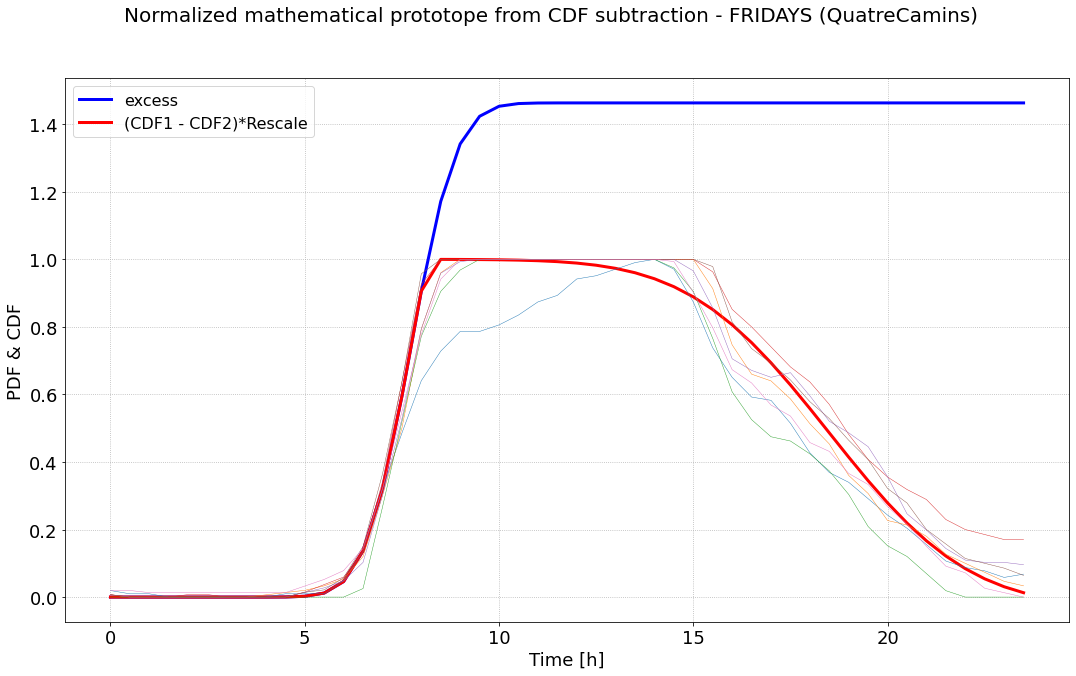

In [242]:
fig = plt.figure(figsize=(18,10))
fig.suptitle("Normalized mathematical prototope from CDF subtraction - FRIDAYS ("+current_parking+")", fontsize=20)
plt.grid(linestyle='dotted')
plt.xlabel("Time [h]", fontsize=18)
plt.ylabel("PDF & CDF", fontsize=18)
plt.yticks(fontsize=18)
plt.xticks(fontsize=18)
plt.plot(time, prototype_math_arr_friday/optimal_params_fridaytn.x[idx_th], linewidth=3, color='blue', label="excess")
plt.plot(time, prototype_math_friday, linewidth=3, color='red', label="(CDF1 - CDF2)*Rescale")
for i in range(0,len(training_fridays_norm)):
    plt.plot(time, training_fridays_norm[i], linewidth=0.45)
plt.legend(fontsize=16);

0.8230188815831685
Parking full        = 09:00h
0.8737774423555607
Parking full        = 09:00h
0.6808900124098332
Parking full        = 08:30h
0.6808911413168772
Parking full        = 08:30h
0.6808900124084052
Parking full        = 08:30h
0.6928451137995949
Parking full        = 08:30h


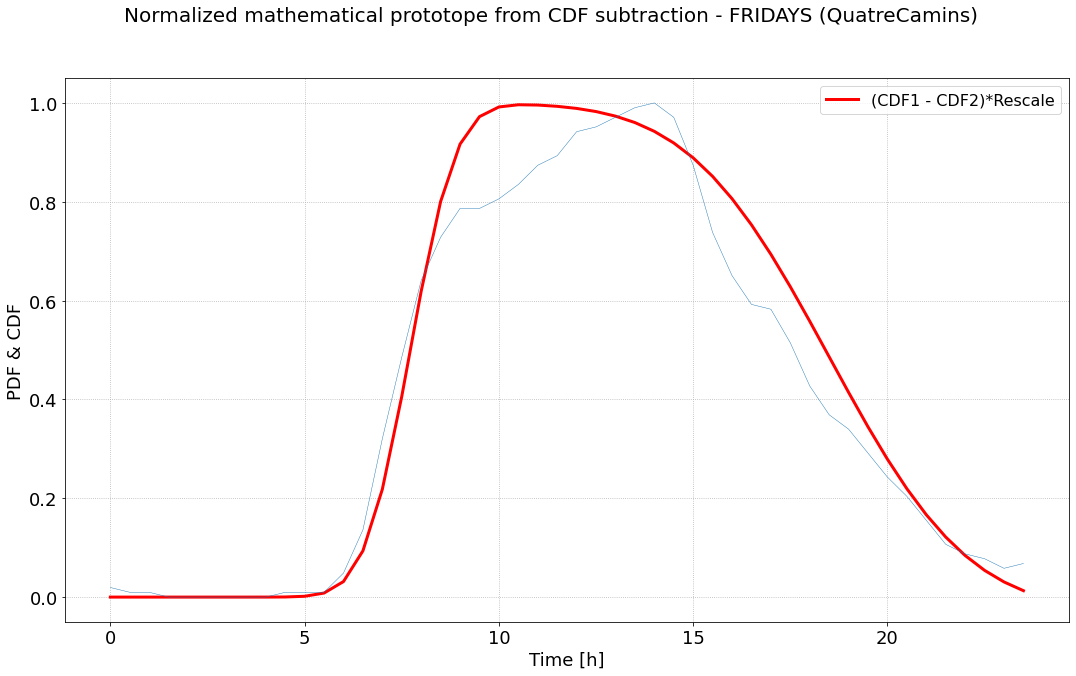

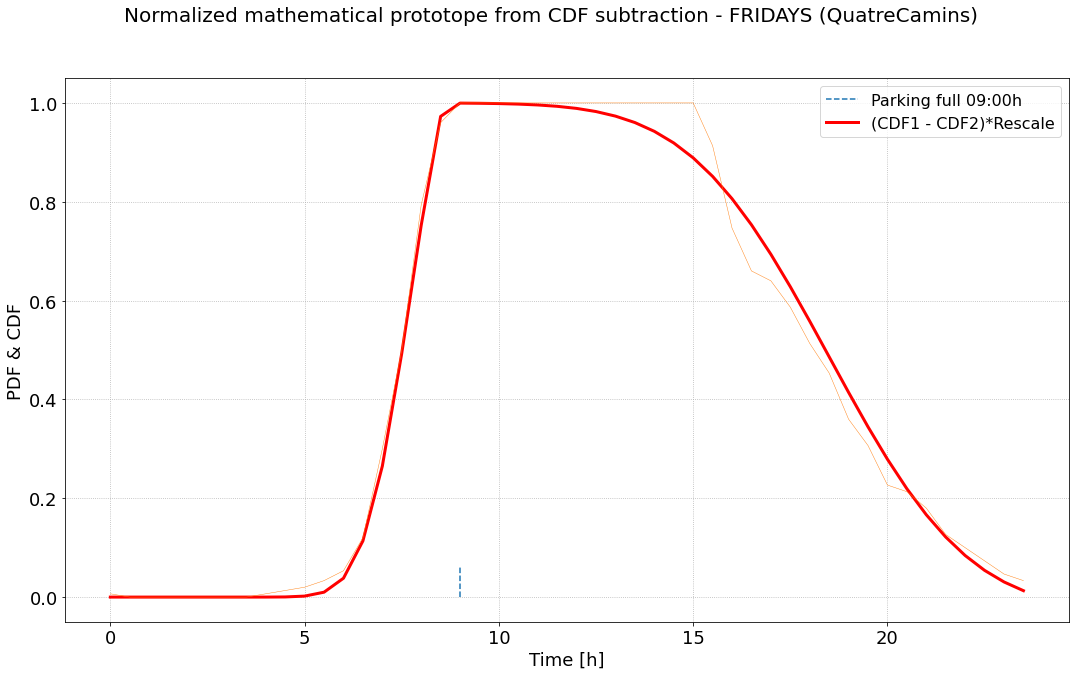

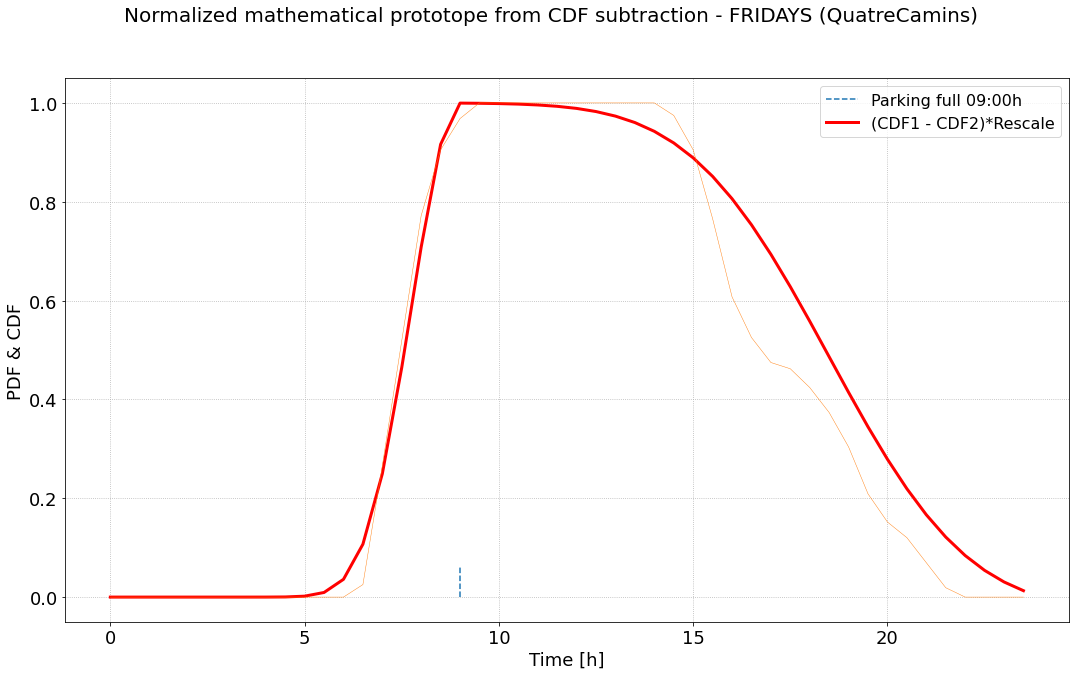

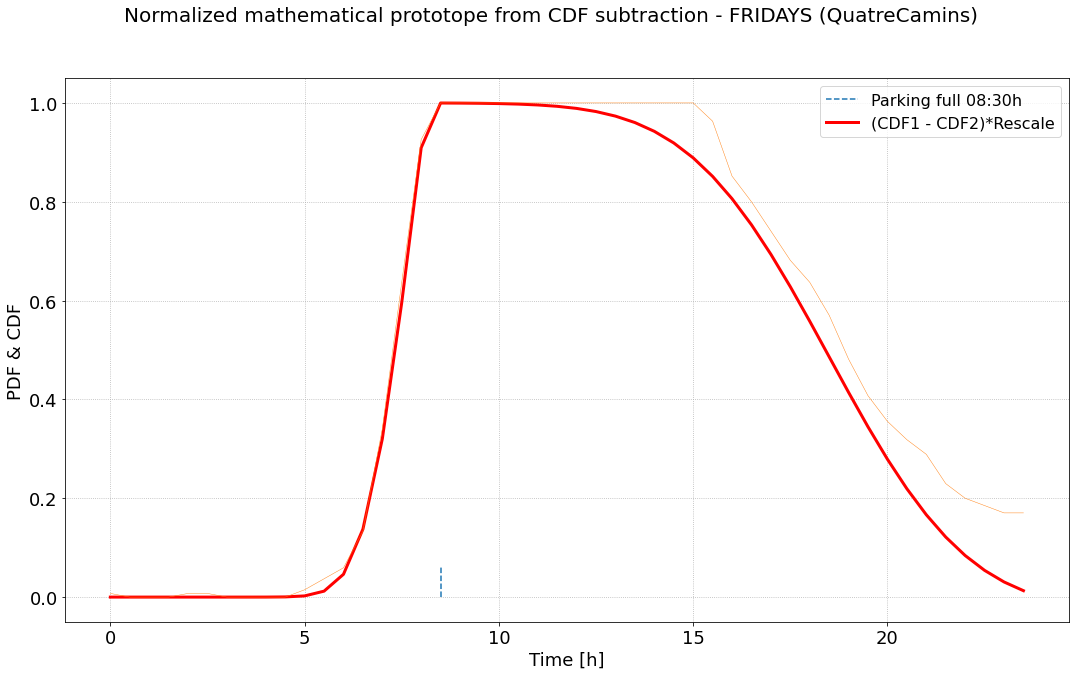

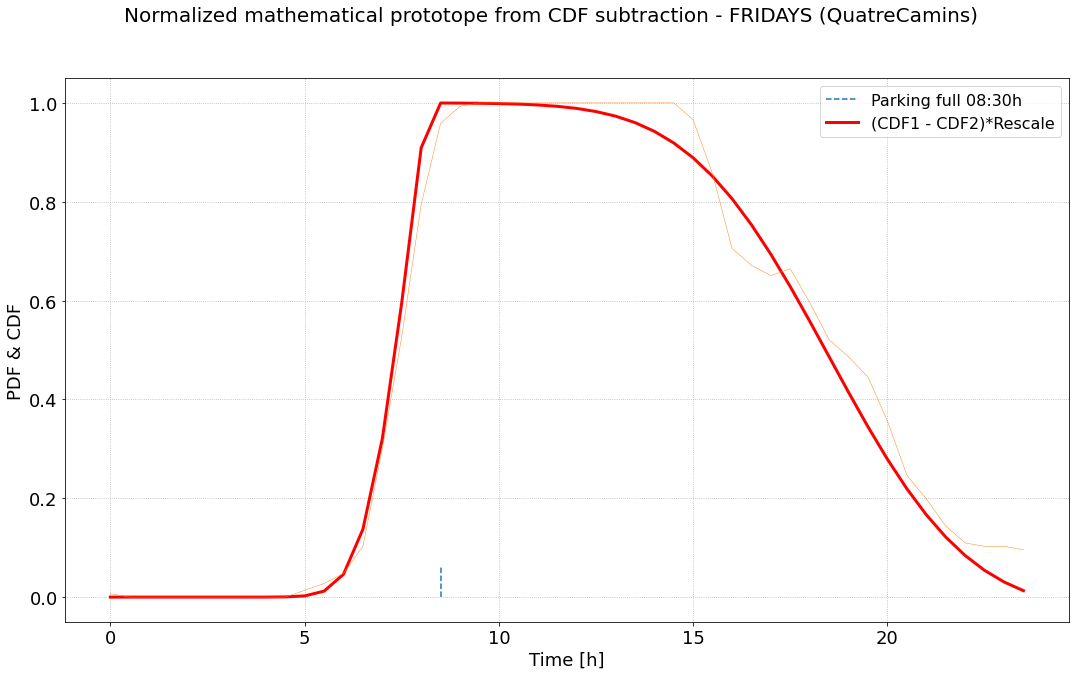

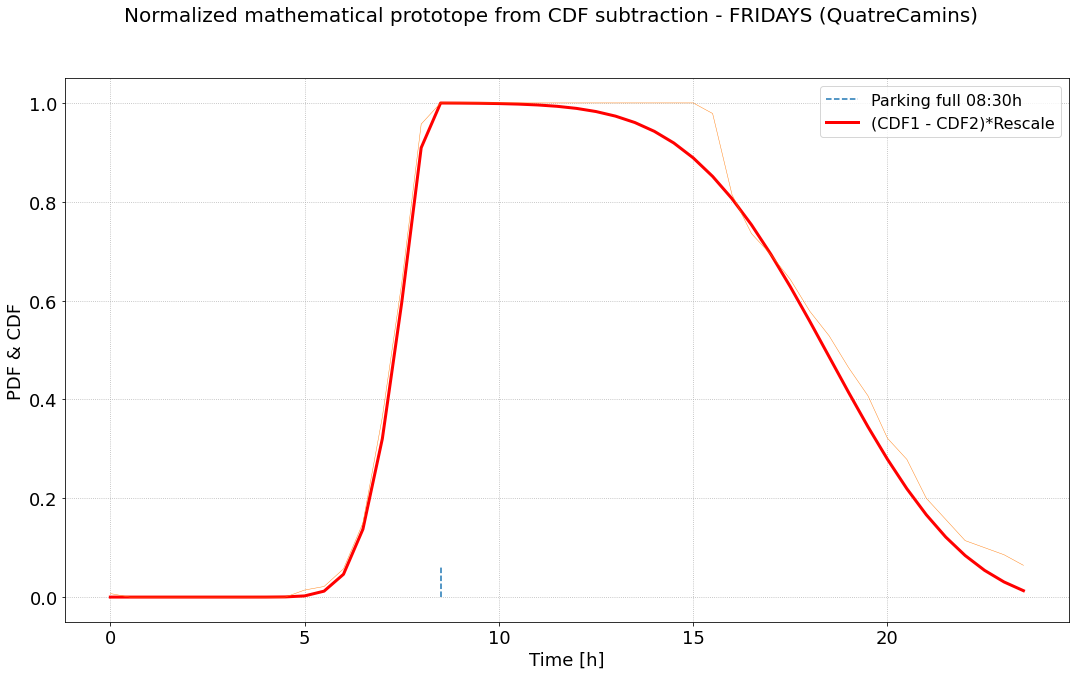

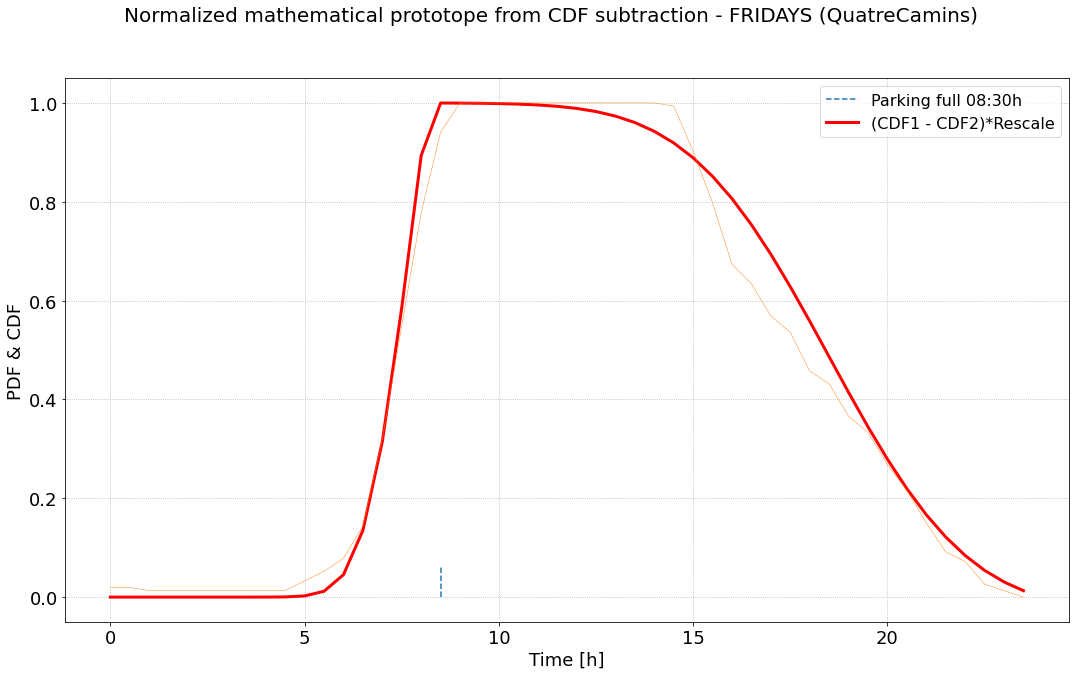

In [155]:
tn1_fri=tn(time_tn, optimal_params_fridaytn.x[0], optimal_params_fridaytn.x[1])
tn2_fri=tn(time_tn, optimal_params_fridaytn.x[2], optimal_params_fridaytn.x[3])

cdf2_fri = tn_cdf(time_tn, optimal_params_fridaytn.x[2], optimal_params_fridaytn.x[3])

for ii in range(0,len(training_fridays_norm)):
    idx_th=ii+4

    cdf1_fri = tn_cdf(time_tn, optimal_params_fridaytn.x[0], optimal_params_fridaytn.x[1])


    dayisFull=training_fridays_isfull[ii]
    if dayisFull:
        print(optimal_params_fridaytn.x[idx_th])
    
        ix_parking_full= np.argmax(cdf1_fri>optimal_params_fridaytn.x[idx_th])
        time_parking_full= 0.5*ix_parking_full
        str_parking_full= f'{int(time_parking_full):02.0f}:{int((time_parking_full-int(time_parking_full))*60):02.0f}h'

        print('Parking full        = '+str_parking_full)
        tn1_fri[cdf1_fri>optimal_params_fridaytn.x[idx_th]] =0
        cdf1_fri[cdf1_fri>optimal_params_fridaytn.x[idx_th]] = optimal_params_fridaytn.x[idx_th]
        cdf1_fri = cdf1_fri/optimal_params_fridaytn.x[idx_th]
    else:
        ix_parking_full=0
    resta_fri = np.array(cdf1_fri) - np.array(cdf2_fri)
    prototype_math_friday = resta_fri#/sum(resta_fri)
    fig = plt.figure(figsize=(18,10))
    fig.suptitle("Normalized mathematical prototope from CDF subtraction - FRIDAYS ("+current_parking+")", fontsize=20)
    if dayisFull:
        plt.plot(0.5*ix_parking_full*np.array([1, 1]),[0,.06],'--',label="Parking full "+str_parking_full)
    plt.grid(linestyle='dotted')
    plt.xlabel("Time [h]", fontsize=18)
    plt.ylabel("PDF & CDF", fontsize=18)
    plt.yticks(fontsize=18)
    plt.xticks(fontsize=18)
    plt.plot(time, prototype_math_friday, linewidth=3, color='red', label="(CDF1 - CDF2)*Rescale")
    #for i in range(0,len(training_fridays_norm)):
    plt.plot(time, training_fridays_norm[ii], linewidth=0.45)
    plt.legend(fontsize=16);

### WEEKENDS

In [197]:
training_weekends_norm  = get_days_of_protos_normalized("Weekend", df_training)
training_weekends_norm = training_weekends_norm[:-1]
t = []
for i in range(0,len(training_weekends_norm)):
    if training_weekends_norm[i].mean() != 0:
        t.append(training_weekends_norm[i])
        
training_weekends_norm = t
we_length = len(t)

def model_weekends_tn(params): 
    loc_ar = params[0]
    scale_ar = params[1]
    loc_de = params[2]
    scale_de = params[3]
    error = 0
    # make tn for arribals
    #arrival_pdf = tn(time_tn, loc_ar, scale_ar)
    # make tn for departures
    #departure_pdf = tn(time_tn, loc_de, scale_de)
    # compute CDF for arribals
    #arrival_cdf = generate_cdf(arrival_pdf)
    # compute CDF for departures
    #departure_cdf = generate_cdf(departure_pdf)
    
    arrival_cdf = tn_cdf(time_tn, loc_ar, scale_ar)
    departure_cdf = tn_cdf(time_tn, loc_de, scale_de)
    departure_cdf=departure_cdf/max(departure_cdf)
    res =arrival_cdf - departure_cdf
    
    #res = np.array(arrival_cdf) - np.array(departure_cdf)
    res_n = res#/sum(res)
    
    #print(loc_de)
    #print(scale_de)
    #print(departure_cdf)
    
    for ii in range(0,we_length):
        day = training_weekends_norm[ii]
        error += mean_squared_error(res_n, day)
        
        
        
    #plot_model_tn_pres(loc_ar, scale_ar, loc_de, scale_de) 
    #print("mua = " + str(loc_ar) + "\tstda  = " + str(scale_ar))
    #print("mus = " + str(loc_de) + "\tstds = " + str(scale_de))
    #print("Err = " + str(error))     

    return error


# params order = a1, b1, a2, b2
#parameters = np.array([ 2 , 20, 5, 80, 2])
#optimal_params_weekend = minimize(model_weekends, parameters, method='Nelder-Mead', tol=0.01)

# params order: loc_ar=.3, scale_ar=.05, loc_de=.8, scale_de=.1, rescale
parameters_tn = np.array([.3 ,.1,.8,0.5])
#optimal_params_weekendtn = minimize(model_weekends_tn, parameters_tn, method='Nelder-Mead', tol=0.01)
#optimal_params_weekendtn = minimize(model_weekends_tn, parameters_tn, method='Nelder-Mead',
#                                    tol=1e-6, options={'disp': True})
if ((current_parking == "SantBoi") or (current_parking == "Cerdanyola")): 
    optimal_params_weekendtn = minimize(model_weekends_tn, parameters_tn, method='SLSQP',
                                        bounds=((0, None), (0, None),(0, None),(0, None)),
                                        tol=1e-6, options={'disp': True})
else:
    optimal_params_weekendtn = minimize(model_weekends_tn, parameters_tn, method='Nelder-Mead',
                                        tol=1e-6, options={'disp': True, 'maxfev': 100000})  

Optimization terminated successfully.
         Current function value: 0.221032
         Iterations: 3877
         Function evaluations: 6364


In [198]:
#weekend_math_params = optimal_params_weekend.x
#optimal_params_weekend.x
weekend_math_params = optimal_params_weekendtn.x
optimal_params_weekendtn.x

array([4.29753708e-01, 1.28560374e-01, 3.31339177e+04, 7.34985379e+01])

0.9999949700653206
1.0


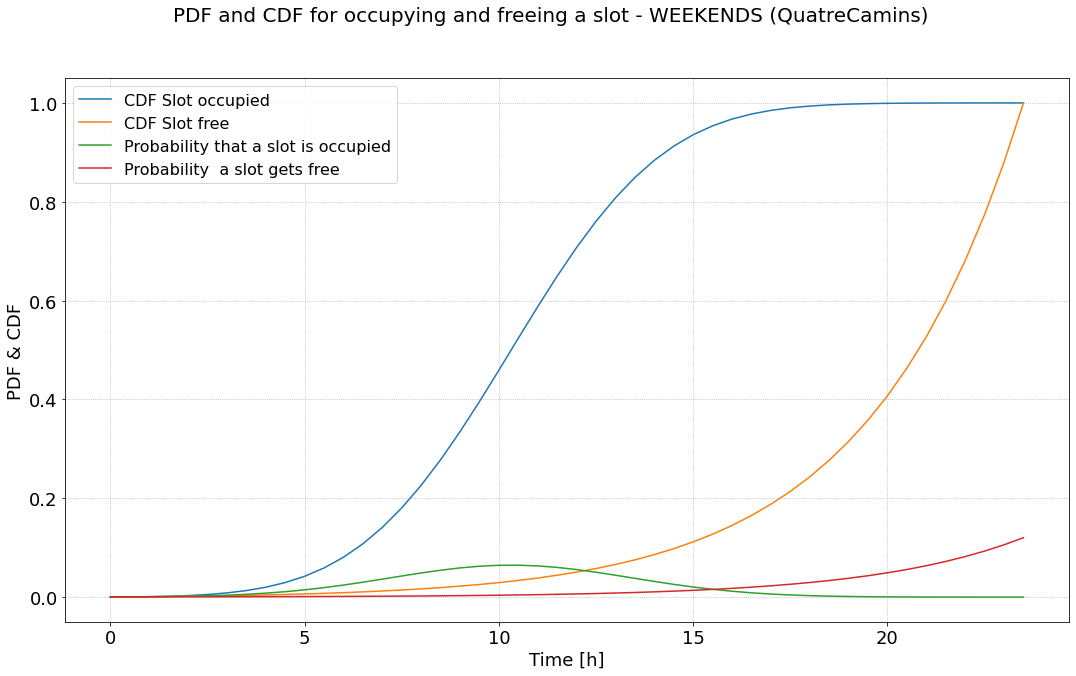

In [201]:
#tn1_we = gam(time, optimal_params_weekend.x[0], optimal_params_weekend.x[1])
#tn2_we = gam(time, optimal_params_weekend.x[2], optimal_params_weekend.x[3])
tn1_we=tn(time_tn, optimal_params_weekendtn.x[0], optimal_params_weekendtn.x[1])
tn2_we=tn(time_tn, optimal_params_weekendtn.x[2], optimal_params_weekendtn.x[3])



#cdf1_we = generate_cdf(tn1_we)
#cdf2_we = generate_cdf(tn2_we)
cdf1_we = tn_cdf(time_tn, optimal_params_weekendtn.x[0], optimal_params_weekendtn.x[1])
cdf2_we = tn_cdf(time_tn, optimal_params_weekendtn.x[2], optimal_params_weekendtn.x[3])
cdf2_we=cdf2_we/max(cdf2_we)
print(max(cdf1_we))

print(max(cdf2_we))

resta_we = np.array(cdf1_we) - np.array(cdf2_we)
prototype_math_weekend = resta_we#/sum(resta_we)
fig = plt.figure(figsize=(18,10))
fig.suptitle("PDF and CDF for occupying and freeing a slot - WEEKENDS ("+current_parking+")", fontsize=20)
plt.plot(time, cdf1_we, label="CDF Slot occupied")
plt.plot(time, cdf2_we, label="CDF Slot free")
plt.plot(time, tn1_we/sum(tn1_we), label="Probability that a slot is occupied")
plt.plot(time, tn2_we/sum(tn2_we),  label="Probability  a slot gets free")
plt.grid(linestyle='dotted')
plt.xlabel("Time [h]", fontsize=18)
plt.ylabel("PDF & CDF", fontsize=18)
plt.yticks(fontsize=18)
plt.xticks(fontsize=18)
plt.legend(fontsize=16, loc="upper left")

plt.legend(fontsize=16);

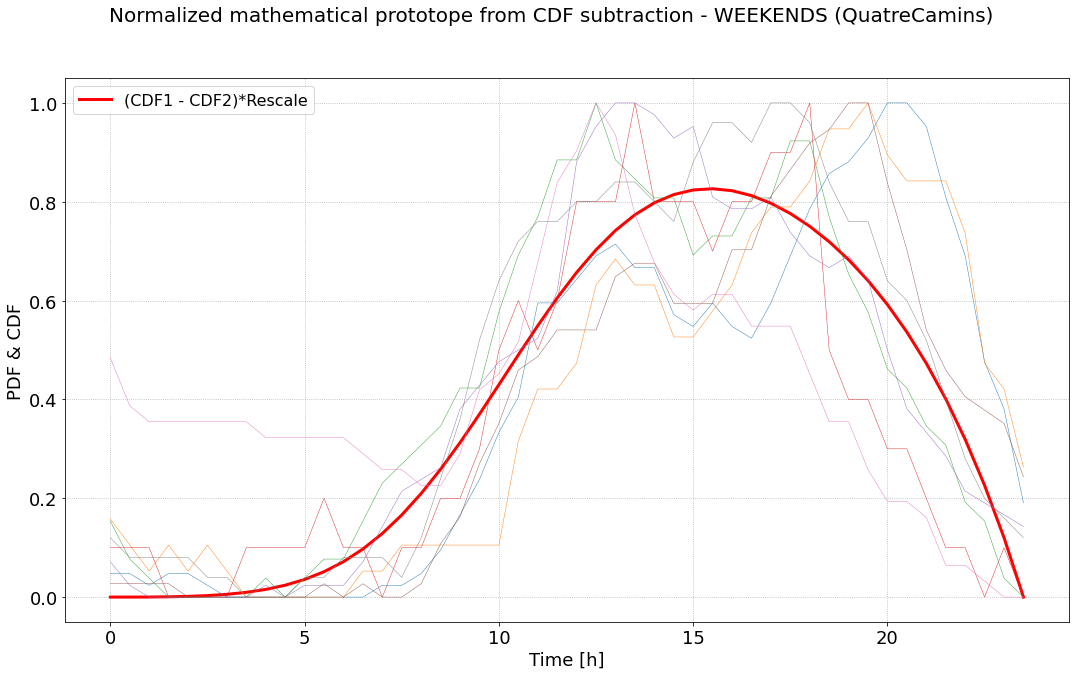

In [202]:
fig = plt.figure(figsize=(18,10))
fig.suptitle("Normalized mathematical prototope from CDF subtraction - WEEKENDS ("+current_parking+")", fontsize=20)
plt.grid(linestyle='dotted')
plt.xlabel("Time [h]", fontsize=18)
plt.ylabel("PDF & CDF", fontsize=18)
plt.yticks(fontsize=18)
plt.xticks(fontsize=18)
plt.plot(time, prototype_math_weekend, linewidth=3, color='red', label="(CDF1 - CDF2)*Rescale")
for i in range(0,len(training_weekends_norm)):
    plt.plot(time, training_weekends_norm[i], linewidth=0.45)
plt.legend(fontsize=16)

In [244]:
tn_weekday_n = prototype_math_weekday
tn_friday_n = prototype_math_friday
tn1_weekend_n = prototype_math_weekend

tn_arr_weekday_n = prototype_math_arr_weekday
tn_dep_weekday_n = prototype_math_dep_weekday
tn_arr_friday_n = prototype_math_arr_friday
tn_dep_friday_n = prototype_math_dep_friday

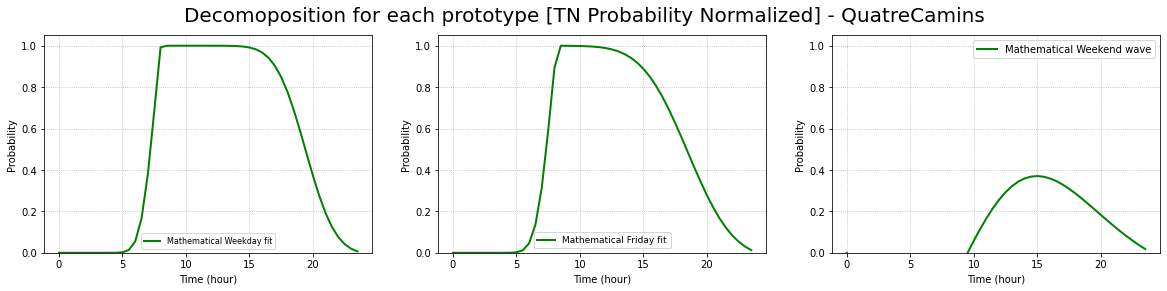

In [204]:
ymax=1.05
fig, ax = plt.subplots(1,3)
fig.set_figwidth(20)
fig.set_figheight(4)
fig.suptitle('Decomoposition for each prototype [TN Probability Normalized] - ' + current_parking, fontsize=20)

# for ii in range(len(training_weekdays_norm)):
#     ax[0].plot(time,training_weekdays_norm[ii], linewidth='0.5')
ax[0].plot(time2, tn_weekday_n, linewidth=2, color= 'green', label='Mathematical Weekday fit')
ax[0].set_ylim([0,ymax])
ax[0].grid(linestyle='dotted')
ax[0].legend(fontsize=8)
ax[0].set_xlabel('Time (hour)')
ax[0].set_ylabel('Probability')

# for ii in range(len(training_fridays_norm)):
#     ax[1].plot(time,training_fridays_norm[ii], linewidth='0.5')
ax[1].plot(time2, tn_friday_n, linewidth=2, color= 'green', label='Mathematical Friday fit')
ax[1].set_ylim([0,ymax])
ax[1].grid(linestyle='dotted')
ax[1].legend(fontsize=9)
ax[1].set_xlabel('Time (hour)')
ax[1].set_ylabel('Probability')

# for ii in range(len(training_weekends_norm)):
#      ax[2].plot(time,training_weekends_norm[ii], linewidth='0.5')
ax[2].plot(time2, tn1_weekend_n, linewidth=2, color='green', label='Mathematical Weekend wave')
ax[2].set_ylim([0,ymax])
ax[2].grid(linestyle='dotted')
ax[2].legend()
ax[2].set_xlabel('Time (hour)')
ax[2].set_ylabel('Probability');

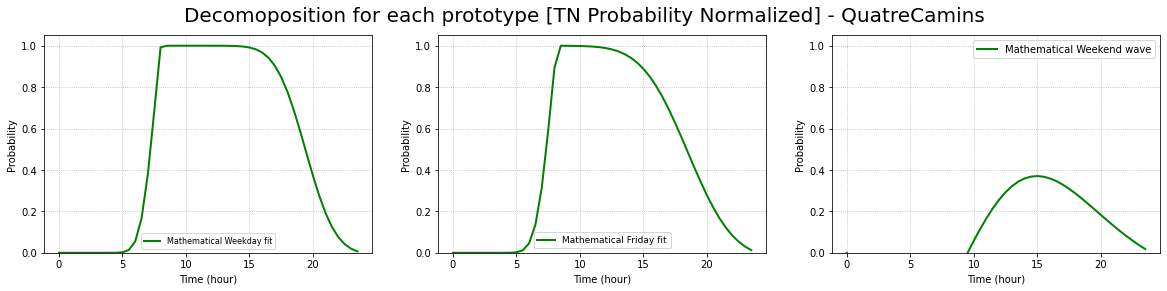

In [205]:
fig, ax = plt.subplots(1,3)
fig.set_figwidth(20)
fig.set_figheight(4)
fig.suptitle('Decomoposition for each prototype [TN Probability Normalized] - ' + current_parking, fontsize=20)

# for ii in range(len(training_weekdays_norm)):
#     ax[0].plot(time,training_weekdays_norm[ii], linewidth='0.5')
ax[0].plot(time, tn_weekday_n, linewidth=2, color= 'green', label='Mathematical Weekday fit')
ax[0].set_ylim([0,ymax])
ax[0].grid(linestyle='dotted')
ax[0].legend(fontsize=8)
ax[0].set_xlabel('Time (hour)')
ax[0].set_ylabel('Probability')

# for ii in range(len(training_fridays_norm)):
#     ax[1].plot(time,training_fridays_norm[ii], linewidth='0.5')
ax[1].plot(time, tn_friday_n, linewidth=2, color= 'green', label='Mathematical Friday fit')
ax[1].set_ylim([0,ymax])
ax[1].grid(linestyle='dotted')
ax[1].legend(fontsize=9)
ax[1].set_xlabel('Time (hour)')
ax[1].set_ylabel('Probability')

# CHECK THIS
Area = integrate.simps(tn1_weekend_n) 
tn1_weekend_n = tn1_weekend_n/Area

# for ii in range(len(training_weekends_norm)):
#      ax[2].plot(time,training_weekends_norm[ii], linewidth='0.5')
ax[2].plot(time, tn1_weekend_n, linewidth=2, color='green', label='Mathematical Weekend wave')
ax[2].set_ylim([0,ymax])
ax[2].grid(linestyle='dotted')
ax[2].legend()
ax[2].set_xlabel('Time (hour)')
ax[2].set_ylabel('Probability');

In [271]:
#**************************************WEEKDAY************************************
tn_weekday = tn_weekday_n*weekday_max + weekday_offset
tn_arr_weekday = tn_arr_weekday_n*weekday_max + weekday_offset
tn_dep_weekday = tn_dep_weekday_n*weekday_max #+ weekday_offset

#**************************************FRIDAY************************************
tn_friday = tn_friday_n*friday_max + friday_offset
tn_arr_friday = tn_arr_friday_n*friday_max + friday_offset
tn_dep_friday = tn_dep_friday_n*friday_max #+ friday_offset

#**************************************WEEKEND************************************
tn1_weekend = tn1_weekend_n*weekend_max + weekend_offset 

9.970327954190525


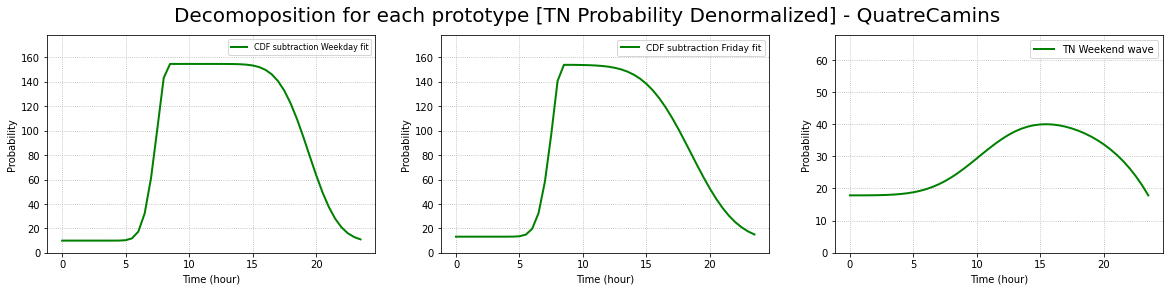

In [267]:
fig, ax = plt.subplots(1,3)
fig.set_figwidth(20)
fig.set_figheight(4)
fig.suptitle('Decomoposition for each prototype [TN Probability Denormalized] - ' + current_parking , fontsize=20)

# for ii in range(len(training_weekdays)):
#     ax[0].plot(time,training_weekdays[ii], linewidth='0.5')
ax[0].plot(time, tn_weekday, linewidth=2, color= 'green', label='CDF subtraction Weekday fit')
ax[0].set_ylim([0,axis_ylim])
ax[0].grid(linestyle='dotted')
ax[0].legend(fontsize=8)
ax[0].set_xlabel('Time (hour)')
ax[0].set_ylabel('Probability')

# for ii in range(len(training_fridays)):
#     ax[1].plot(time,training_fridays[ii], linewidth='0.5')
ax[1].plot(time, tn_friday, linewidth=2, color= 'green', label='CDF subtraction Friday fit')
ax[1].set_ylim([0,axis_ylim])
ax[1].grid(linestyle='dotted')
ax[1].legend(fontsize=9)
ax[1].set_xlabel('Time (hour)')
ax[1].set_ylabel('Probability')

# for ii in range(len(training_weekends)):
#     ax[2].plot(time,training_weekends[ii], linewidth='0.5')
ax[2].plot(time, tn1_weekend, linewidth=2, color='green', label='TN Weekend wave')
ax[2].set_ylim([0,axis_ylim_we])
ax[2].grid(linestyle='dotted')
ax[2].legend()
ax[2].set_xlabel('Time (hour)')
ax[2].set_ylabel('Probability');
# ax[2].set_yticks([0,0.005,0.01])
# ax[2].set_yticks(["0","0.05","0.1"])

### Comparing normalized mathematical fitted prototype with testing data

In [212]:
def subplot_training(fig, ax, xx, yy, proto_data, test_days, day, proto_name): 
    ax[xx,yy].plot(time, proto_data, linewidth=3, linestyle='dashed', label= proto_name + ' TN prediction')
    for i in range(0, len(test_days)): 
        ax[xx, yy].plot(time, test_days[i], linewidth=1, label='Testing ' + day )
        if i==0:
            ax[xx,yy].legend(fontsize=16)
    ax[xx,yy].grid(linestyle='dotted')
    ax[xx,yy].set_ylim(-2,axis_ylim)
    ax[xx,yy].set_xlabel('Time (hours)', fontsize=16)
    ax[xx,yy].set_ylabel('Occupancy', fontsize=16)


### Denormalization / Rescaling

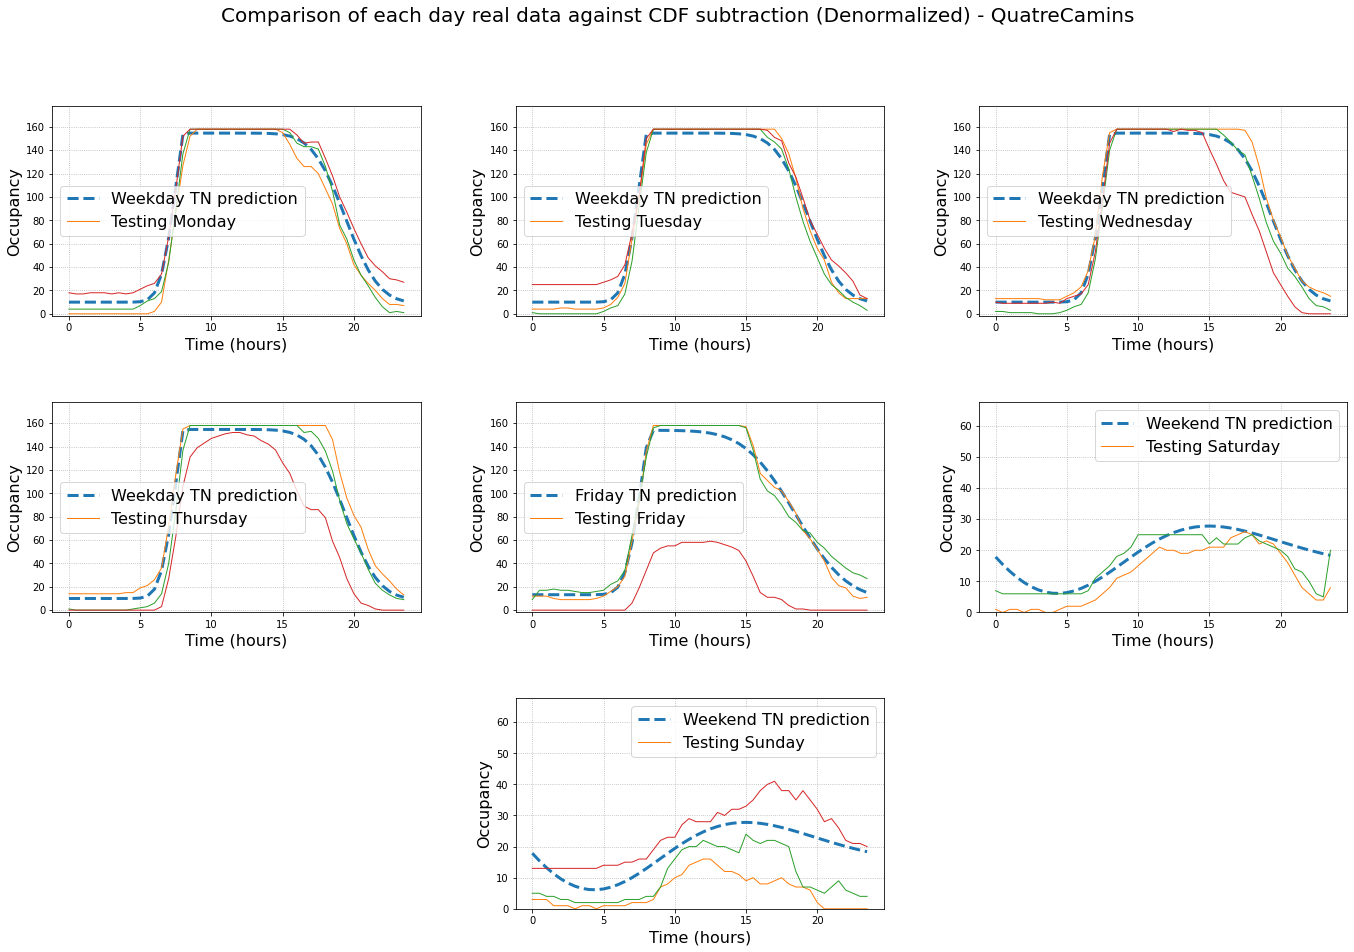

In [213]:
fig, ax = plt.subplots(3, 3)
fig.set_figwidth(20)
fig.set_figheight(14)
fig.suptitle('Comparison of each day real data against CDF subtraction (Denormalized) - ' + current_parking, fontsize=20)

tn_weekday = tn_weekday_n*weekday_max + weekday_offset
tn_friday = tn_friday_n*friday_max + friday_offset
tn1_weekend = tn1_weekend_n*weekend_max + weekend_offset 

subplot_training(fig, ax, 0, 0, tn_weekday, testing_mondays, 'Monday', 'Weekday')
subplot_training(fig, ax, 0, 1, tn_weekday, testing_tuesdays, 'Tuesday', 'Weekday')
subplot_training(fig, ax, 0, 2, tn_weekday, testing_wednesdays, 'Wednesday', 'Weekday')
subplot_training(fig, ax, 1, 0, tn_weekday, testing_thursdays, 'Thursday', 'Weekday')
subplot_training(fig, ax, 1, 1, tn_friday, testing_fridays, 'Friday', 'Friday')
subplot_training(fig, ax, 1, 2, tn1_weekend, testing_saturdays, 'Saturday', 'Weekend')
subplot_training(fig, ax, 2, 1, tn1_weekend, testing_sundays, 'Sunday', 'Weekend')

ax[2,0].set_visible(False)
ax[2,2].set_visible(False)
ax[2,1].set_ylim(0,axis_ylim_we)
ax[1,2].set_ylim(0,axis_ylim_we)
fig.tight_layout(pad=5.0)

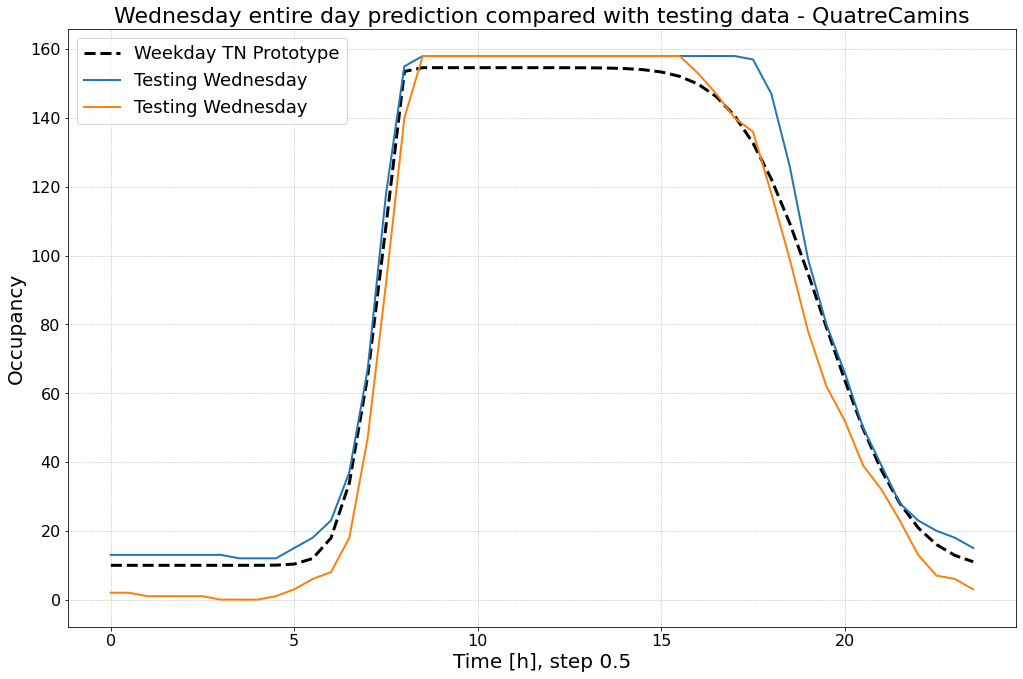

In [214]:
fig = plt.figure(figsize=(17,11))
plt.title('Wednesday entire day prediction compared with testing data - '+current_parking, fontsize = 22)
plt.plot(time, tn_weekday, linestyle='dashed', linewidth=3, color='black', label='Weekday TN Prototype')
plt.plot(time, testing_wednesdays[0], linewidth=2, label="Testing Wednesday")
plt.plot(time, testing_wednesdays[1], linewidth=2, label="Testing Wednesday")
# plt.plot(time, testing_wednesdays[3], linewidth=2, label="Testing Wednesday")
plt.grid(linestyle='dotted')
plt.legend(fontsize=18)
plt.xlabel('Time [h], step 0.5', fontsize=20)
plt.ylabel('Occupancy', fontsize=20)
plt.yticks(fontsize=16)
plt.xticks(fontsize=16);

______MEAN________
5.2520458937945484
4.79635950550909
5.404363565797474
8.216835145588256
15.03117127051862
3.2766927594059188
5.734908757648538
______STDV________
2.487039045062074
1.9528892014576003
3.9017802695036083
5.339962708855982
8.627301161523757
2.172196351129923
2.0698299257081634


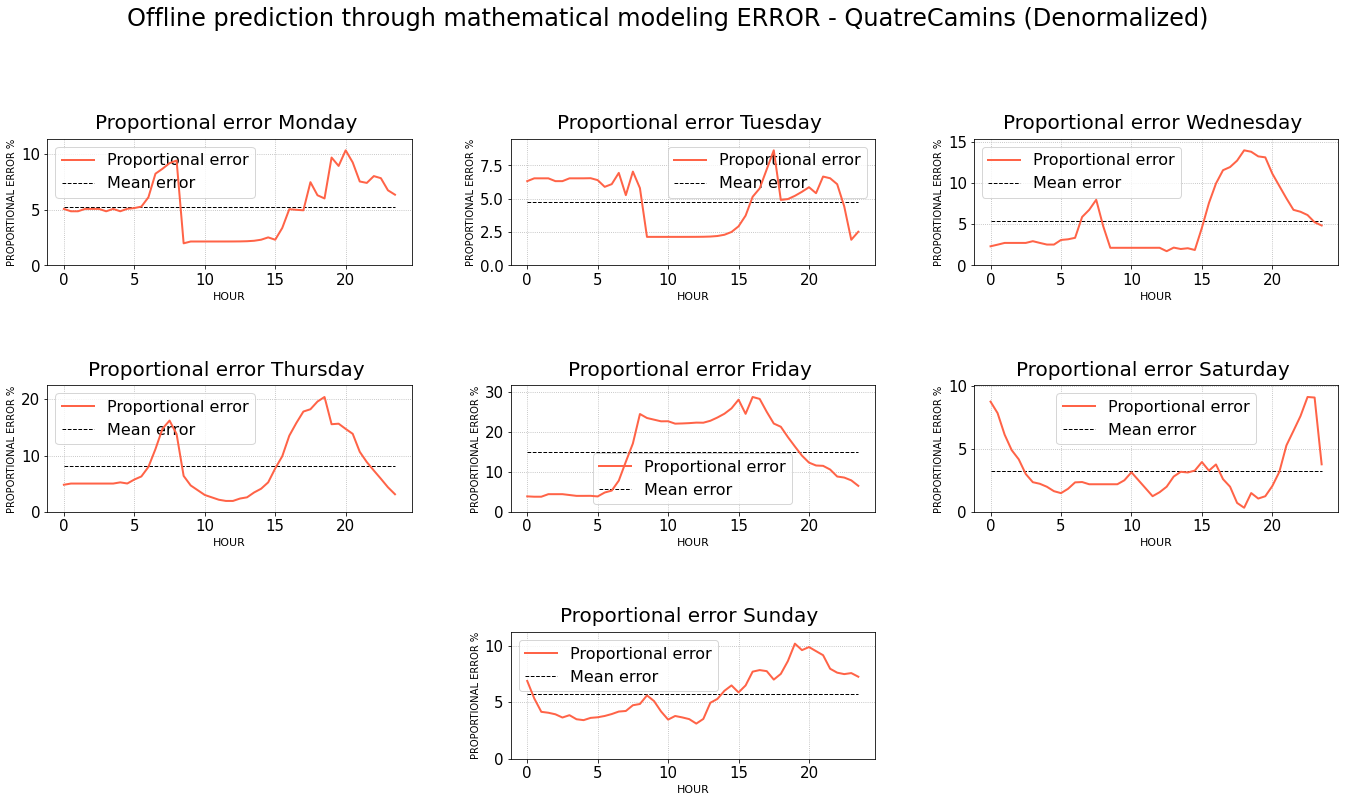

In [215]:
def compute_testing_prop_error(testing_days, proto_data):
    errors = np.zeros(48)
    n_test_days = len(testing_days)
    proto = np.array(proto_data)
    
    for i in range(0, n_test_days):
        day = np.array(testing_days[i])
        er = np.array((np.absolute(proto - day)/max_value)*100)
        errors += er
    return errors/n_test_days

error_monday_tn = compute_testing_prop_error(testing_mondays, tn_weekday)
error_tuesday_tn = compute_testing_prop_error(testing_tuesdays, tn_weekday)
error_wednesday_tn = compute_testing_prop_error(testing_wednesdays, tn_weekday)
error_thursday_tn = compute_testing_prop_error(testing_thursdays, tn_weekday)
error_friday_tn = compute_testing_prop_error(testing_fridays, tn_friday)
error_saturday_tn = compute_testing_prop_error(testing_saturdays, tn1_weekend)
error_sunday_tn = compute_testing_prop_error(testing_sundays, tn1_weekend)

def subplotCDFsubtractionErr(fig, ax, axx, axy, x, error, mean, title, day ):
    ax[axx,axy].plot(x, error, color="tomato", linewidth=2, zorder=10, label='Proportional error')
    ax[axx,axy].plot(x, mean, linewidth=1, linestyle='--' ,color='black', label='Mean error')
    ax[axx,axy].grid(linestyle='dotted')
    ax[axx,axy].set_ylabel('Proportional error %', fontsize=20)
    ax[axx,axy].set_xlabel('Hours', fontsize=20)
    ax[axx,axy].set_title(title , fontsize=20, pad=10)
    ax[axx,axy].set_ylim((0,1.1*max(error)))
    ax[axx,axy].legend(fontsize=16)
    ax[axx,axy].tick_params( labelsize=15)

    
fig, ax = plt.subplots(3, 3)
fig.set_figwidth(20)
fig.set_figheight(12)
fig.suptitle('Offline prediction through mathematical modeling ERROR - '+current_parking+' (Denormalized)', fontsize=24)
time = np.linspace(0,23.5,48)

mean_Monday =  [np.mean(error_monday_tn)]*len(time)
subplotCDFsubtractionErr(fig, ax, 0, 0, time, error_monday_tn, mean_Monday, 
                 'Proportional error Monday ', 'Monday')

mean_Tuesday =  [np.mean(error_tuesday_tn)]*len(time)
subplotCDFsubtractionErr(fig, ax, 0, 1, time, error_tuesday_tn, mean_Tuesday, 
                 'Proportional error Tuesday ', 'Tuesday')

mean_Wednesday =  [np.mean(error_wednesday_tn)]*len(time)
subplotCDFsubtractionErr(fig, ax, 0, 2, time, error_wednesday_tn, mean_Wednesday, 
                 'Proportional error Wednesday ', 'Wednesday')

mean_Thursday =  [np.mean(error_thursday_tn)]*len(time)
subplotCDFsubtractionErr(fig, ax, 1, 0, time, error_thursday_tn, mean_Thursday, 
                 'Proportional error Thursday ', 'Thursday')

mean_Friday =  [np.mean(error_friday_tn)]*len(time)
subplotCDFsubtractionErr(fig, ax, 1, 1, time, error_friday_tn, mean_Friday, 
                 'Proportional error Friday ', 'Friday')

mean_Saturday =  [np.mean(error_saturday_tn)]*len(time)
subplotCDFsubtractionErr(fig, ax, 1, 2, time, error_saturday_tn, mean_Saturday, 
                 'Proportional error Saturday ', 'Saturday')

mean_Sunday =  [np.mean(error_sunday_tn)]*len(time)
subplotCDFsubtractionErr(fig, ax, 2, 1, time, error_sunday_tn, mean_Sunday, 
                 'Proportional error Sunday ', 'Sunday')

ax[2,0].set_visible(False)
ax[2,2].set_visible(False)
fig.tight_layout(pad=5.0)
for ax in ax.flat:
    ax.set_ylabel('PROPORTIONAL ERROR %', fontsize=10)
    ax.set_xlabel('HOUR', fontsize=11)


print('______MEAN________')    

print(mean_Monday[0])
print(mean_Tuesday[0])
print(mean_Wednesday[0])
print(mean_Thursday[0])
print(mean_Friday[0])
print(mean_Saturday[0])
print(mean_Sunday[0])

print('______STDV________')

print(np.std(error_monday_tn))
print(np.std(error_tuesday_tn))
print(np.std(error_wednesday_tn))
print(np.std(error_thursday_tn))
print(np.std(error_friday_tn))
print(np.std(error_saturday_tn))
print(np.std(error_sunday_tn))


### MATHEMATICAL PROTOTYE: Real time prediction by SCALING

In [216]:
# Plotting methods to reduce cell dimension

def real_timing_predition(fig, ax, axx, day, tn_proto, real_day, scaled_proto, Prototype, limit_hour, t_date):
    fig.suptitle('Real time prediction Scaling mathematical and mean proto for Testing '
                 + day + ' ' +t_date + ' ('+ current_parking+')', fontsize='18')
    ax[axx].plot(time, real_day.values, linestyle='dashdot', linewidth=2, label='Real ' + day)
    ax[axx].plot(time, tn_proto,'--',color='grey', label='TN prototype (not scaled)')
    ax[axx].plot(time, scaled_proto, color='green', linewidth=2, label='TN proto (scaled)')
    ax[axx].plot(time, Prototype, color='orange', linewidth=2, label='Stat. scaled proto')
    ax[axx].axvline(x=limit_hour, linestyle='--', color='grey', linewidth=2, label='Moment of prediction')
    ax[axx].axvspan(0, limit_hour, facecolor='grey', alpha=0.2, label='Known Activity')
    ax[axx].grid(linestyle='dotted', linewidth='0.5', color='grey')
    ax[axx].legend(fontsize=9)
    ax[axx].set_ylim([0,1.1*max([max(real_day.values),max(tn_proto),max(scaled_proto),max(Prototype)])])
    ax[axx].set_xlabel('Hour', fontsize=14)
    ax[axx].set_ylabel('Occupancy', fontsize=14)

def errors_plotting(fig, ax, axx, scaled_proto, Prototype, real_day, day, limit_hour):
    #Computing Errors
    limit_hour = limit_hour*2
    tn_scaled_error = (np.absolute((np.array(scaled_proto) - np.array(real_day.values)))/max_value)*100
    mean_scaled_error = (np.absolute((np.array(Prototype) - np.array(real_day.values)))/max_value)*100

    tn_s_error_mean = [np.mean(tn_scaled_error[limit_hour:])]*len(tn_scaled_error)
    mean_s_error_mean = [np.mean(mean_scaled_error[limit_hour:])]*len(mean_scaled_error)

    #Second plot
#     time = time[limit_hour:]
    ax[axx].plot(time[limit_hour:], tn_scaled_error[limit_hour:], color='tomato', label='TN scaling error')
    ax[axx].plot(time[limit_hour:],tn_s_error_mean[limit_hour:], '--',color='tomato', label='TN Mean prop. error')
    ax[axx].plot(time[limit_hour:],mean_scaled_error[limit_hour:], color='blueviolet', label='Proto scaling error')
    ax[axx].plot(time[limit_hour:],mean_s_error_mean[limit_hour:], '--',color='blueviolet', label='Proto. Mean prop. error')
    ax[axx].grid(linestyle='dotted', linewidth='0.5', color='grey')
    ax[axx].axvline(x=limit_hour/2, linestyle='--', color='grey', linewidth=2, label='Moment of prediction')
    ax[axx].axvspan(0, limit_hour/2, facecolor='grey', alpha=0.2, label='Known Activity', zorder=4)
    ax[axx].legend(fontsize=12)
    ax[axx].set_ylim([0,1.1*max(max(tn_scaled_error[limit_hour:]),max(mean_scaled_error[limit_hour:]))])
    ax[axx].set_xlabel('Hour', fontsize=14)
    ax[axx].set_ylabel('Proportional error (%)', fontsize=14)

    print('Real ' + day + ' scaled prtotype error: ', round(100*mean_s_error_mean[0])/100, '%')
    print('Real ' + day + ' scaled prtotype STDV: ', np.std(mean_scaled_error[limit_hour:]))

    print('Real ' + day + ' scaled TN error: ', round(100*tn_s_error_mean[0])/100, '%')
    print('Real ' + day + ' scaled TN STDV: ', np.std(tn_scaled_error[limit_hour:]))
    print('_____________________________________________________________')

def get_scaling_factor(limit_hour, test_day, proto):
    if limit_hour < 6:
        return 1
    index = limit_hour*2
    current_real_data = test_day.values[index]
    proto_value = proto[index]
    scaling = current_real_data/proto_value
    return scaling

In [280]:
def plot_prototype():
    for i in range(0,len(tn_proto)):
        if tn_proto[i] < 0:
            tn_proto[i] = 0
    cont=0
    for i in range(0,len(t_days)):
        t_date=t_dates[cont]
        print(t_date)
        tn_scaling = get_scaling_factor(limit_hour, t_days[i], tn_proto)
        tn_arr_scaling = get_scaling_factor(limit_hour, t_days[i], tn_arr_proto)
        stat_scaling = get_scaling_factor(limit_hour, t_days[i], hist_weekday_proto.values)

        scaled_tn_proto = tn_proto * tn_scaling
        scaled_tn_arr_proto = tn_arr_proto * tn_arr_scaling
        scaled_tn_dep_proto = tn_dep_proto * tn_arr_scaling

        if max(scaled_tn_arr_proto)>max_value:
            cars_could_not_park=max(scaled_tn_arr_proto[scaled_tn_arr_proto >max_value])-max_value
            print(round(cars_could_not_park), "cars could not park")
            scaled_tn_arr_proto[scaled_tn_arr_proto >max_value]=max_value
            scaled_tn_dep_proto=scaled_tn_dep_proto/max(scaled_tn_dep_proto)*(max_value-weekday_offset)
        scaled_tn_proto2=scaled_tn_arr_proto-scaled_tn_dep_proto

        scaled_stat_proto = hist_weekday_proto.values * stat_scaling
        fig, ax = plt.subplots(1, 2)
        fig.set_figwidth(20)
        fig.set_figheight(5)
        axx=0;
        real_timing_predition(fig, ax, axx, day, tn_proto, t_days[i], scaled_tn_proto2, scaled_stat_proto, limit_hour, t_date)
        axx=1;
        errors_plotting(fig, ax, axx, scaled_tn_proto2, scaled_stat_proto, t_days[i], day, limit_hour)
        cont=cont+1

#### MONDAY

2020-02-24
17 cars could not park
Real Monday scaled prtotype error:  6.87 %
Real Monday scaled prtotype STDV:  2.4181069487790454
Real Monday scaled TN error:  4.93 %
Real Monday scaled TN STDV:  5.405355677838309
_____________________________________________________________
2020-03-02
31 cars could not park
Real Monday scaled prtotype error:  4.31 %
Real Monday scaled prtotype STDV:  3.9940528572669463
Real Monday scaled TN error:  3.48 %
Real Monday scaled TN STDV:  4.243151597113164
_____________________________________________________________
2020-03-09
52 cars could not park
Real Monday scaled prtotype error:  6.18 %
Real Monday scaled prtotype STDV:  2.535821580107943
Real Monday scaled TN error:  3.1 %
Real Monday scaled TN STDV:  3.711990873100895
_____________________________________________________________


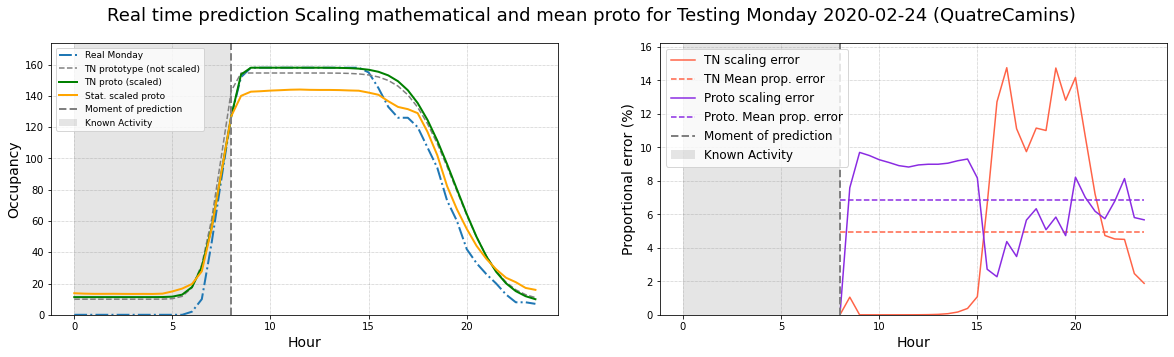

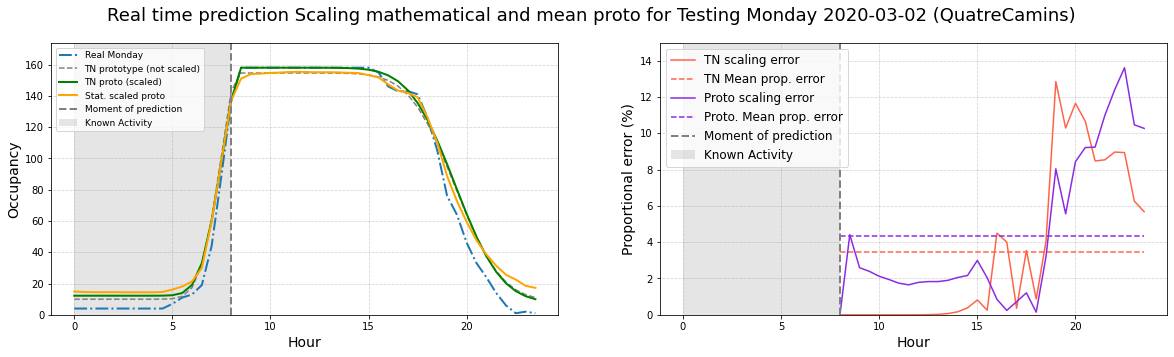

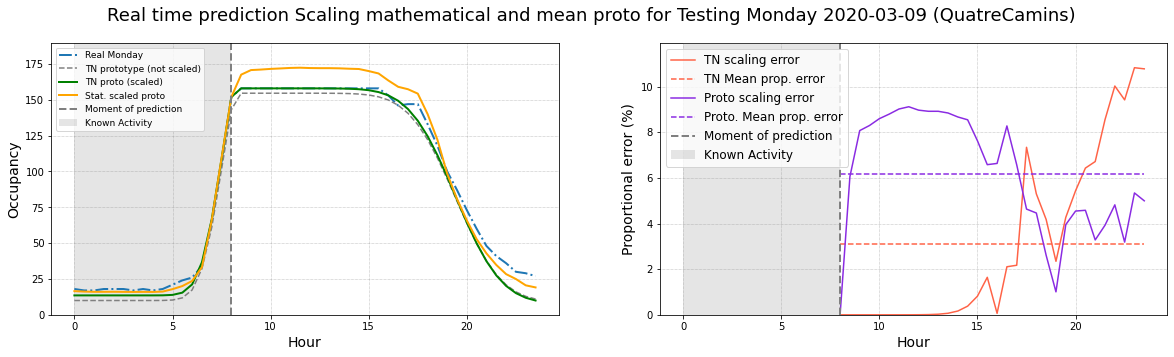

In [279]:
statistic_proto = hist_weekday_proto
tn_proto = tn_weekday
tn_arr_proto = tn_arr_weekday
tn_dep_proto = tn_dep_weekday
t_days = testing_mondays
t_dates=testing_mondays_dates
limit_hour = 8
day = 'Monday'
# Negative values to 0
for i in range(0,len(tn_proto)):
    if tn_proto[i] < 0:
        tn_proto[i] = 0
cont=0
for i in range(0,len(t_days)):
    t_date=t_dates[cont]
    print(t_date)
    tn_scaling = get_scaling_factor(limit_hour, t_days[i], tn_proto)
    tn_arr_scaling = get_scaling_factor(limit_hour, t_days[i], tn_arr_proto)
    stat_scaling = get_scaling_factor(limit_hour, t_days[i], hist_weekday_proto.values)
    
    scaled_tn_proto = tn_proto * tn_scaling
    scaled_tn_arr_proto = tn_arr_proto * tn_arr_scaling
    scaled_tn_dep_proto = tn_dep_proto * tn_arr_scaling
    
    if max(scaled_tn_arr_proto)>max_value:
        cars_could_not_park=max(scaled_tn_arr_proto[scaled_tn_arr_proto >max_value])-max_value
        print(round(cars_could_not_park), "cars could not park")
        scaled_tn_arr_proto[scaled_tn_arr_proto >max_value]=max_value
        scaled_tn_dep_proto=scaled_tn_dep_proto/max(scaled_tn_dep_proto)*(max_value-weekday_offset)
    scaled_tn_proto2=scaled_tn_arr_proto-scaled_tn_dep_proto
    
    scaled_stat_proto = hist_weekday_proto.values * stat_scaling
    fig, ax = plt.subplots(1, 2)
    fig.set_figwidth(20)
    fig.set_figheight(5)
    axx=0;
    real_timing_predition(fig, ax, axx, day, tn_proto, t_days[i], scaled_tn_proto2, scaled_stat_proto, limit_hour, t_date)
    axx=1;
    errors_plotting(fig, ax, axx, scaled_tn_proto2, scaled_stat_proto, t_days[i], day, limit_hour)
    cont=cont+1

#### TUESDAY

2020-02-25
42 cars could not park
Real Tuesday scaled prtotype error:  3.74 %
Real Tuesday scaled prtotype STDV:  2.180650962057507
Real Tuesday scaled TN error:  2.48 %
Real Tuesday scaled TN STDV:  2.929775834848242
_____________________________________________________________
2020-03-03
33 cars could not park
Real Tuesday scaled prtotype error:  3.9 %
Real Tuesday scaled prtotype STDV:  3.0086331457784254
Real Tuesday scaled TN error:  2.84 %
Real Tuesday scaled TN STDV:  3.652448434901149
_____________________________________________________________
2020-03-10
49 cars could not park
Real Tuesday scaled prtotype error:  4.52 %
Real Tuesday scaled prtotype STDV:  2.5740345299742518
Real Tuesday scaled TN error:  2.32 %
Real Tuesday scaled TN STDV:  2.8616809236705327
_____________________________________________________________


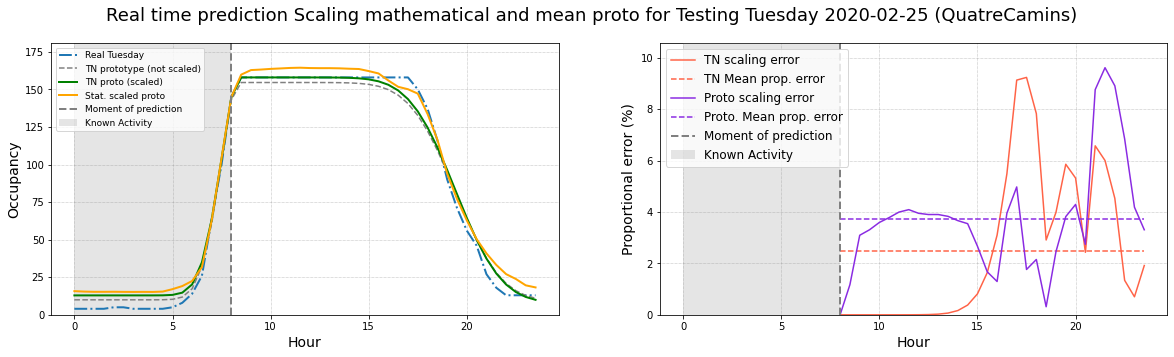

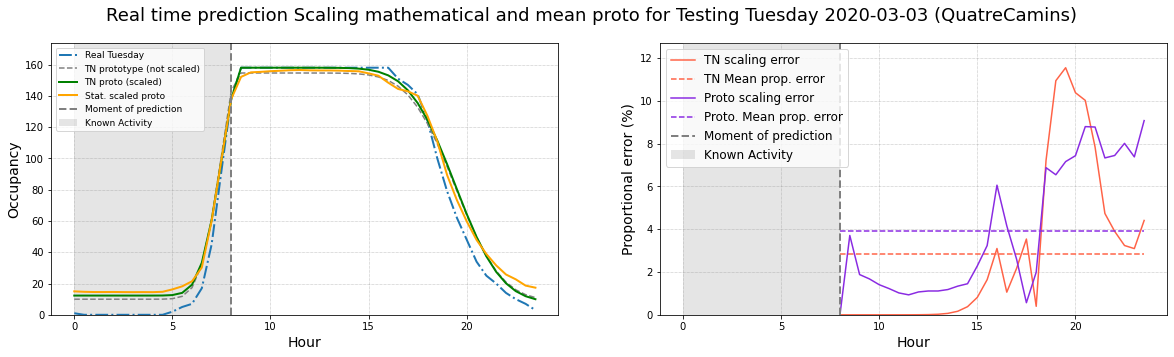

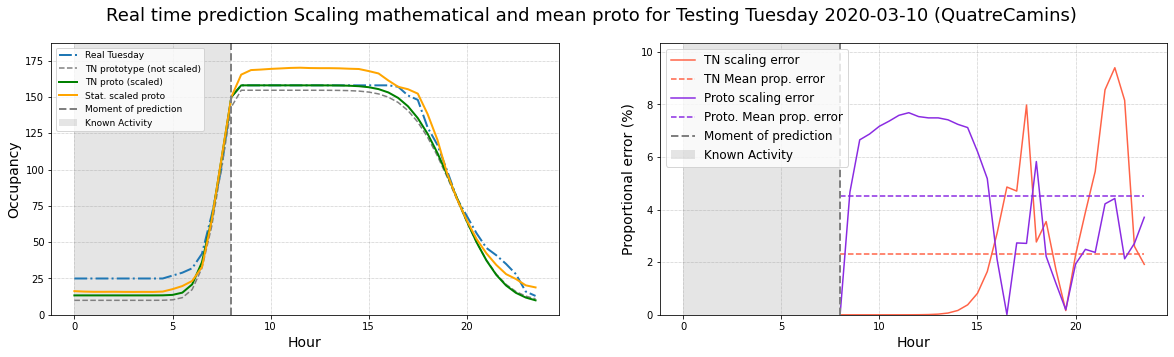

In [283]:
statistic_proto = hist_weekday_proto
tn_proto = tn_weekday
tn_arr_proto = tn_arr_weekday
tn_dep_proto = tn_dep_weekday
t_days = testing_tuesdays
t_dates= testing_tuesdays_dates
limit_hour = 8
day = 'Tuesday'
# Negative values to 0

plot_prototype()

### WEDNESDAY

2020-02-26
56 cars could not park
Real Wednesday scaled prtotype error:  6.12 %
Real Wednesday scaled prtotype STDV:  4.279196460207794
Real Wednesday scaled TN error:  2.32 %
Real Wednesday scaled TN STDV:  3.8346978955622038
_____________________________________________________________
2020-03-04
35 cars could not park
Real Wednesday scaled prtotype error:  3.32 %
Real Wednesday scaled prtotype STDV:  3.4345168150361625
Real Wednesday scaled TN error:  2.54 %
Real Wednesday scaled TN STDV:  3.355426320476814
_____________________________________________________________
2020-03-11
44 cars could not park
Real Wednesday scaled prtotype error:  14.84 %
Real Wednesday scaled prtotype STDV:  10.579565826085027
Real Wednesday scaled TN error:  11.24 %
Real Wednesday scaled TN STDV:  11.149810844240731
_____________________________________________________________


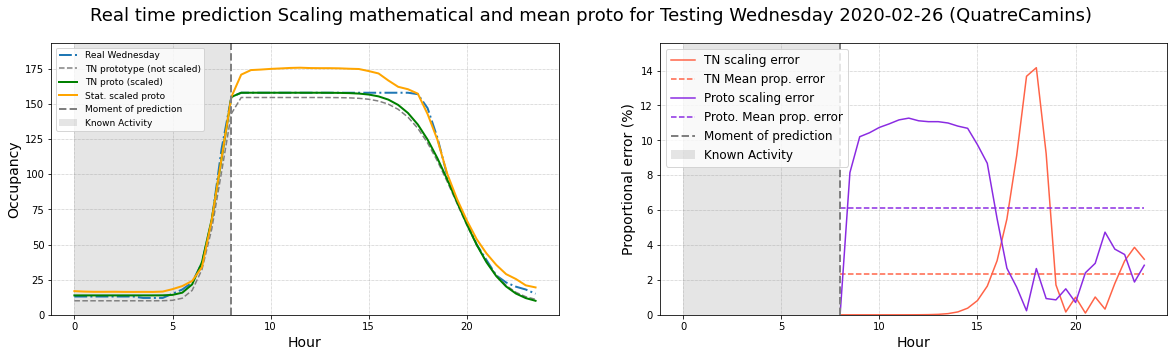

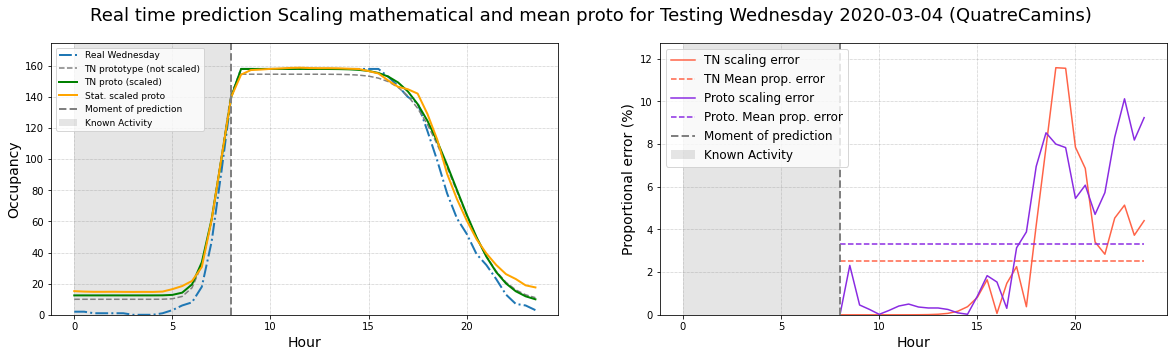

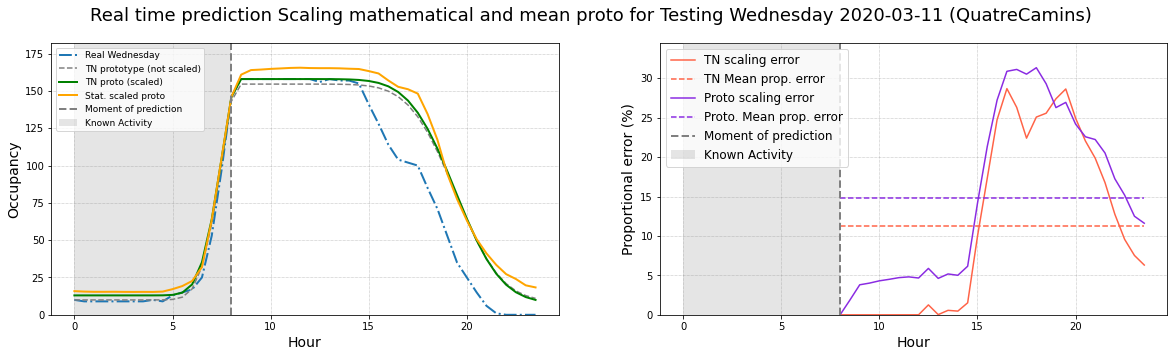

In [285]:
statistic_proto = hist_weekday_proto
tn_proto = tn_weekday
t_days = testing_wednesdays
t_dates= testing_wednesdays_dates
limit_hour = 8
day = 'Wednesday'

tn_arr_proto = tn_arr_weekday
tn_dep_proto = tn_dep_weekday
plot_prototype()

### THURSDAY

2020-02-27
56 cars could not park
Real Thursday scaled prtotype error:  7.64 %
Real Thursday scaled prtotype STDV:  4.167969818721817
Real Thursday scaled TN error:  5.02 %
Real Thursday scaled TN STDV:  6.2840521702364605
_____________________________________________________________
2020-03-05
31 cars could not park
Real Thursday scaled prtotype error:  3.35 %
Real Thursday scaled prtotype STDV:  1.9616951841290655
Real Thursday scaled TN error:  1.59 %
Real Thursday scaled TN STDV:  2.0948875894460746
_____________________________________________________________
2020-03-12
Real Thursday scaled prtotype error:  13.73 %
Real Thursday scaled prtotype STDV:  5.322172687926732
Real Thursday scaled TN error:  12.75 %
Real Thursday scaled TN STDV:  11.30570061395234
_____________________________________________________________


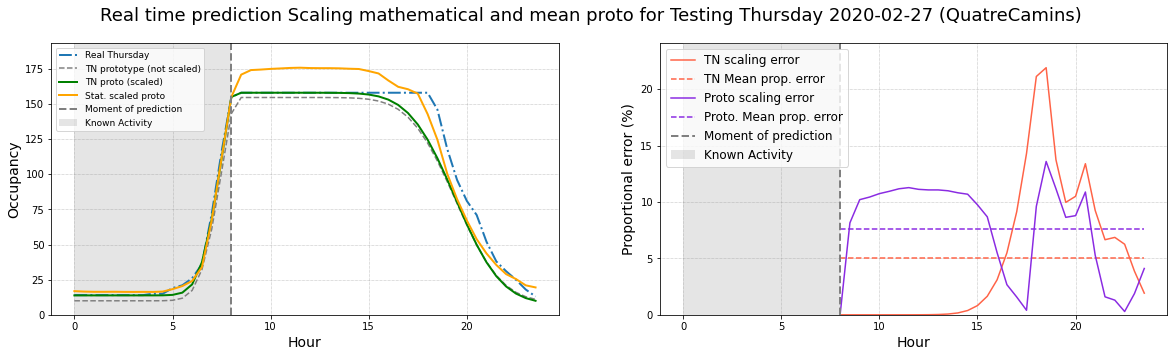

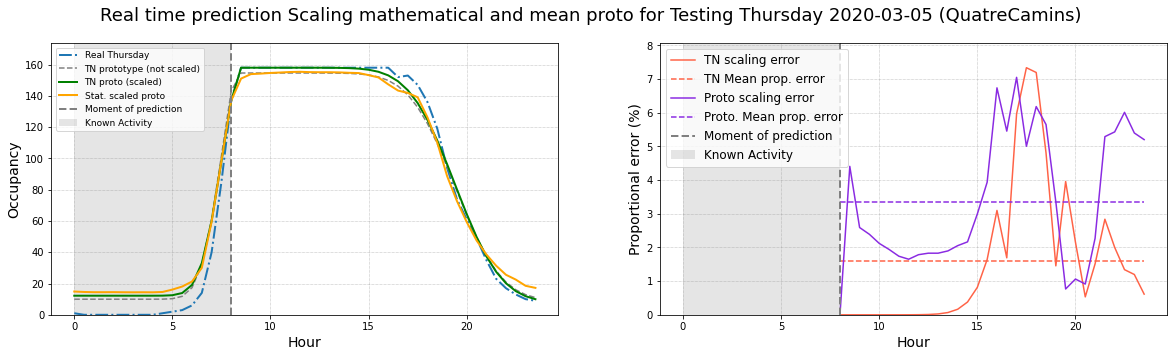

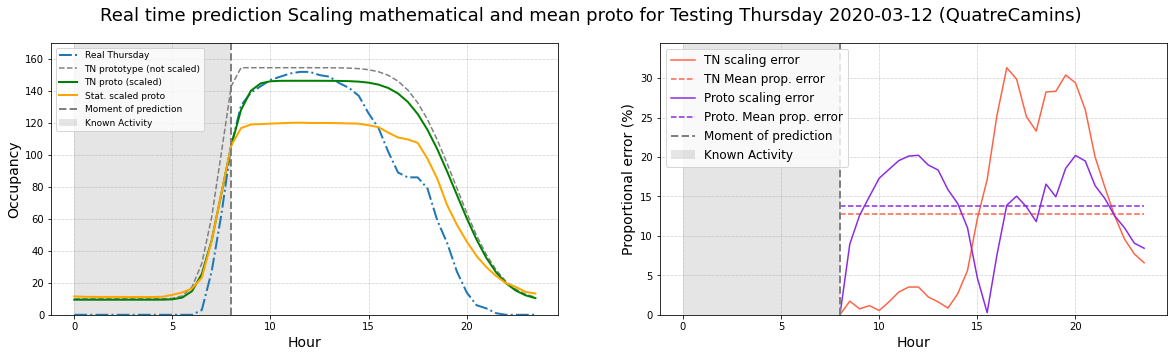

In [286]:
statistic_proto = hist_weekday_proto
tn_proto = tn_weekday
t_days = testing_thursdays
t_dates= testing_thursdays_dates
limit_hour = 8
day = 'Thursday'

tn_arr_proto = tn_arr_weekday
tn_dep_proto = tn_dep_weekday
plot_prototype()

### FRIDAY

2020-02-28
51 cars could not park
Real Friday scaled prtotype error:  7.12 %
Real Friday scaled prtotype STDV:  6.689128174735353
Real Friday scaled TN error:  2.32 %
Real Friday scaled TN STDV:  2.548578297486739
_____________________________________________________________
2020-03-06
43 cars could not park
Real Friday scaled prtotype error:  9.06 %
Real Friday scaled prtotype STDV:  6.972271177614588
Real Friday scaled TN error:  5.09 %
Real Friday scaled TN STDV:  4.075641219076208
_____________________________________________________________
2020-03-13
Real Friday scaled prtotype error:  9.68 %
Real Friday scaled prtotype STDV:  4.5856279512161455
Real Friday scaled TN error:  7.54 %
Real Friday scaled TN STDV:  5.655462132248567
_____________________________________________________________


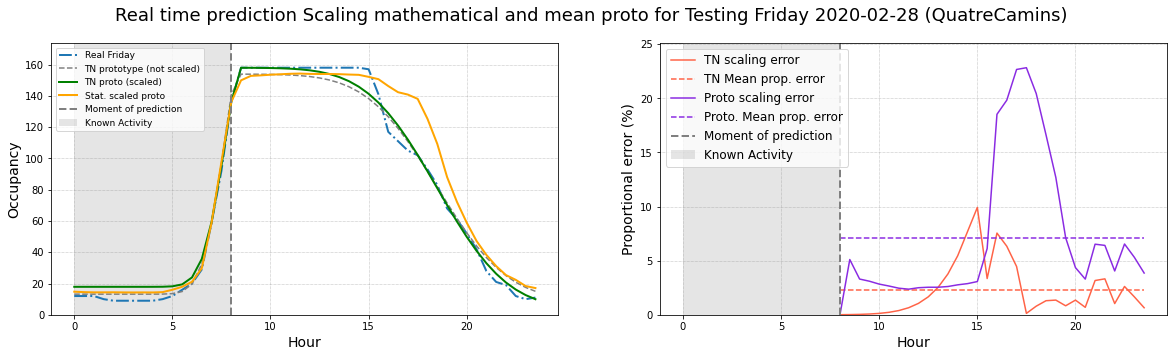

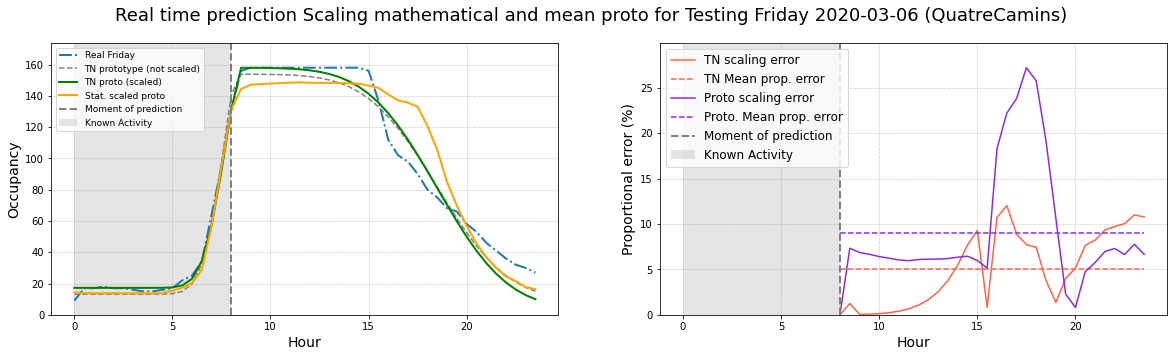

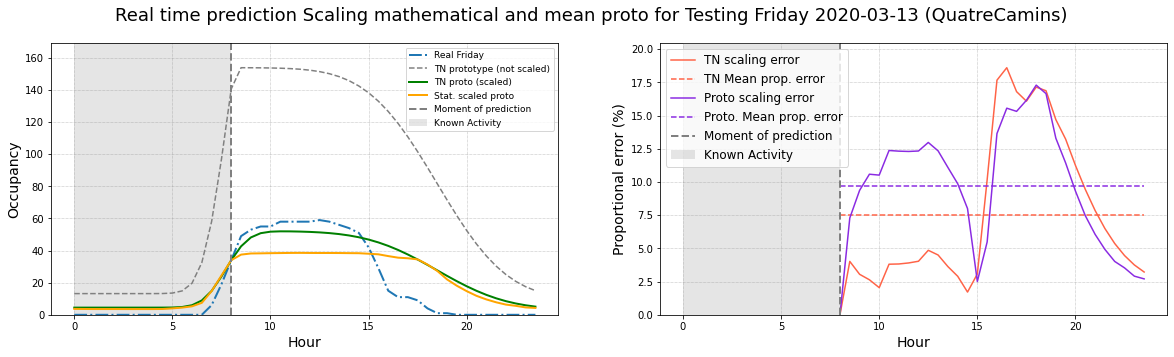

In [289]:
statistic_proto = hist_friday_proto
tn_proto = tn_friday
t_days = testing_fridays
t_dates=testing_fridays_dates
limit_hour = 8
day = 'Friday'

tn_arr_proto = tn_arr_friday
tn_dep_proto = tn_dep_friday
plot_prototype()
    

### WEEKEND

### SATURDAY

2020-02-22
Real Saturday scaled prtotype error:  2.99 %
Real Saturday scaled prtotype STDV:  2.403517530446649
Real Saturday scaled TN error:  2.63 %
Real Saturday scaled TN STDV:  1.5952143564222985
_____________________________________________________________
2020-02-29
Real Saturday scaled prtotype error:  2.1 %
Real Saturday scaled prtotype STDV:  2.1865202491097264
Real Saturday scaled TN error:  1.95 %
Real Saturday scaled TN STDV:  1.7518814667611398
_____________________________________________________________


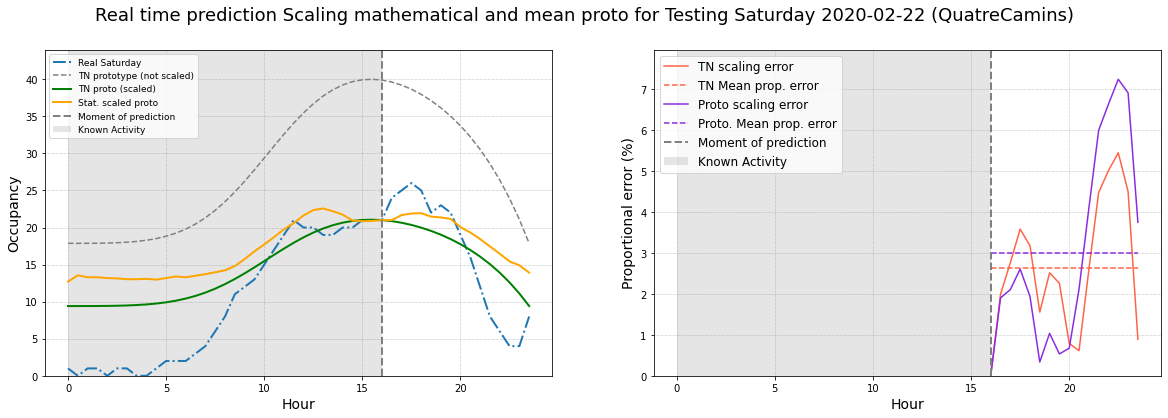

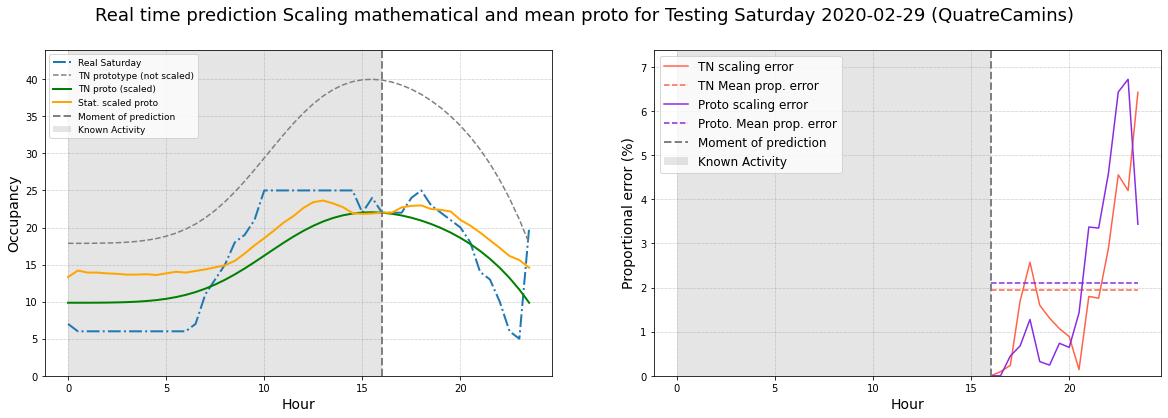

In [290]:
statistic_proto = hist_weekend_proto
tn_proto = tn1_weekend
t_days = testing_saturdays
t_dates= testing_saturdays_dates
limit_hour = 16
day = 'Saturday'
# Negative values to 0
for i in range(0,len(tn_proto)):
    if tn_proto[i] < 0:
        tn_proto[i] = 0
        
cont=0
for i in range(0,len(t_days)):
    t_date=t_dates[cont]
    print(t_date)
    tn_scaling = get_scaling_factor(limit_hour, t_days[i], tn_proto)
    stat_scaling = get_scaling_factor(limit_hour, t_days[i], statistic_proto.values)
    
    scaled_tn_proto = tn_proto * tn_scaling
    scaled_stat_proto = statistic_proto.values * stat_scaling
    fig, ax = plt.subplots(1, 2)
    fig.set_figwidth(20)
    fig.set_figheight(6)
    axx=0;
    real_timing_predition(fig, ax, axx, day, tn_proto, t_days[i], scaled_tn_proto, scaled_stat_proto, limit_hour, t_date)
    #ax[0].set_ylim([0,axis_ylim_we])
    axx=1;
    errors_plotting(fig, ax, axx, scaled_tn_proto, scaled_stat_proto, t_days[i], day, limit_hour)
    cont=cont+1

### SUNDAY

2020-02-23
Real Sunday scaled prtotype error:  3.97 %
Real Sunday scaled prtotype STDV:  2.2198140752279336
Real Sunday scaled TN error:  4.21 %
Real Sunday scaled TN STDV:  1.8906589934252227
_____________________________________________________________
2020-03-01
Real Sunday scaled prtotype error:  3.63 %
Real Sunday scaled prtotype STDV:  2.686988051060659
Real Sunday scaled TN error:  3.19 %
Real Sunday scaled TN STDV:  2.7612947970628055
_____________________________________________________________
2020-03-08
Real Sunday scaled prtotype error:  2.81 %
Real Sunday scaled prtotype STDV:  2.256061162461584
Real Sunday scaled TN error:  2.34 %
Real Sunday scaled TN STDV:  1.7441536557949682
_____________________________________________________________


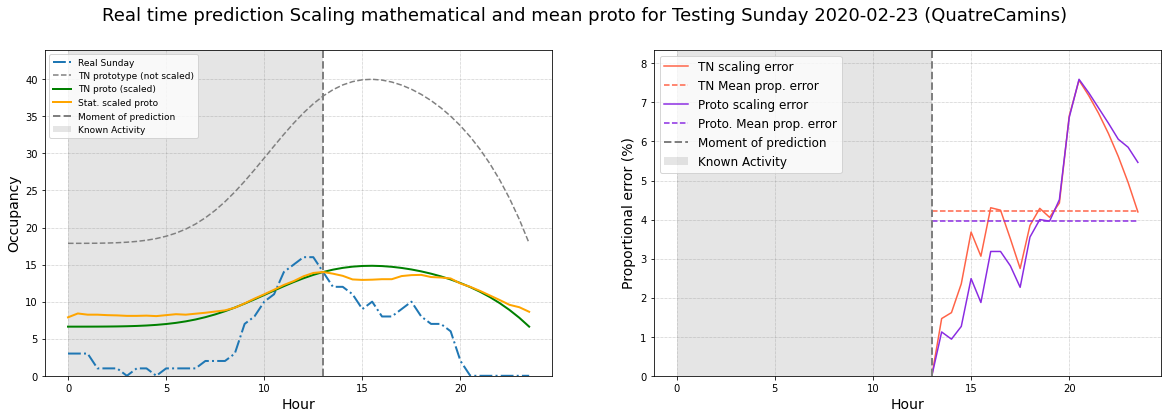

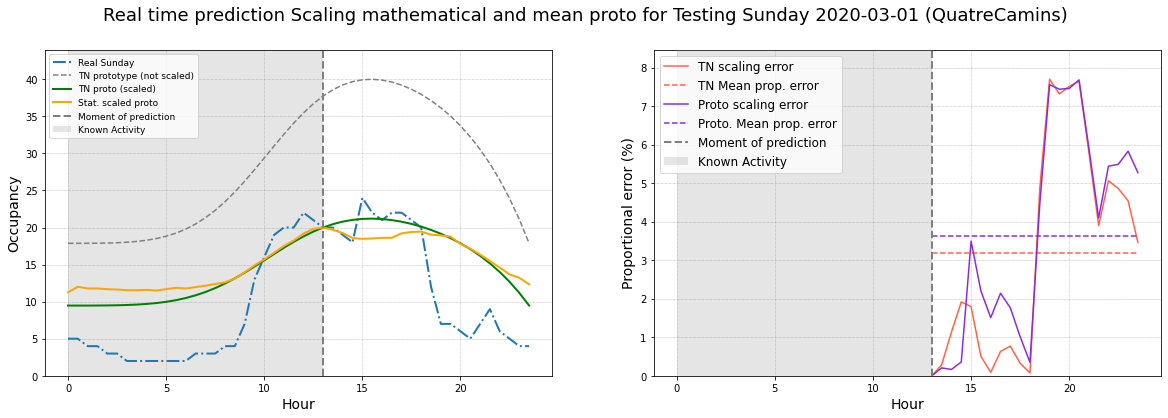

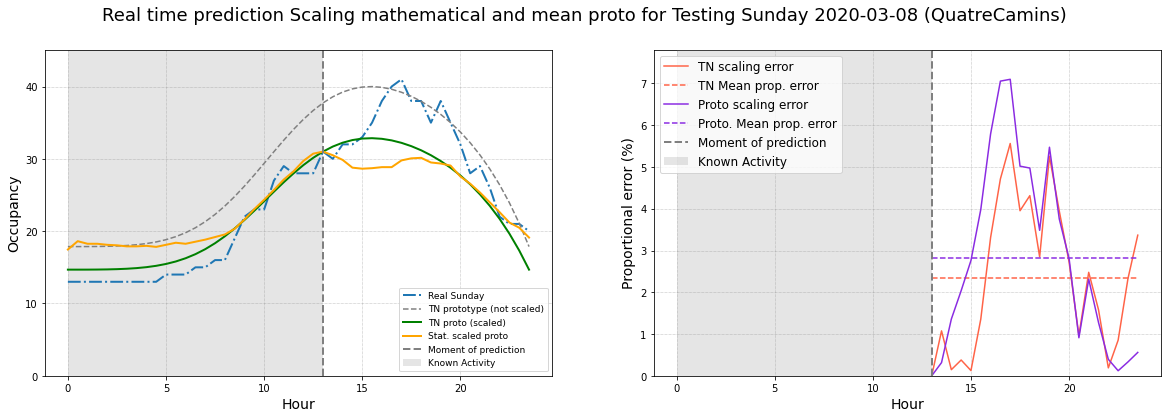

In [291]:
statistic_proto = hist_weekend_proto
tn_proto = tn1_weekend
t_days = testing_sundays
t_dates= testing_sundays_dates
limit_hour = 13
day = 'Sunday'
# Negative values to 0
for i in range(0,len(tn_proto)):
    if tn_proto[i] < 0:
        tn_proto[i] = 0
    
cont=0
for i in range(0,len(t_days)):
    t_date=t_dates[cont]
    print(t_date)
    tn_scaling = get_scaling_factor(limit_hour, t_days[i], tn_proto)
    stat_scaling = get_scaling_factor(limit_hour, t_days[i], statistic_proto.values)
    
    scaled_tn_proto = tn_proto * tn_scaling
    scaled_stat_proto = statistic_proto.values * stat_scaling
    fig, ax = plt.subplots(1, 2)
    fig.set_figwidth(20)
    fig.set_figheight(6)
    axx=0;
    real_timing_predition(fig, ax, axx, day, tn_proto, t_days[i], scaled_tn_proto, scaled_stat_proto, limit_hour, t_date)
    #ax[0].set_ylim([0,axis_ylim_we])
    axx=1;
    errors_plotting(fig, ax, axx, scaled_tn_proto, scaled_stat_proto, t_days[i], day, limit_hour)
    cont=cont+1

In [292]:
def printTimes(params,timeString='WEEKDAYS'):
    print("--------- "+timeString +" "+current_parking+" -----------")
    loc_ar = params[0]*24
    scale_ar = params[1]*24
    loc_de = params[2]*24
    scale_de = params[3]*24

    print(f'Mean Arrival Time   = {int(loc_ar):02.0f}:{int((loc_ar-int(loc_ar))*60):02.0f}h')
    print(f'stdv Arrival        = {int(scale_ar):2.0f}:{int((scale_ar-int(scale_ar))*60):02.0f}h')
    print(f'Mean Departure Time = {int(loc_de):02.0f}:{int((loc_de-int(loc_de))*60):02.0f}h')
    print(f'stdv Departure      = {int(scale_de):2.0f}:{int((scale_de-int(scale_de))*60):02.0f}h')
    if len(params)>4:
        thresh=params[4]
        if thresh<1:
            cdf_ar = tn_cdf(time_tn, loc_ar/24, scale_ar/24)
            time_parking_full= 0.5*np.argmax(cdf_ar>thresh)
            print(f'Parking full        = {int(time_parking_full):02.0f}:{int((time_parking_full-int(time_parking_full))*60):02.0f}h')

In [293]:
printTimes(optimal_params_weekdaytn.x,'WEEKDAYS')
printTimes(optimal_params_fridaytn.x,'FRIDAYS')
printTimes(optimal_params_weekendtn.x,'WEEKENDS')

--------- WEEKDAYS QuatreCamins -----------
Mean Arrival Time   = 07:31h
stdv Arrival        =  0:52h
Mean Departure Time = 19:24h
stdv Departure      =  1:51h
Parking full        = 08:30h
--------- FRIDAYS QuatreCamins -----------
Mean Arrival Time   = 07:43h
stdv Arrival        =  0:55h
Mean Departure Time = 18:29h
stdv Departure      =  2:49h
Parking full        = 08:30h
--------- WEEKENDS QuatreCamins -----------
Mean Arrival Time   = 10:18h
stdv Arrival        =  3:05h
Mean Departure Time = 795214:01h
stdv Departure      = 1763:57h


# Store protos, params, areas and offsets

In [179]:
# df_prototypes = pd.read_csv('data/prototypes_new.csv')
# index = 0

# weekday_tn_params = ','.join(str(e) for e in list(res_weekday.x))
# friday_tn_params  = ','.join(str(e) for e in list(res_friday.x))
# weekend_tn_params = ','.join(str(e) for e in list(res_weekend.x))

# weekday_mean_area = weekday_area
# friday_mean_area  = friday_area
# weekend_mean_area = weekend_area

# weekday_mean_offset = weekday_offset
# friday_mean_offset  = friday_offset
# weekend_mean_offset = weekend_offset

# total_wave_weekday_s = ','.join(str(e) for e in tn_weekday.tolist())
# total_wave_weekend_s = ','.join(str(e) for e in tn1_weekend.tolist())
# total_wave_friday_s  = ','.join(str(e) for e in tn_friday.tolist())

# historical_weekday_s = ','.join(str(e) for e in hist_weekday_proto.tolist())
# historical_weekend_s = ','.join(str(e) for e in hist_weekend_proto.tolist())
# historical_friday_s  = ','.join(str(e) for e in hist_friday_proto.tolist())


# df_prototypes.at[index,'CDF subtraction_weekday_proto'] = total_wave_weekday_s
# df_prototypes.at[index,'CDF subtraction_friday_proto']  = total_wave_friday_s
# df_prototypes.at[index,'CDF subtraction_weekend_proto'] = total_wave_weekend_s

# df_prototypes.at[index,'CDF subtraction_weekday_params'] = weekday_tn_params
# df_prototypes.at[index,'CDF subtraction_friday_params']  = friday_tn_params
# df_prototypes.at[index,'CDF subtraction_weekend_params'] = weekend_tn_params

# df_prototypes.at[index,'CDF subtraction_weekday_area'] = weekday_mean_area
# df_prototypes.at[index,'CDF subtraction_friday_area']  = friday_mean_area
# df_prototypes.at[index,'CDF subtraction_weekend_area'] = weekend_mean_area

# df_prototypes.at[index,'CDF subtraction_weekday_offset'] = weekday_mean_offset
# df_prototypes.at[index,'CDF subtraction_friday_offset']  = friday_mean_offset
# df_prototypes.at[index,'CDF subtraction_weekend_offset'] = weekend_mean_offset

# df_prototypes.at[index,'Historical_weekday_proto'] = historical_weekday_s
# df_prototypes.at[index,'Historical_weekend_proto'] = historical_weekend_s
# df_prototypes.at[index,'Historical_friday_proto']  = historical_friday_s

# df_prototypes.to_csv("data/final_prototypes.csv", index=False)
# df_prototypes

In [180]:
# How to read the prorotypes: 
# string = exportable_df.at[0,'CDF subtraction_weekday_proto']
# list_of_strings = string.split(',')
# final_list = list(np.float_(list_of_strings))

In [181]:
# import pandas as pd
# df_prototypes_2 = pd.read_csv('data/prototypes_new.csv')
# new_row = {'Location':'Cerdanyola'}
# #append row to the dataframe
# df_prototypes_2 = df_prototypes_2.append(new_row, ignore_index=True)
# df_prototypes_2

In [182]:
# df_prototypes_2.to_csv("data/prototypes_new.csv", index=False)
# day = 'Monday'
# date = '2020-02-24'
# real_day = mean_of_day(day,date)
# real_day.values

In [183]:
# hist_friday_proto.tolist()